# Introduction

The task of this assignment is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article will be shared. The data set is from the UC Irvine machine learning archive:

https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).


- 1. About Dataset
- 2. Data Summary
- 3. Exploratory Data Analysis
  - Using correlation table and heatmap to see correlations for "shares" versus other variables
  
- 4. Data Preparation
  - Convert data type
  - Drop outliers

- 5. Re-run Exploratory Data Analysis

- 6. Feature selecting
  - Split data set
  - normalization & standardization
  - Create a baseline
  - Using different methods to select features
    - PCA

    - filter
      - VarianceThreshold
      - r_regression
      - mutual_info_regression

    - Wrapper
      - RFE + LogisticRegression (Spend too much time. Can not get result.)

    - Embedded
      - LinearSVC
      - **LassoLarsCV (The fastest and the most accurate)**
      - RandomForestClassifier

  - Compare each methods

- 7. Regression Model Evaluation
  - Using r_regression to find out the best accuracy and the least variables.
  - Using LassoLarsCV to find out the best accuracy and the least variables.
  - Linear Regression Model

- 8. Conclusion

- 9. Reference

# 1. About Dataset

- Data Dictionary

Attribute Information:

**Total Number of Attributes: 61**

**Predictive Attributes: 58**

**Non-Predictive Attributes: 2**

**Goal Field: 1**

Attribute's Name and their Description

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Seirs and DataFrame
from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

# Import seaborn 
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    KFold
)

from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)


pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

In [2]:
# Read the data from GitHub and create a data frame
df = pd.read_csv('https://raw.githubusercontent.com/Yuehao-Wang/DAV-6150/main/data/M4_Data.csv')

# Use head function to make sure the data loaded properly
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

# 2. Data Summary

#### To display the number of rows and columns in the dataset

In [3]:
df.shape 

(39644, 61)

In [4]:
# Show the columns
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
# Remove the blank mark before column names
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

**The dataset contains 39644 rows and 61 columns**

#### Data Type of Each Variable

In [7]:
# To check the data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

The data type of all the attributes are numaric except URL. All variables do not have missing values.

Next, I will drop the URL and timedelta, because URL is an unique identification and is non-predictive. 

In [8]:
# Drop url
df = df.drop(columns=['url', 'timedelta'])

# 3. Exploratory Data Analysis
Now, We will perform exploratory data analysis to understand the nature of each of the variable

In [9]:
numeric_cols = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

#### Summary Statistics

In [10]:
# Employ describe function to exhibits the summary statistics of each column
df.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  num_keywords  \
count  39644.000000          39644.000000  39644.000000   
mean       1.249874              4.548239      7.223767   
std        4.107855              0.844406      1.909130   
min        0.000000              0.000000      1.000000   
25%        0.000000              4.478404      6.000000   
50%        0.000000              4.664082      7.000000   
75%        1.000000              4.854839      9.000000   
max       91.000000              8.041534     10.000000   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
count               39644.000000                   39644.000000   
mean                    0.052946                       0.178009   
std                     0.223929                       0.382525   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     0.000000                       0.000000   
max                     1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           39644.000000  39644.000000   39644.000000  39644.000000   
mean                0.212567     26.106801    1153.951682    312.366967   
std                 0.409129     69.633215    3857.990877    620.783887   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     445.000000    141.750000   
50%                 0.000000     -1.000000     660.000000    235.500000   
75%                 0.000000      4.000000    1000.000000    357.000000   
max                 1.000000    377.000000  298400.000000  42827.857143   

          kw_min_max     kw_max_max     kw_avg_max    kw_min_avg  \
count   39644.000000   3964

#### Using correlation table and heatmap to see correlations for "shares" versus other variables.

In [11]:
corr_matrix = df[['shares'] + numeric_cols].corr()
corr_matrix['shares'].sort_values(ascending = False)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

There are not any pair that has correlation value greater than 0.5.

#### Distribution Charts for each Column

In [12]:
def hist_box(data_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Histogram of " + col)
    sns.histplot(data_df[col], bins = 50, ax=axes[0])
    
    axes[1].set_title("Boxplot of " + col)
    sns.boxplot(y=data_df[col], orient="v",ax=axes[1])


In [13]:
def show_statistic(data_df, col):
    
    mean = data_df[col].mean()
    var = data_df[col].var()
    std = data_df[col].std()
    q1 = data_df[col].quantile(.25)
    q2 = data_df[col].quantile(.50)
    q3 = data_df[col].quantile(.75)
    d_min= data_df[col].min()
    d_max = data_df[col].max()
    sigema = 3.0
    
    del_outliers = data_df[np.abs(data_df[col] - mean ) > (sigema * std )]
    
    
    print("%s : mean = %.4f, var = %.4f, std = %.4f, q1(25%%) = %.4f, q3(75%%) = %.4f, min = %.4f, max = %.4f" 
          %(col, mean, var, std, q1, q3, d_min, d_max))
    
    if del_outliers.shape[0] > 0:
        out_num = del_outliers.shape[0]
        out_pct = (out_num / data_df[col].shape[0]) * 100
        print("It has %d ourliers that larger than (mean + 3*std), account for %.4f %%" %(out_num, out_pct))
    

shares : mean = 3395.3802, var = 135185983.7116, std = 11626.9507, q1(25%) = 946.0000, q3(75%) = 2800.0000, min = 1.0000, max = 843300.0000
It has 308 ourliers that larger than (mean + 3*std), account for 0.7769 %


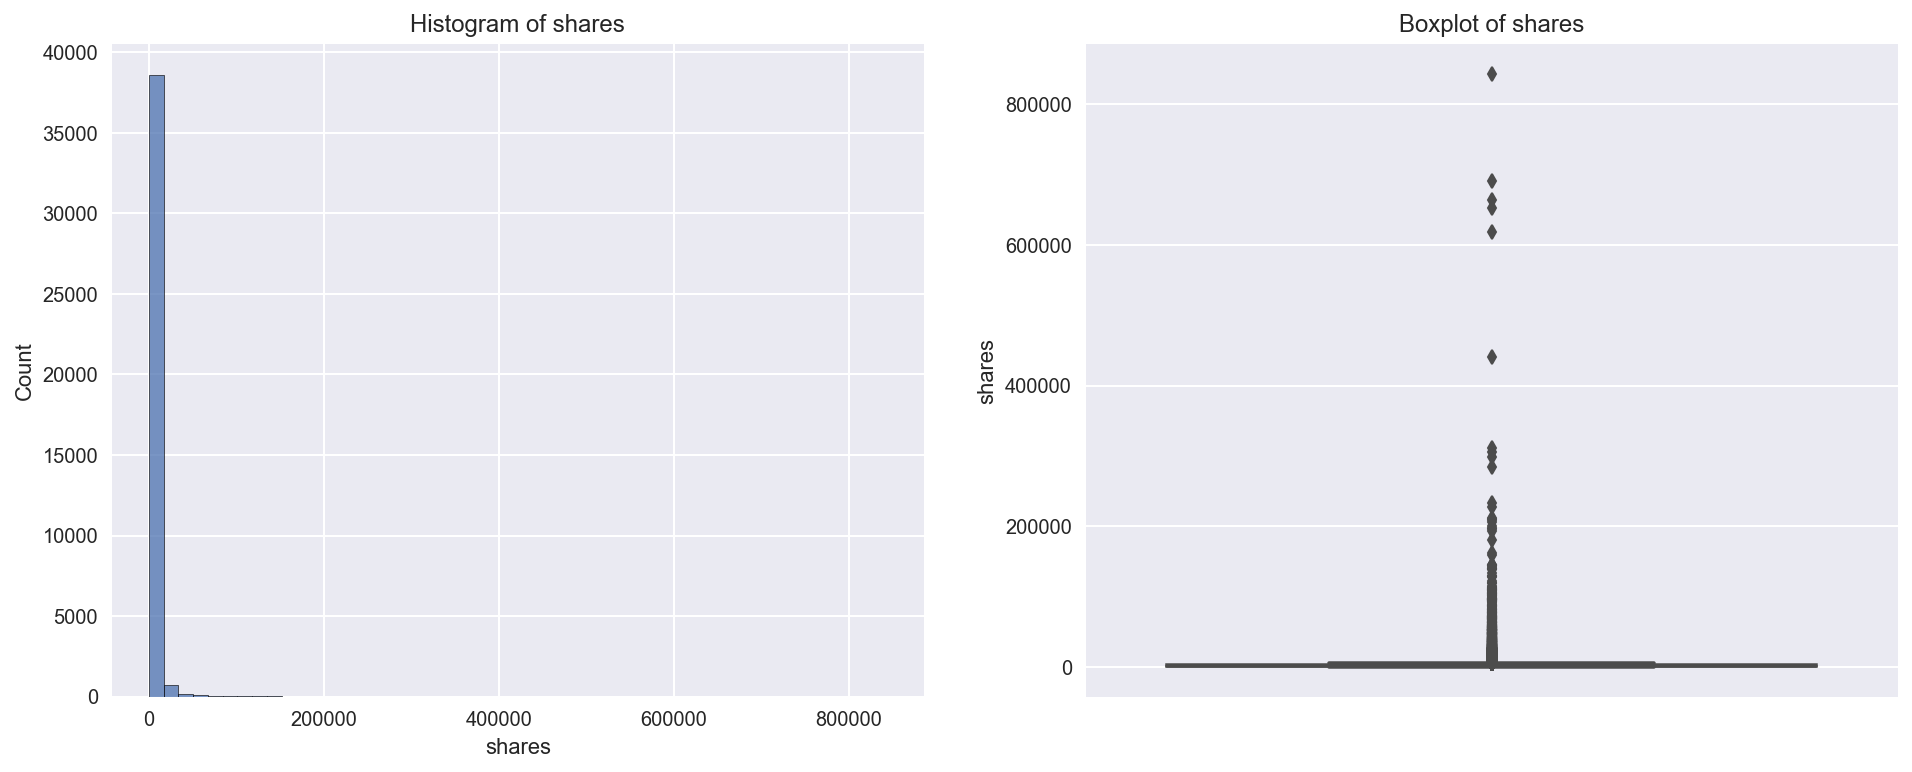

In [14]:
# 60. Number of shares (target)
hist_box(df, 'shares')
show_statistic(df, 'shares')

The shares shows right skewed distribution. Outliers account for 0.7769 %. It has a large variance.

In [15]:
# 1. timedelta : Days between the article publication and the dataset acquisition (non-predictive)
#hist_box(df, 'timedelta')
#show_statistic(df, 'timedelta')

The timedelta shows Non-symmetric bimodal distribution. It has no outliers.

n_tokens_title : mean = 10.3987, var = 4.4692, std = 2.1140, q1(25%) = 9.0000, q3(75%) = 12.0000, min = 2.0000, max = 23.0000
It has 156 ourliers that larger than (mean + 3*std), account for 0.3935 %


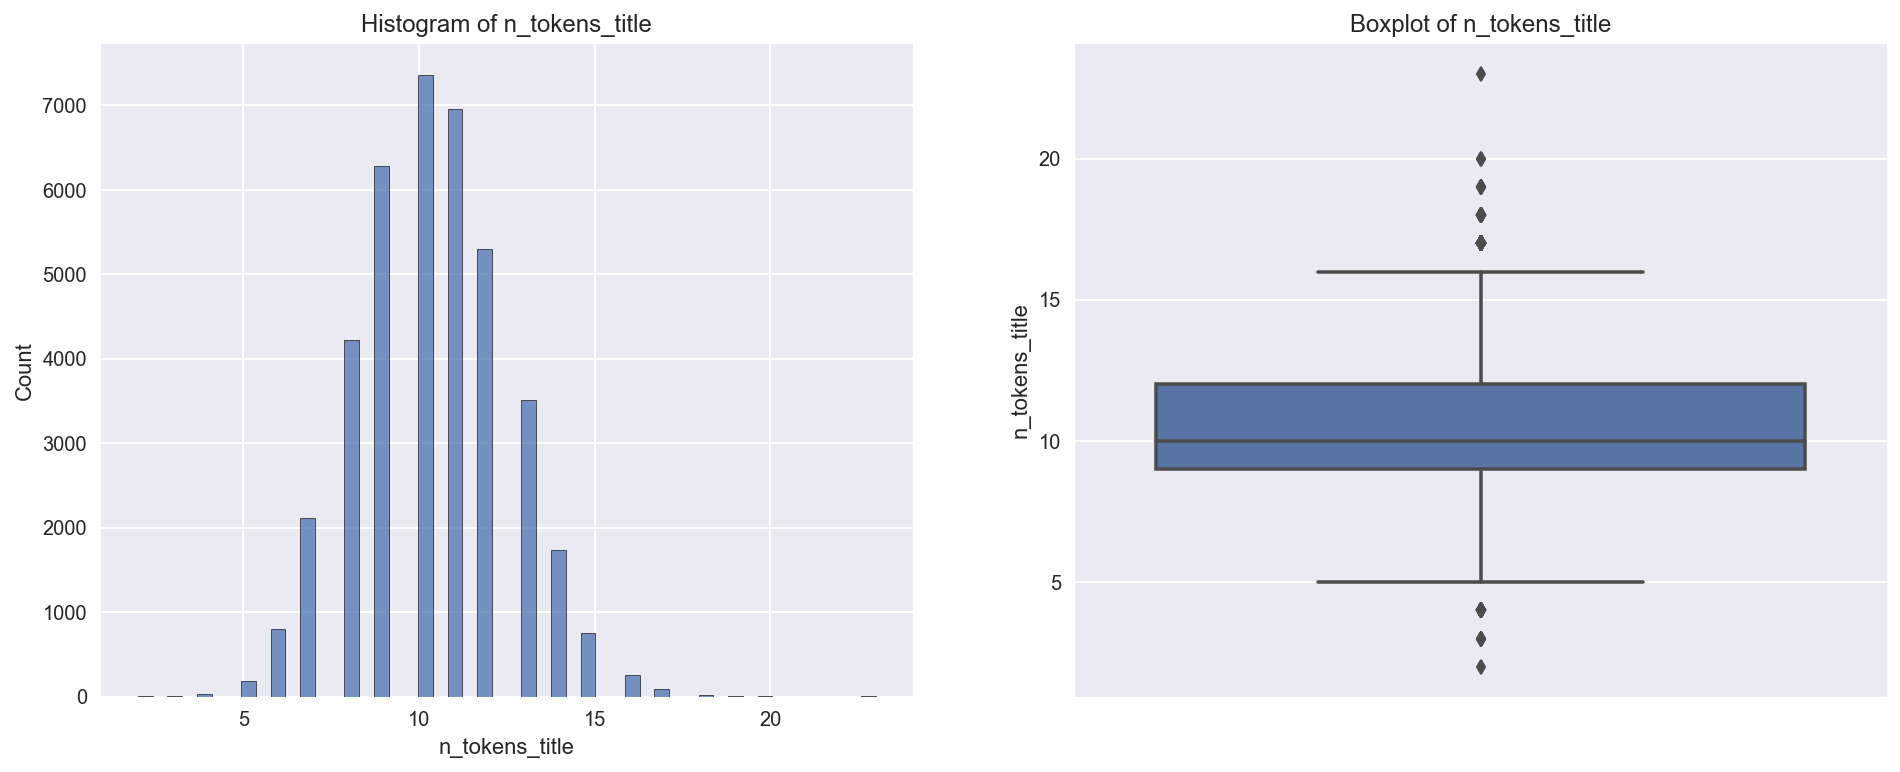

In [16]:
# 2. n_tokens_title: Number of words in the title
hist_box(df, 'n_tokens_title')
show_statistic(df, 'n_tokens_title')

The n_tokens_title shows normal distribution. I has 0.3935 % outliers on both sides.

n_tokens_content : mean = 546.5147, var = 221942.2840, std = 471.1075, q1(25%) = 246.0000, q3(75%) = 716.0000, min = 0.0000, max = 8474.0000
It has 693 ourliers that larger than (mean + 3*std), account for 1.7481 %


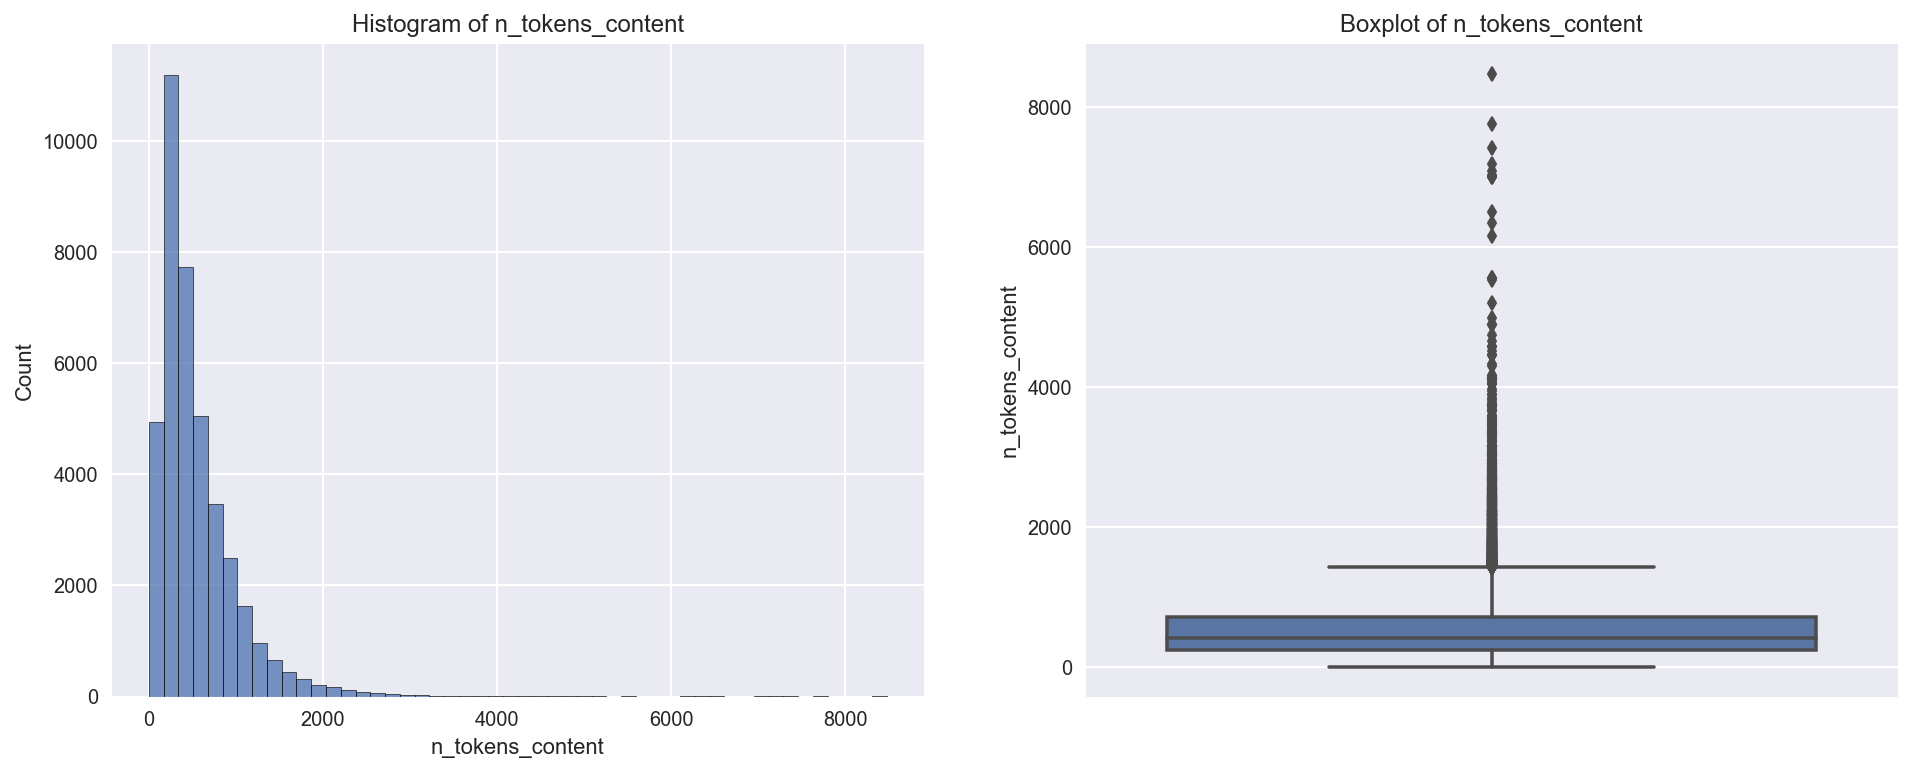

In [17]:
# 3. n_tokens_content: Number of words in the content
hist_box(df, 'n_tokens_content')
show_statistic(df, 'n_tokens_content')

The n_tokens_content shows right skewed distribution. It has 1.7481 % outliers and has a large variance.

n_unique_tokens : mean = 0.5482, var = 12.3954, std = 3.5207, q1(25%) = 0.4709, q3(75%) = 0.6087, min = 0.0000, max = 701.0000
It has 1 ourliers that larger than (mean + 3*std), account for 0.0025 %


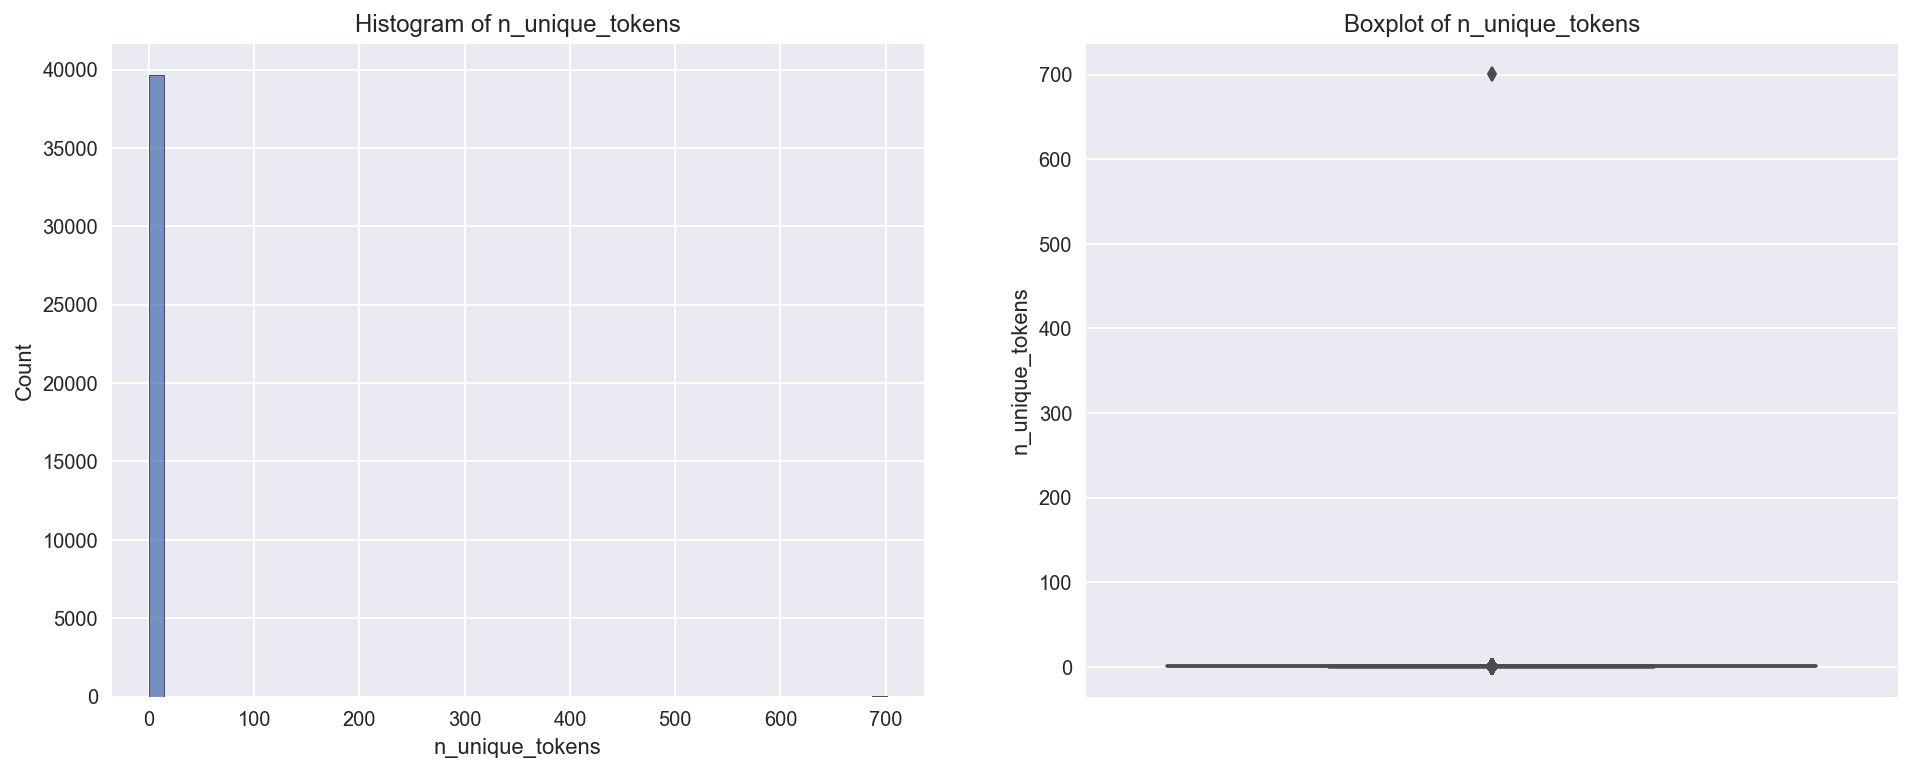

In [18]:
# 4. n_unique_tokens: Rate of unique words in the content
hist_box(df, 'n_unique_tokens')
show_statistic(df, 'n_unique_tokens')

It is rate. The max is 701. I think the max is a error record.

n_non_stop_words : mean = 0.9965, var = 27.3658, std = 5.2312, q1(25%) = 1.0000, q3(75%) = 1.0000, min = 0.0000, max = 1042.0000
It has 1 ourliers that larger than (mean + 3*std), account for 0.0025 %


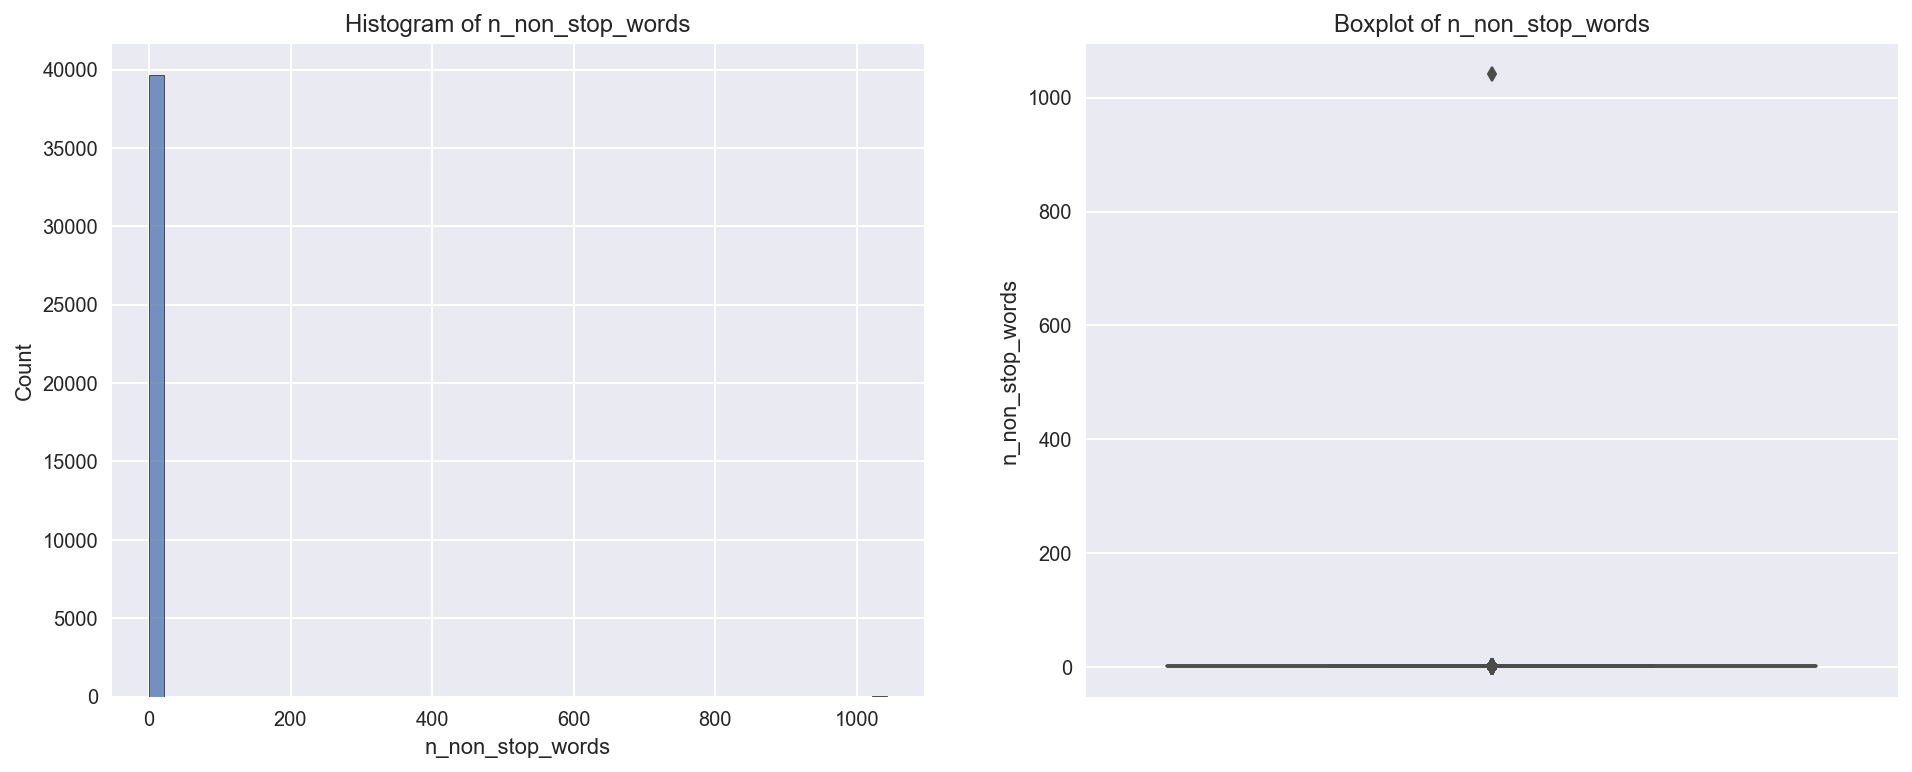

In [19]:
# 5. n_non_stop_words: Rate of non-stop words in the content
hist_box(df, 'n_non_stop_words')
show_statistic(df, 'n_non_stop_words')

It is rate. The max is 1042. I think the max is a error record.

n_non_stop_unique_tokens : mean = 0.6892, var = 10.6590, std = 3.2648, q1(25%) = 0.6257, q3(75%) = 0.7546, min = 0.0000, max = 650.0000
It has 1 ourliers that larger than (mean + 3*std), account for 0.0025 %


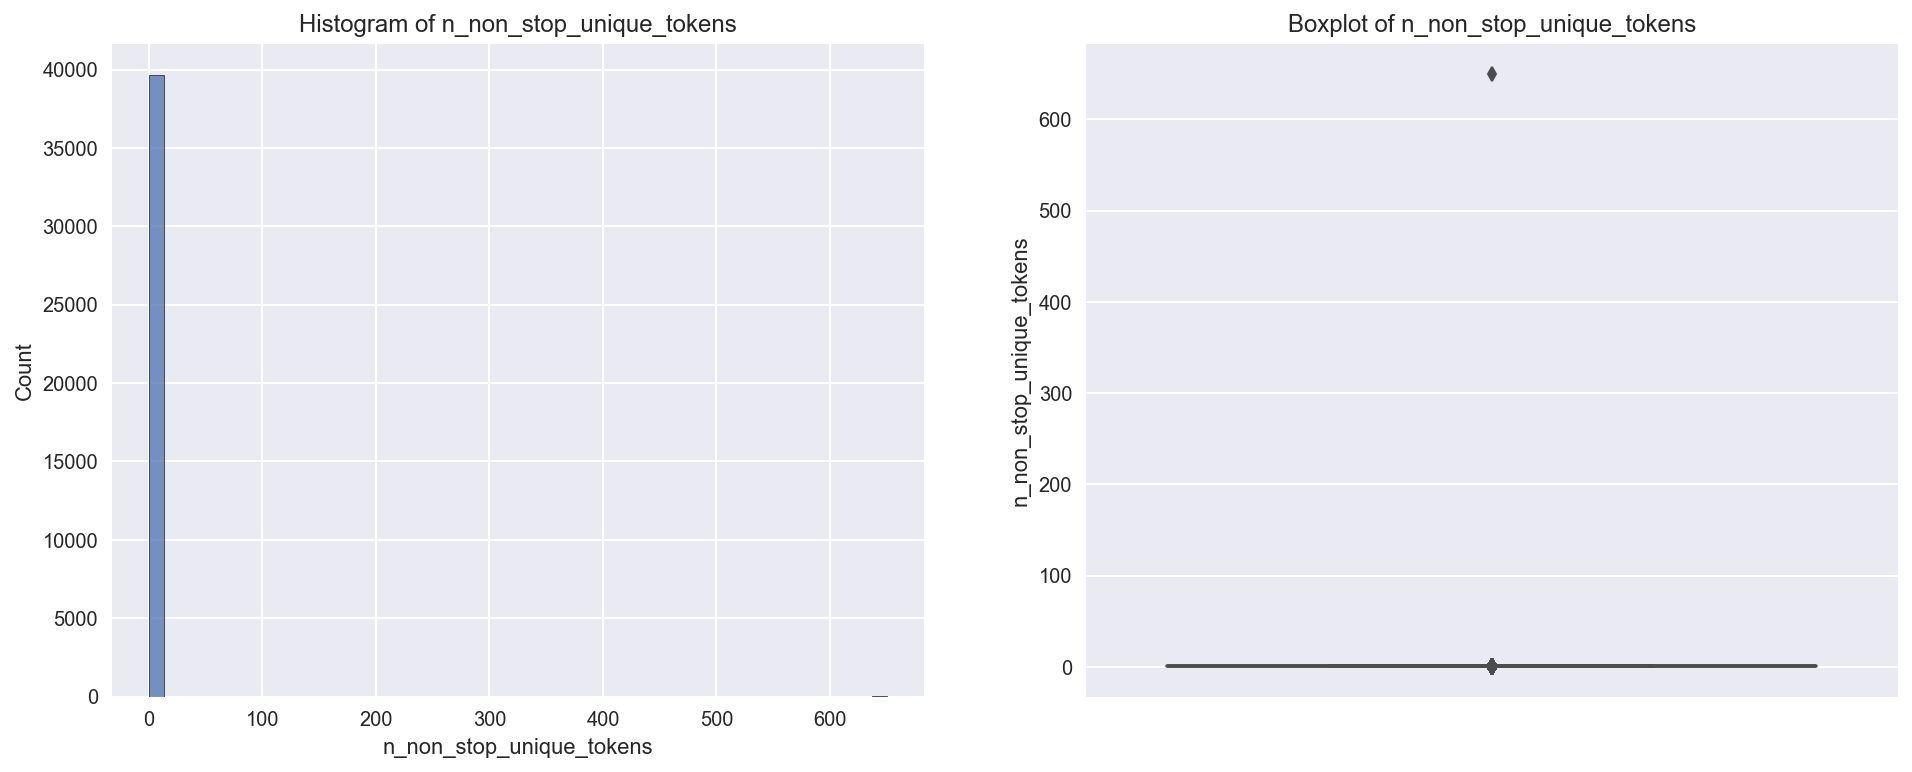

In [20]:
# 6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
hist_box(df, 'n_non_stop_unique_tokens')
show_statistic(df, 'n_non_stop_unique_tokens')

It is rate. The max is 650. I think the max is a error record.

num_hrefs : mean = 10.8837, var = 128.4146, std = 11.3320, q1(25%) = 4.0000, q3(75%) = 14.0000, min = 0.0000, max = 304.0000
It has 731 ourliers that larger than (mean + 3*std), account for 1.8439 %


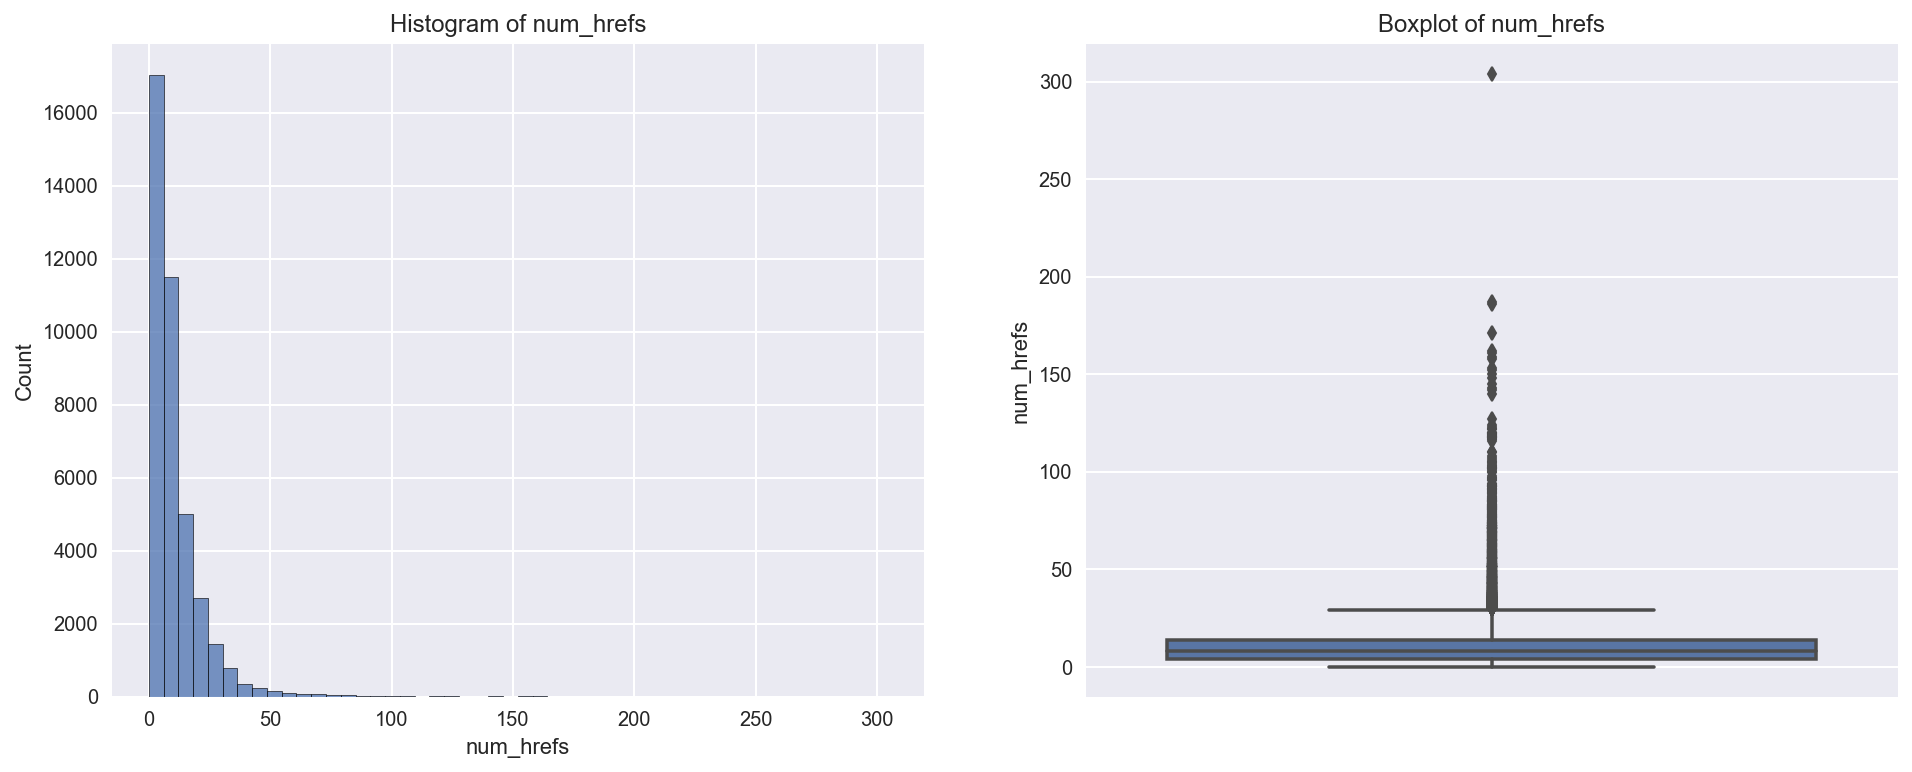

In [21]:
# 7. num_hrefs: Number of links
hist_box(df, 'num_hrefs')
show_statistic(df, 'num_hrefs')

The num_hrefs shows the right-skewed distribution and it has 1.8439 % outliers. There is an outlier with max value, we should pay attention to it.

num_self_hrefs : mean = 3.2936, var = 14.8621, std = 3.8551, q1(25%) = 1.0000, q3(75%) = 4.0000, min = 0.0000, max = 116.0000
It has 699 ourliers that larger than (mean + 3*std), account for 1.7632 %


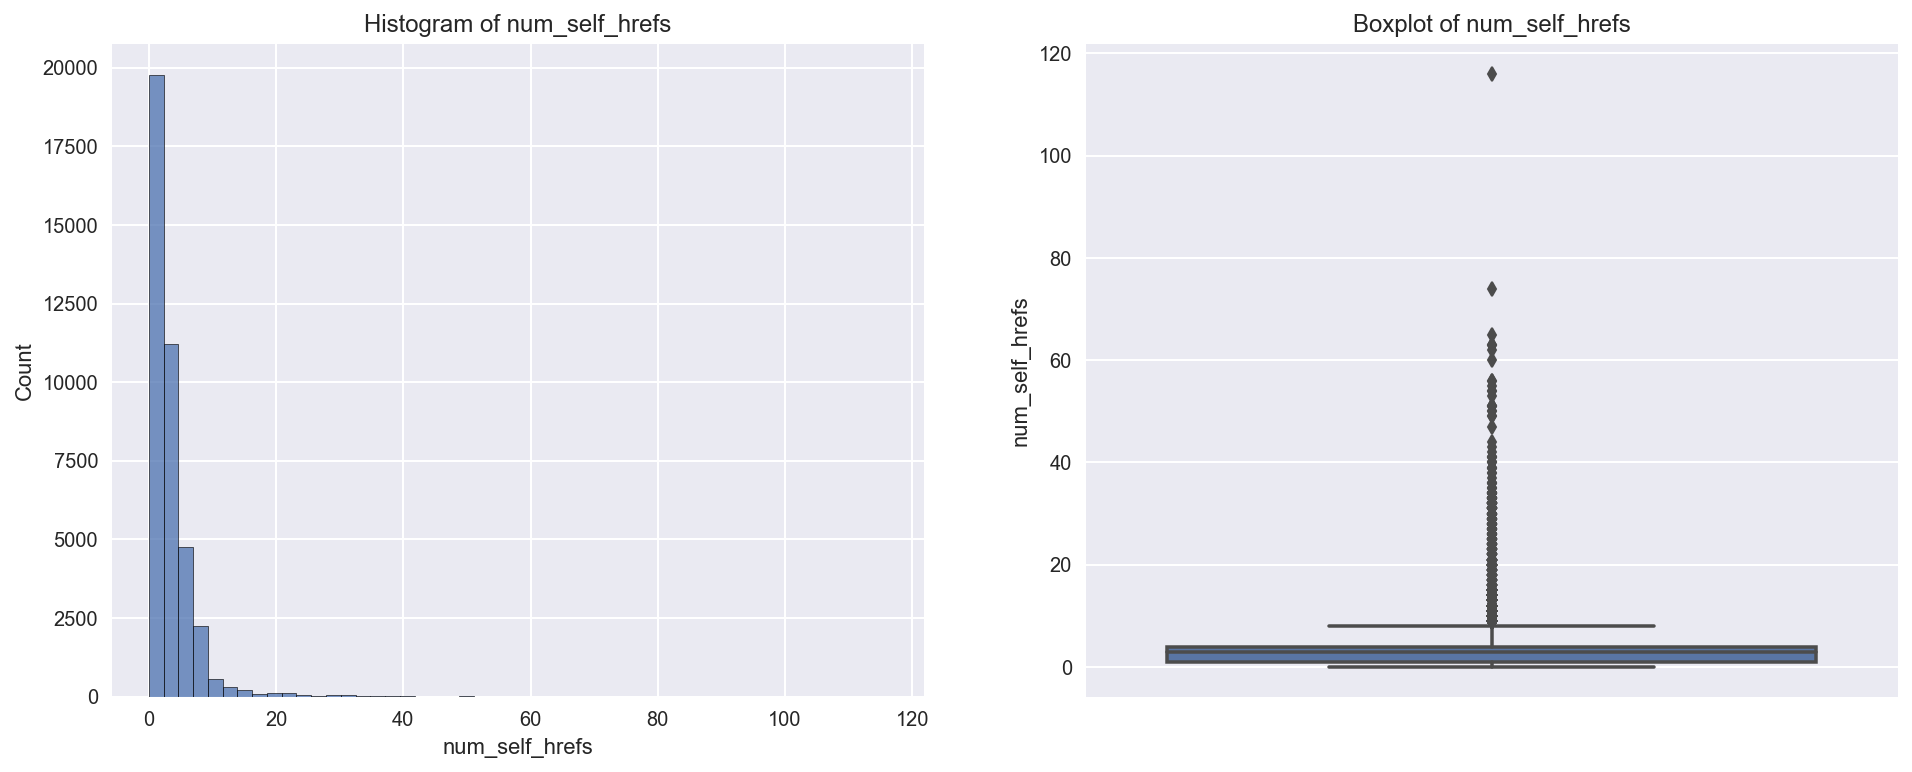

In [22]:
# 8. num_self_hrefs: Number of links to other articles published by Mashable
hist_box(df, 'num_self_hrefs')
show_statistic(df, 'num_self_hrefs')

The num_self_hrefs  shows the right-skewed distribution and it has 1.7632 % outliers. There is an outlier with max value, we should pay attention to it.

num_imgs : mean = 4.5441, var = 69.0467, std = 8.3094, q1(25%) = 1.0000, q3(75%) = 4.0000, min = 0.0000, max = 128.0000
It has 863 ourliers that larger than (mean + 3*std), account for 2.1769 %


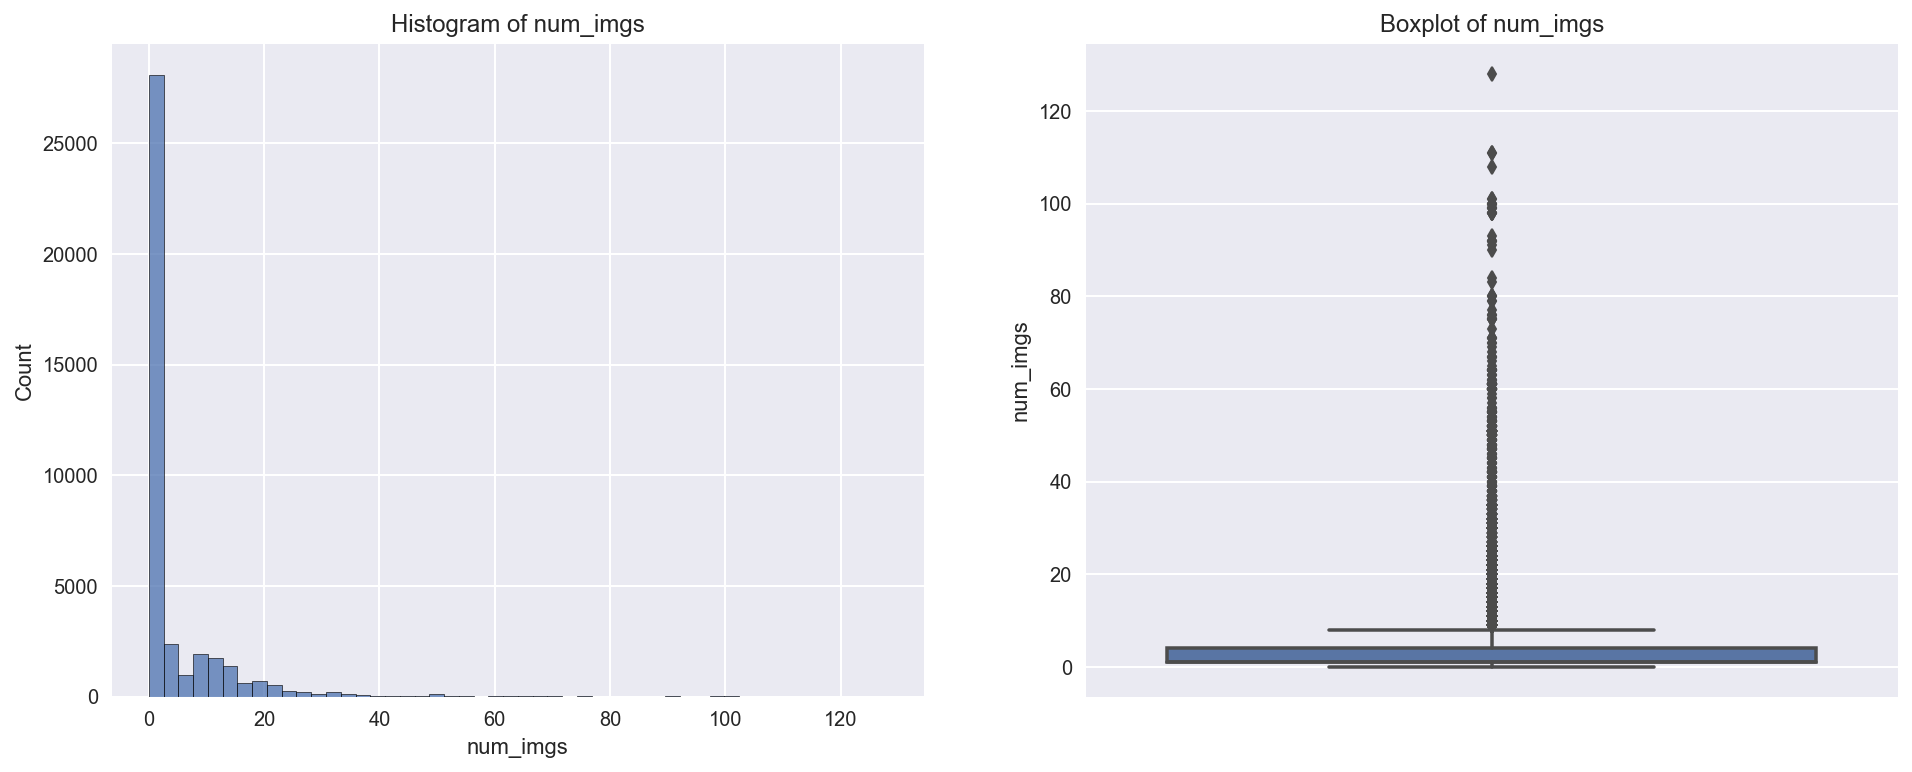

In [23]:
# 9. num_imgs: Number of images
hist_box(df, 'num_imgs')
show_statistic(df, 'num_imgs')

The num_imgs shows the right-skewed distribution and it has 2.1769 % outliers.

num_videos : mean = 1.2499, var = 16.8745, std = 4.1079, q1(25%) = 0.0000, q3(75%) = 1.0000, min = 0.0000, max = 91.0000
It has 986 ourliers that larger than (mean + 3*std), account for 2.4871 %


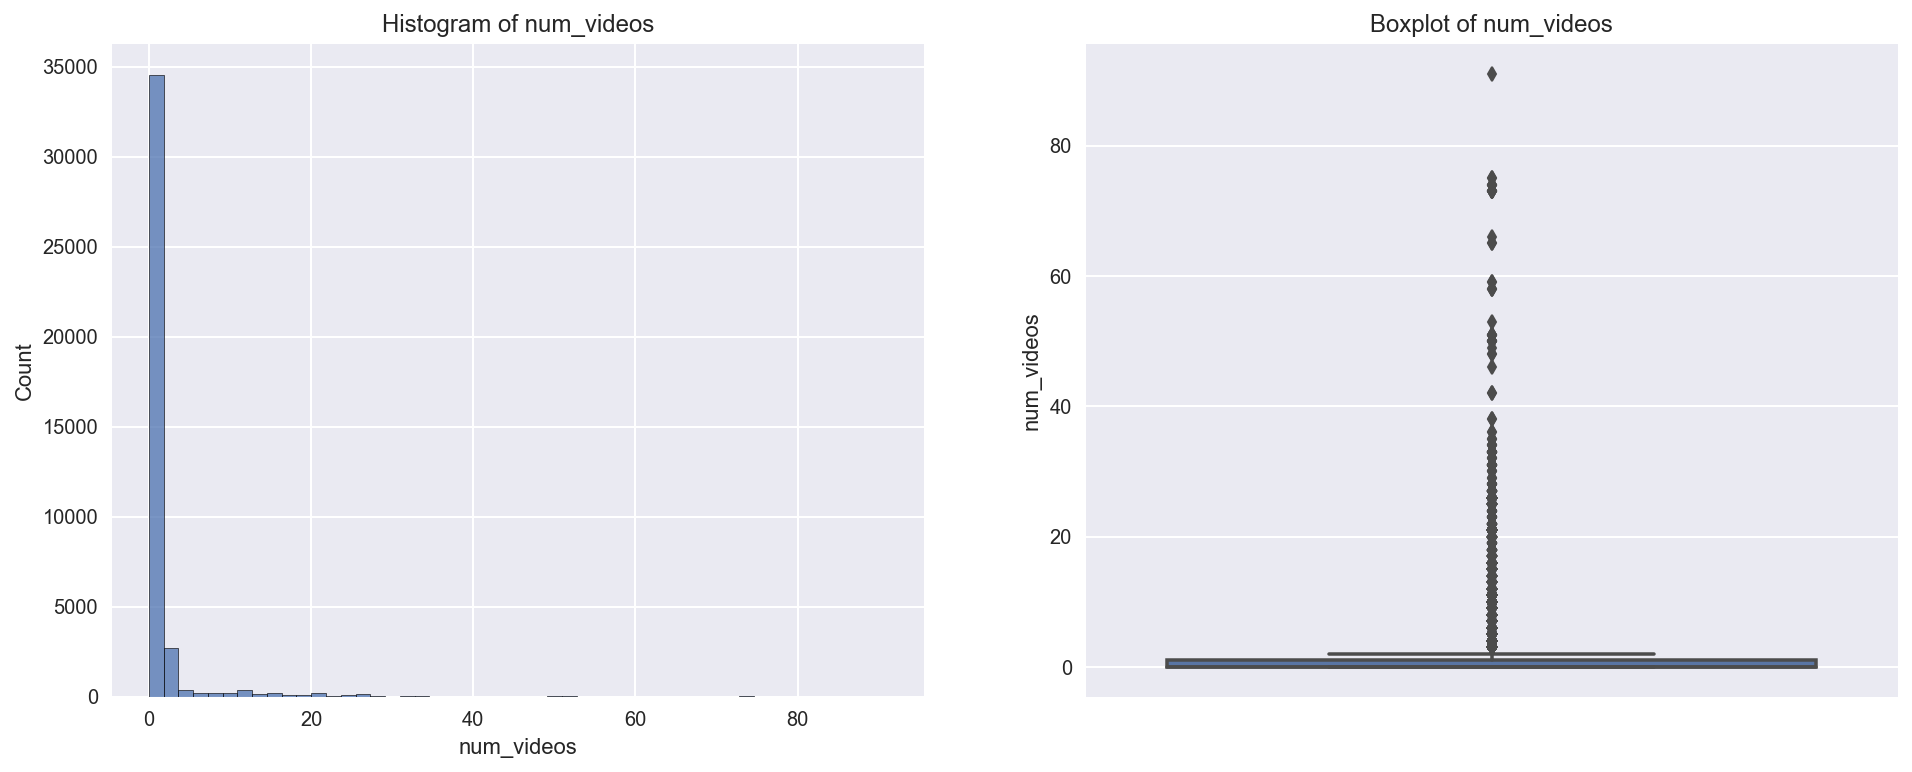

In [24]:
# 10. num_videos: Number of videos
hist_box(df, 'num_videos')
show_statistic(df, 'num_videos')

The num_videos shows the right-skewed distribution and it has 2.4871 % outliers.

average_token_length : mean = 4.5482, var = 0.7130, std = 0.8444, q1(25%) = 4.4784, q3(75%) = 4.8548, min = 0.0000, max = 8.0415
It has 1185 ourliers that larger than (mean + 3*std), account for 2.9891 %


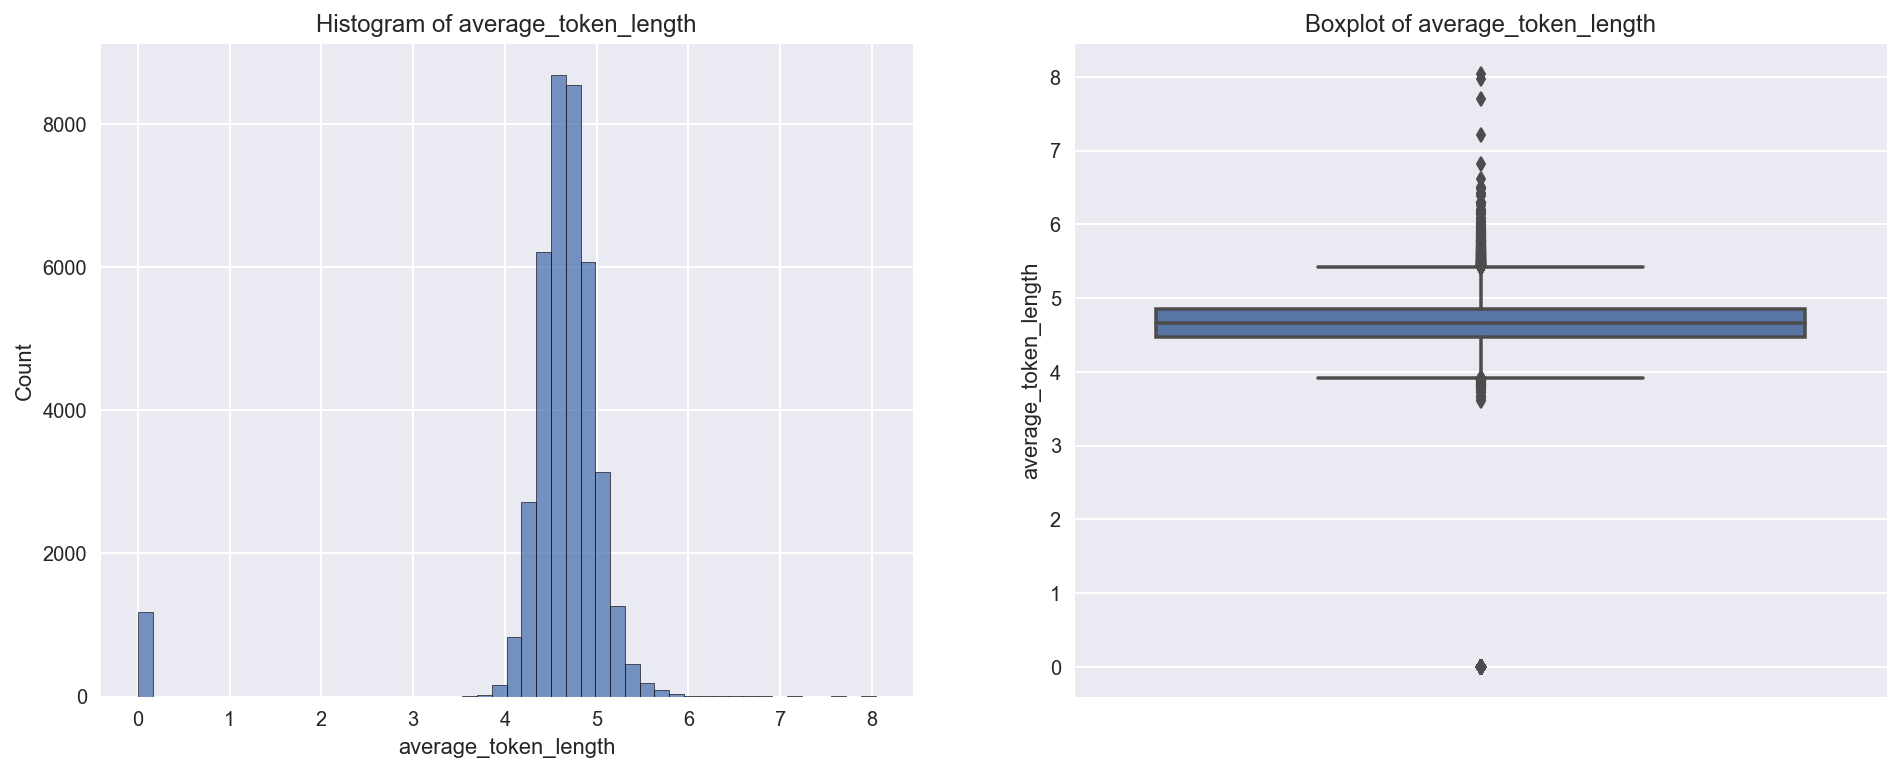

In [25]:
# 11. average_token_length: Average length of the words in the content
hist_box(df, 'average_token_length')
show_statistic(df, 'average_token_length')

The average_token_length shows the normal distribution except near 0. It has 2.9891 % outliers. There are some outliers near 0, we should pay attention to them.

num_keywords : mean = 7.2238, var = 3.6448, std = 1.9091, q1(25%) = 6.0000, q3(75%) = 9.0000, min = 1.0000, max = 10.0000
It has 51 ourliers that larger than (mean + 3*std), account for 0.1286 %


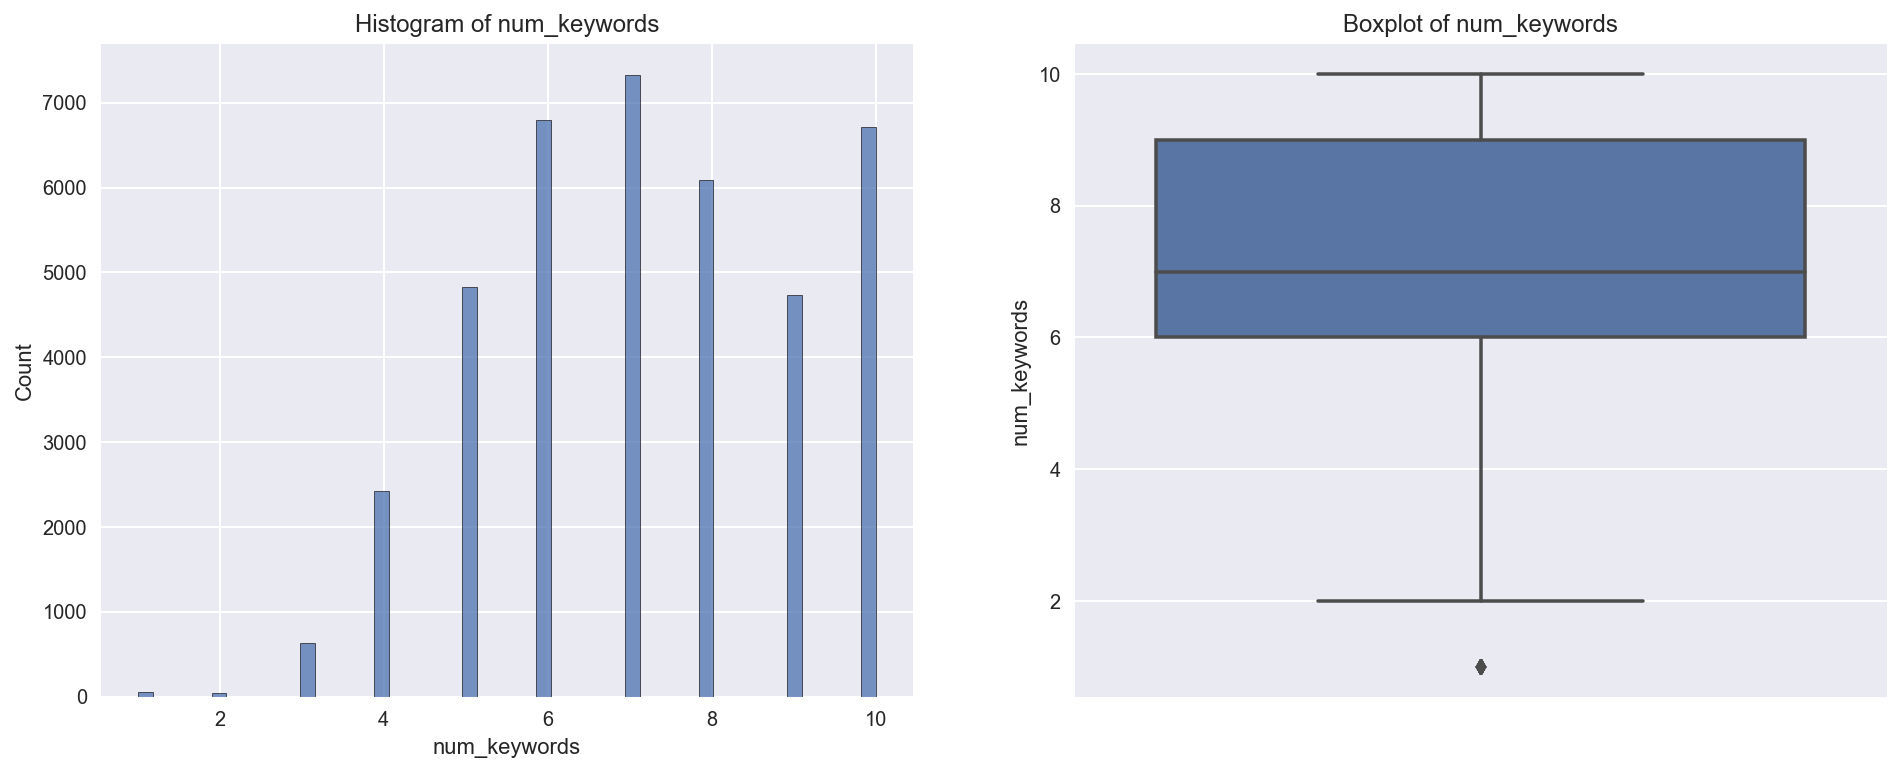

In [26]:
# 12. num_keywords: Number of keywords in the metadata
hist_box(df, 'num_keywords')
show_statistic(df, 'num_keywords')

The num_keywords shows observations are distributed from 0 to 10. It has 0.1286 % outliers.

data_channel_is_lifestyle : mean = 0.0529, var = 0.0501, std = 0.2239, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000
It has 2099 ourliers that larger than (mean + 3*std), account for 5.2946 %


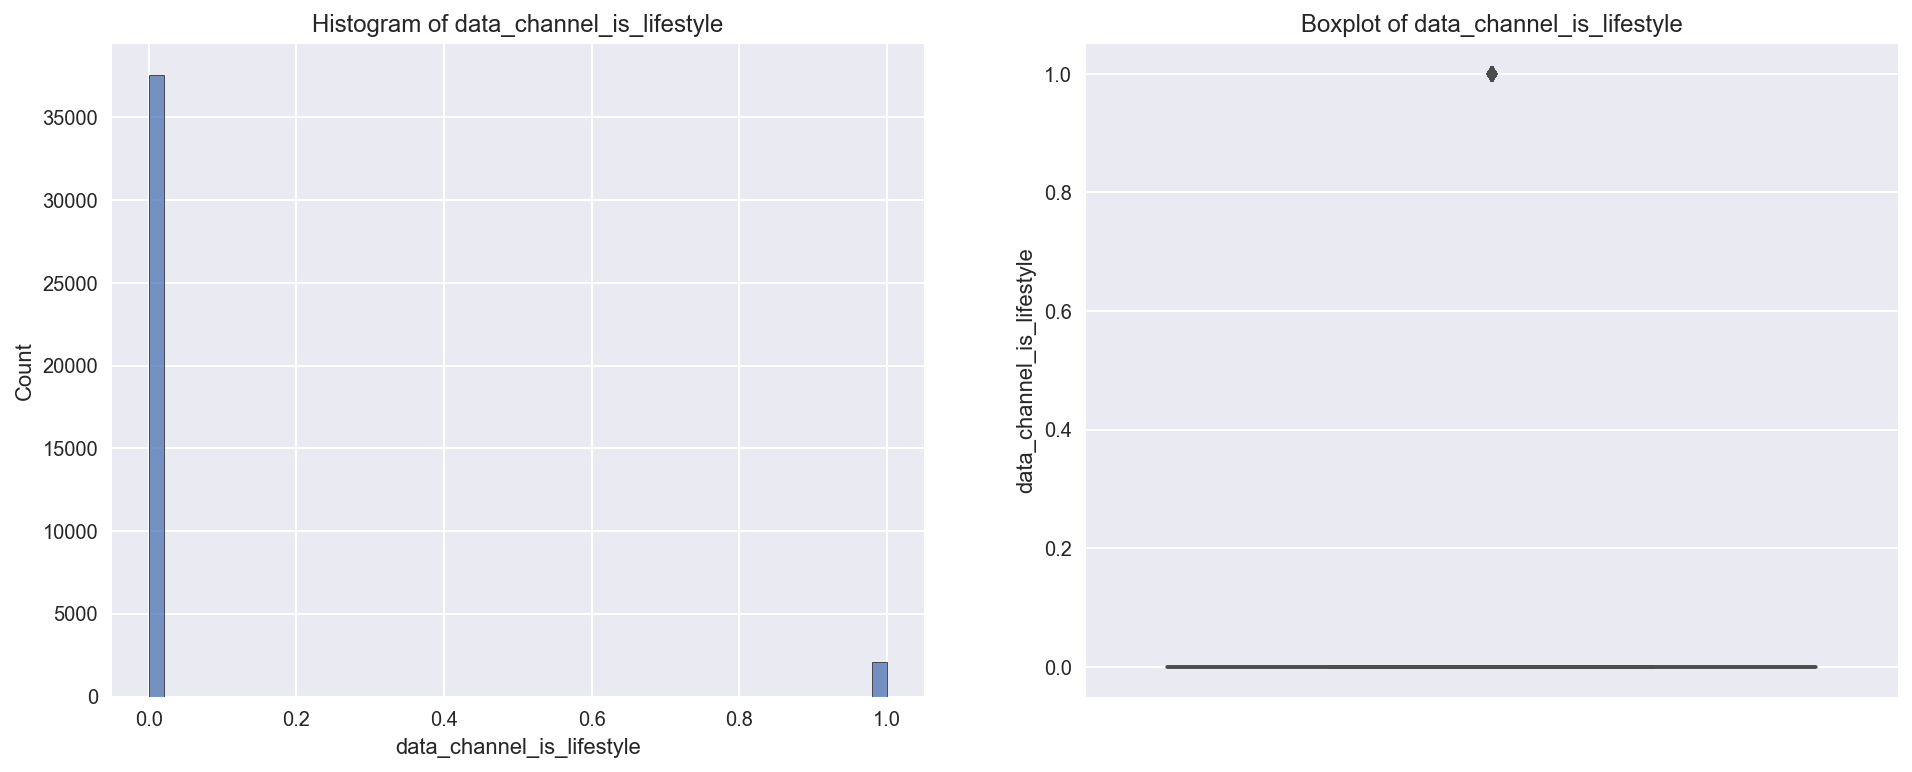

In [27]:
# 13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
hist_box(df, 'data_channel_is_lifestyle')
show_statistic(df, 'data_channel_is_lifestyle')

The data_channel_is_lifestyle can change to binary category.

data_channel_is_entertainment : mean = 0.1780, var = 0.1463, std = 0.3825, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


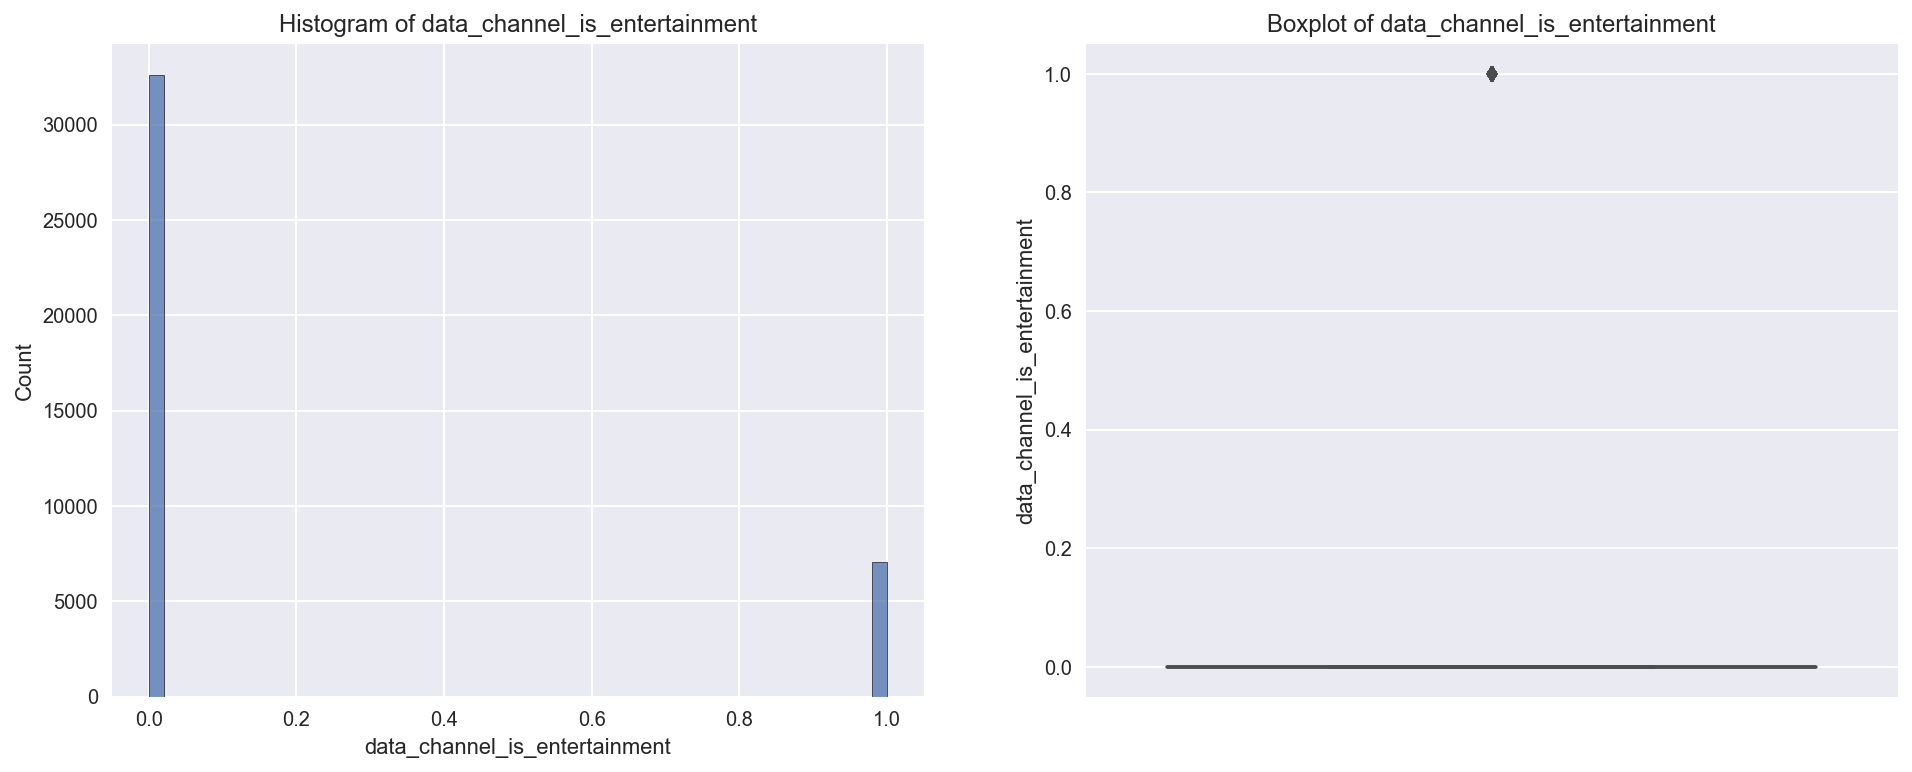

In [28]:
# 14. data_channel_is_entertainment: Is data channel 'Entertainment'?
hist_box(df, 'data_channel_is_entertainment')
show_statistic(df, 'data_channel_is_entertainment')

The data_channel_is_entertainment can change to binary category.

data_channel_is_bus : mean = 0.1579, var = 0.1329, std = 0.3646, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


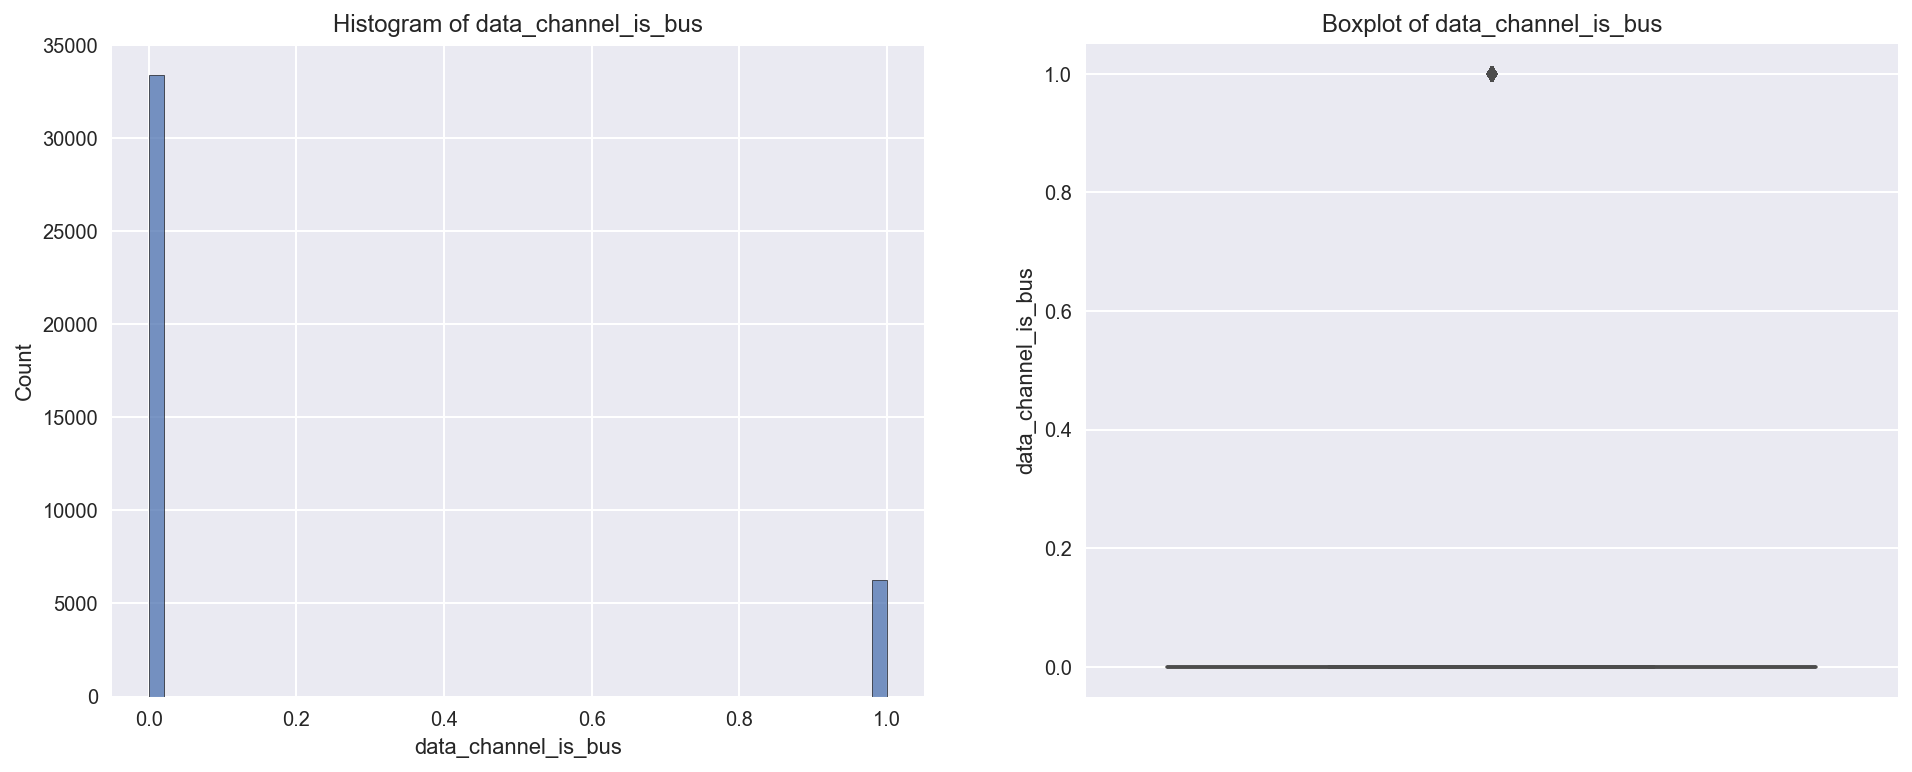

In [29]:
# 15. data_channel_is_bus: Is data channel 'Business'?
hist_box(df, 'data_channel_is_bus')
show_statistic(df, 'data_channel_is_bus')

The data_channel_is_bus can change to binary category.

data_channel_is_socmed : mean = 0.0586, var = 0.0552, std = 0.2349, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000
It has 2323 ourliers that larger than (mean + 3*std), account for 5.8597 %


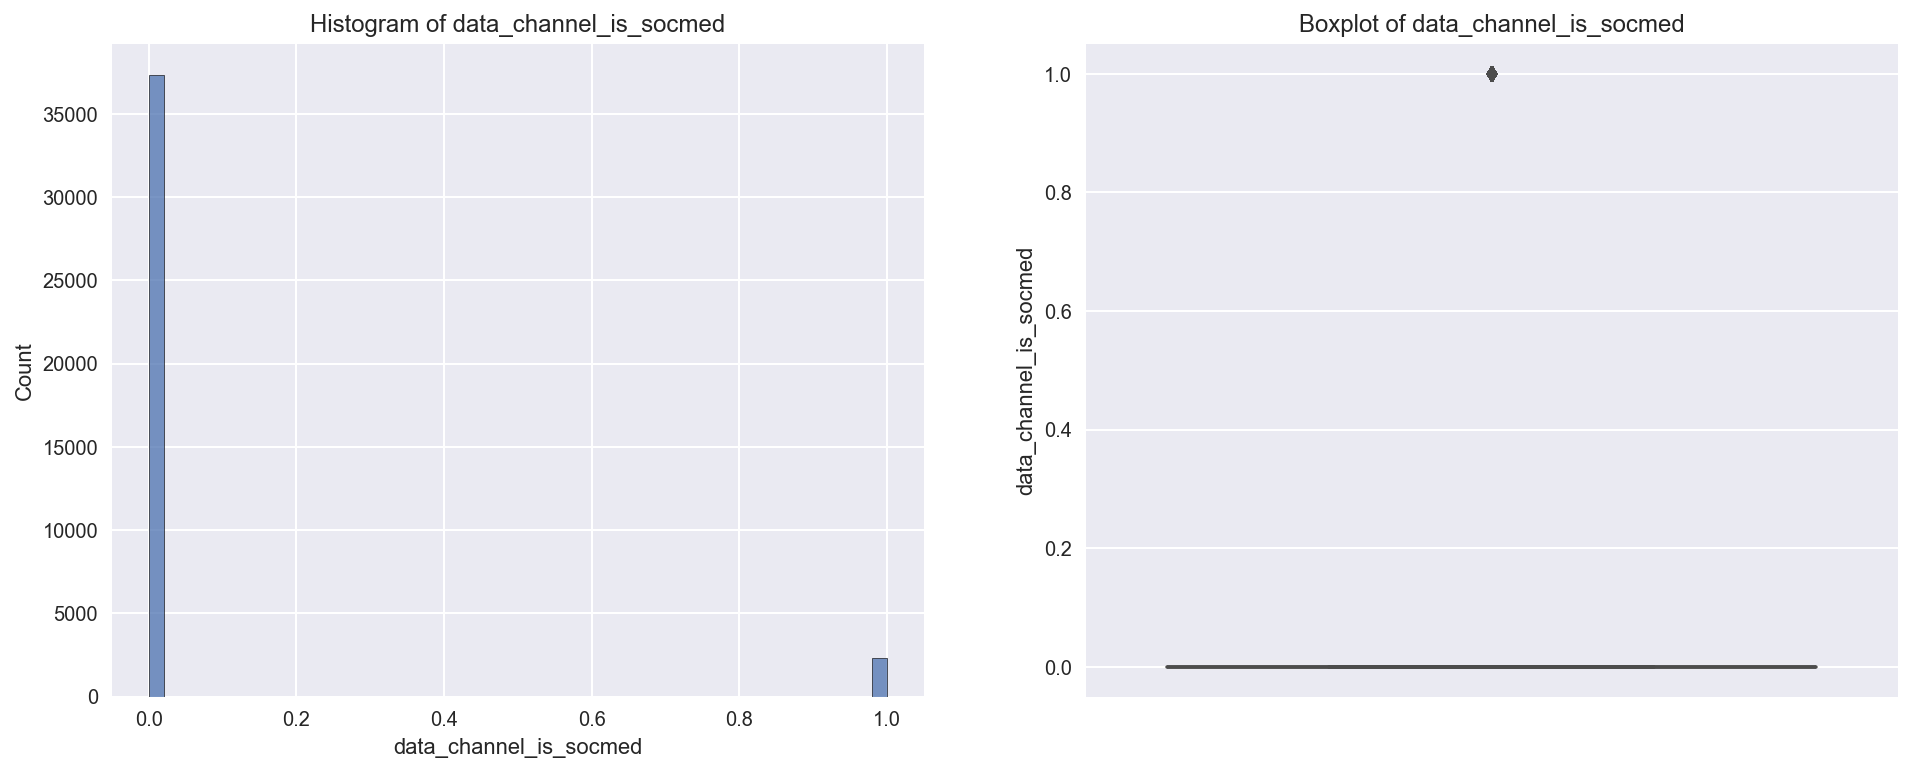

In [30]:
# 16. data_channel_is_socmed: Is data channel 'Social Media'?
hist_box(df, 'data_channel_is_socmed')
show_statistic(df, 'data_channel_is_socmed')

The data_channel_is_socmed can change to binary category.

data_channel_is_tech : mean = 0.1853, var = 0.1510, std = 0.3885, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


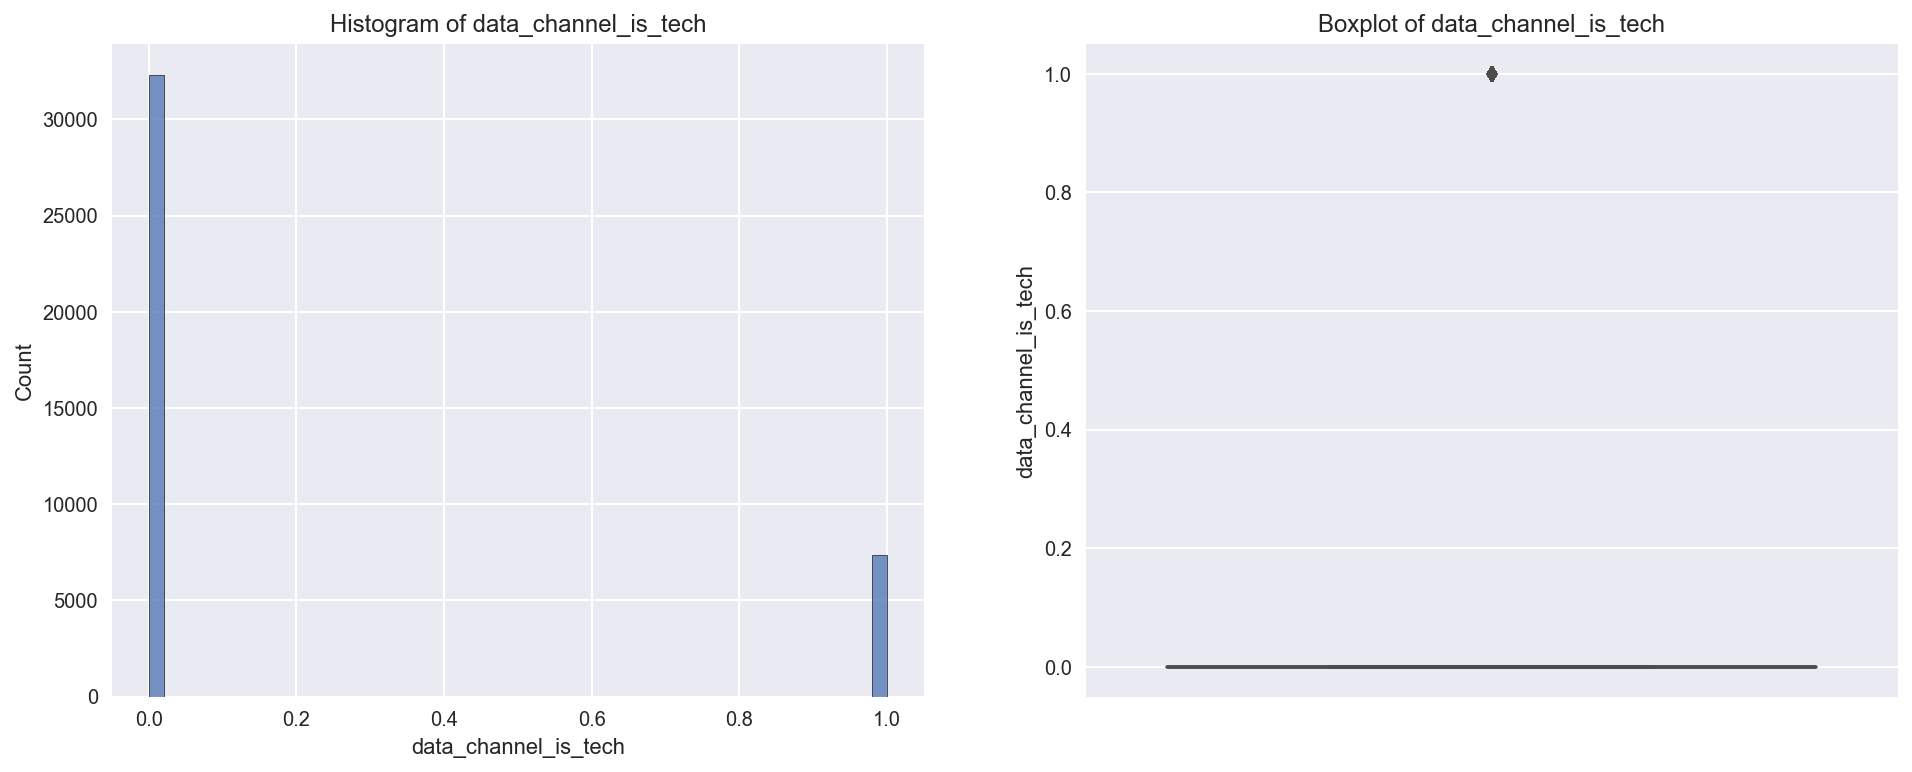

In [31]:
# 17. data_channel_is_tech: Is data channel 'Tech'?
hist_box(df, 'data_channel_is_tech')
show_statistic(df, 'data_channel_is_tech')

The data_channel_is_tech can change to binary category.

data_channel_is_world : mean = 0.2126, var = 0.1674, std = 0.4091, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


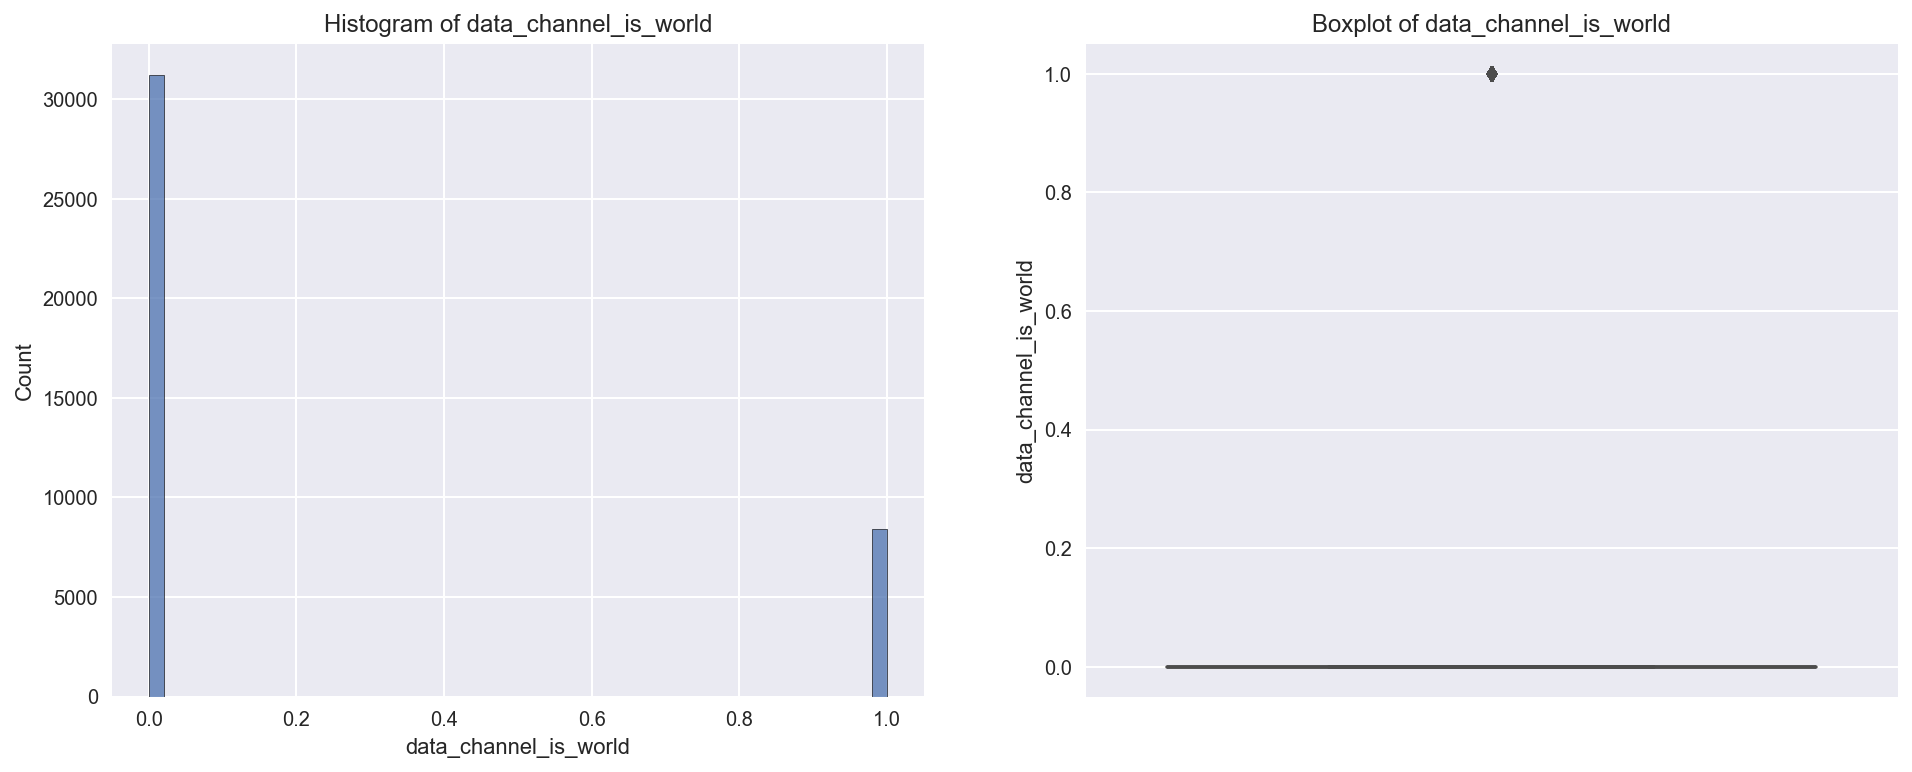

In [32]:
# 18. data_channel_is_world: Is data channel 'World'?
hist_box(df, 'data_channel_is_world')
show_statistic(df, 'data_channel_is_world')

The data_channel_is_world can change to binary category.

kw_min_min : mean = 26.1068, var = 4848.7846, std = 69.6332, q1(25%) = -1.0000, q3(75%) = 4.0000, min = -1.0000, max = 377.0000
It has 4 ourliers that larger than (mean + 3*std), account for 0.0101 %


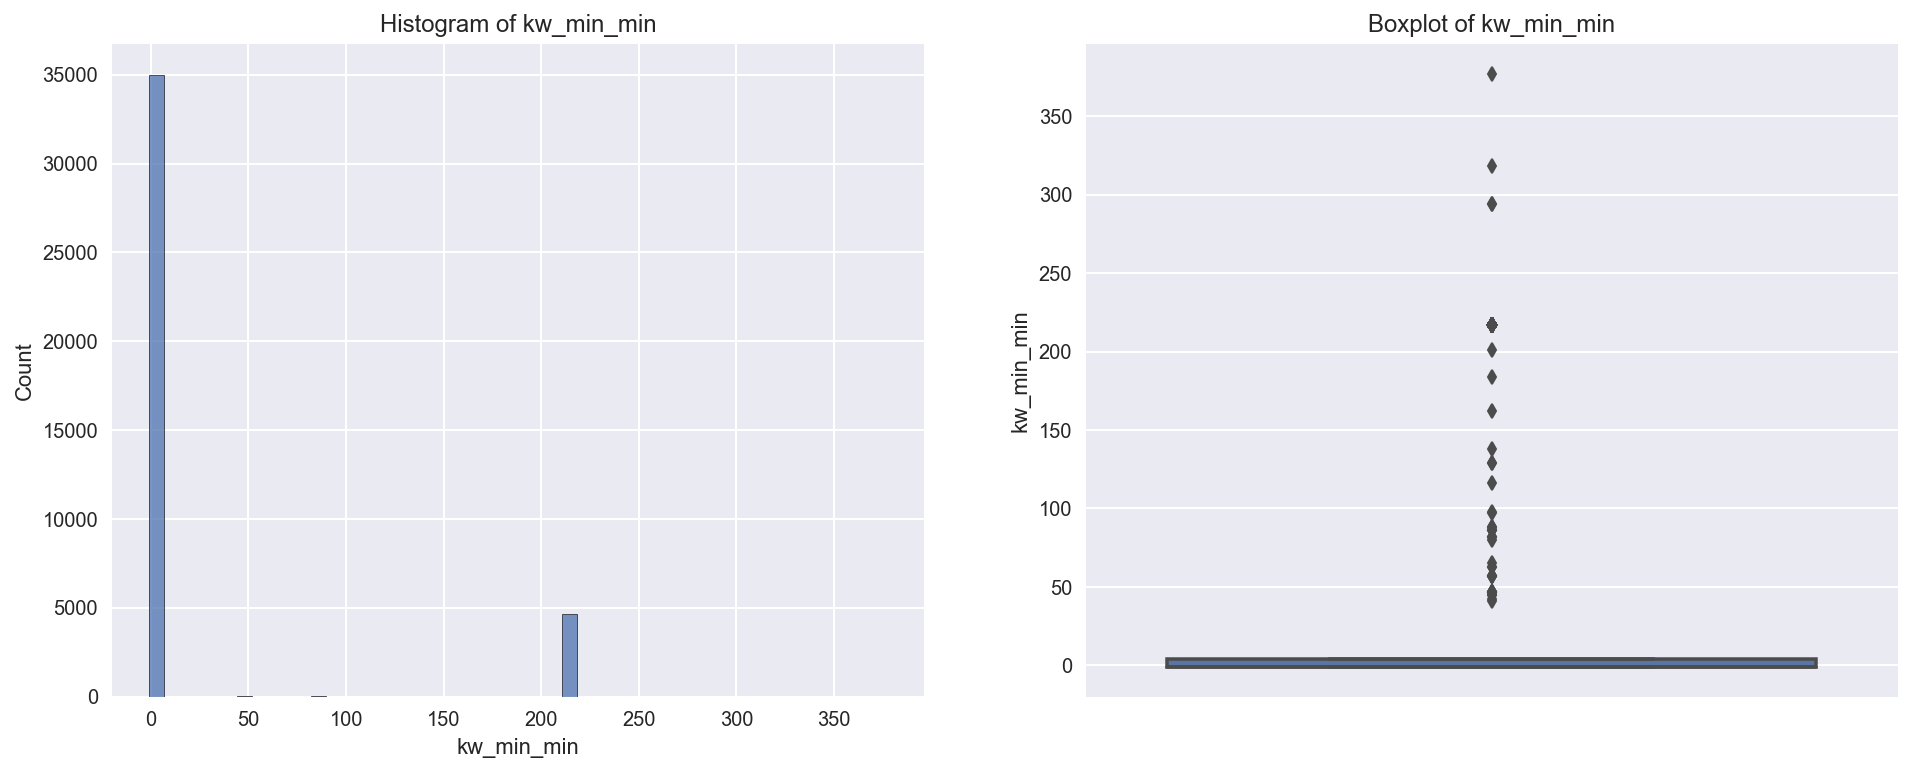

In [33]:
# 19. kw_min_min: Worst keyword (min. shares)
hist_box(df, 'kw_min_min')
show_statistic(df, 'kw_min_min')

The kw_min_min shows the observations concentrate near 0. It has 4 outliers.

kw_max_min : mean = 1153.9517, var = 14884093.6034, std = 3857.9909, q1(25%) = 445.0000, q3(75%) = 1000.0000, min = 0.0000, max = 298400.0000
It has 271 ourliers that larger than (mean + 3*std), account for 0.6836 %


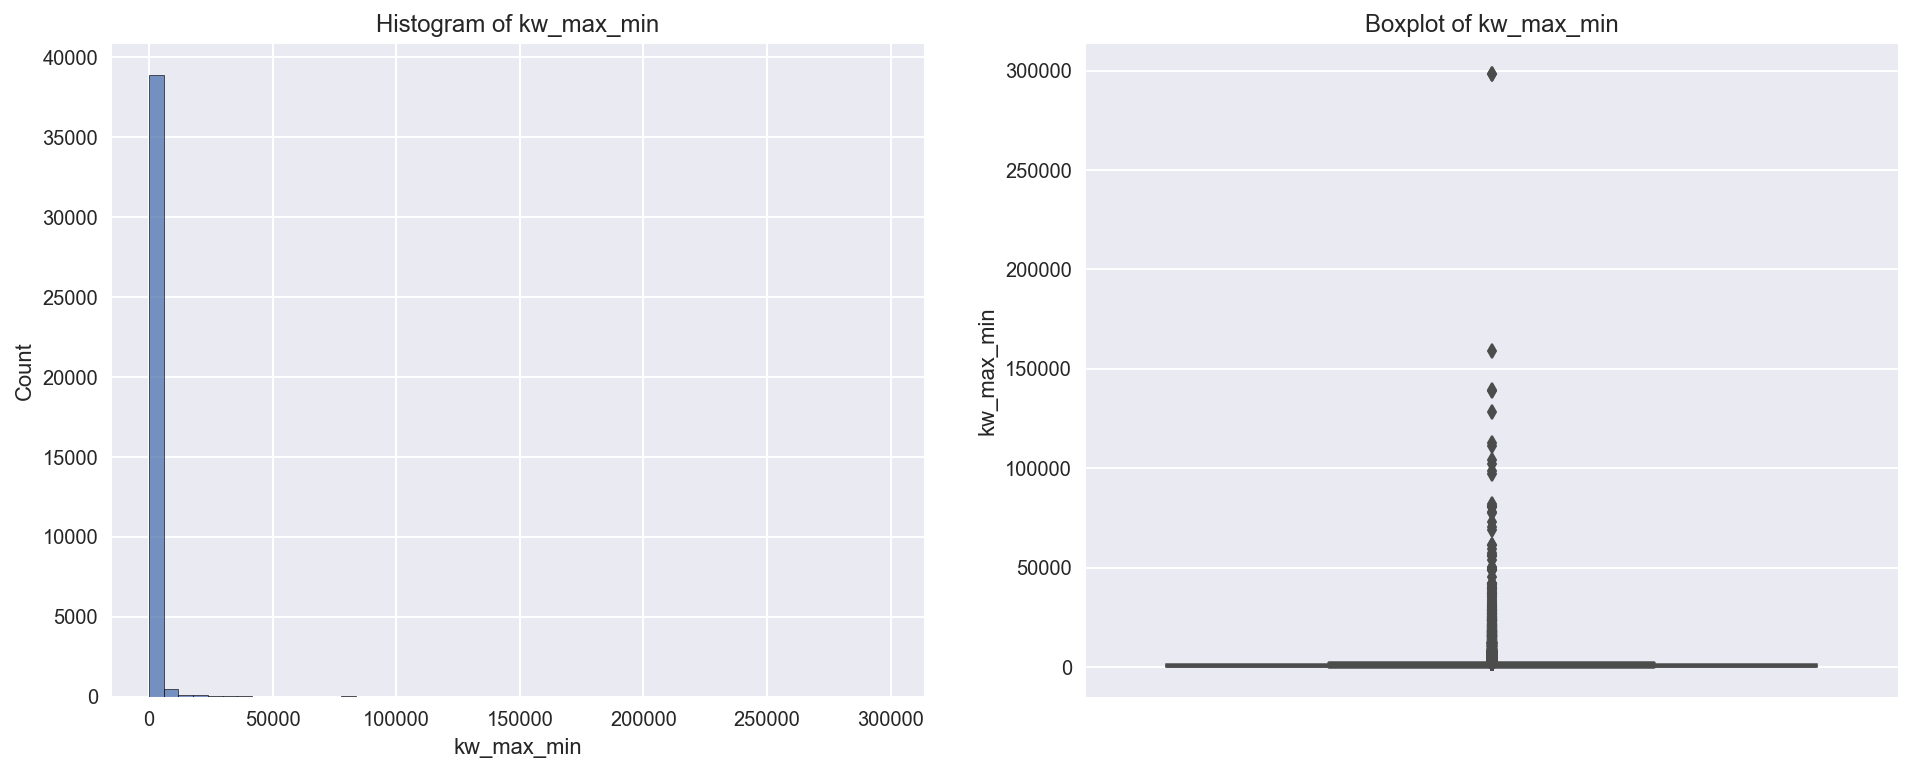

In [34]:
# 20. kw_max_min: Worst keyword (max. shares)
hist_box(df, 'kw_max_min')
show_statistic(df, 'kw_max_min')

The kw_max_min shows right skewed distribution and it has 0.6836 % outliers. It has a large variance.

kw_avg_min : mean = 312.3670, var = 385372.6347, std = 620.7839, q1(25%) = 141.7500, q3(75%) = 357.0000, min = -1.0000, max = 42827.8571
It has 278 ourliers that larger than (mean + 3*std), account for 0.7012 %


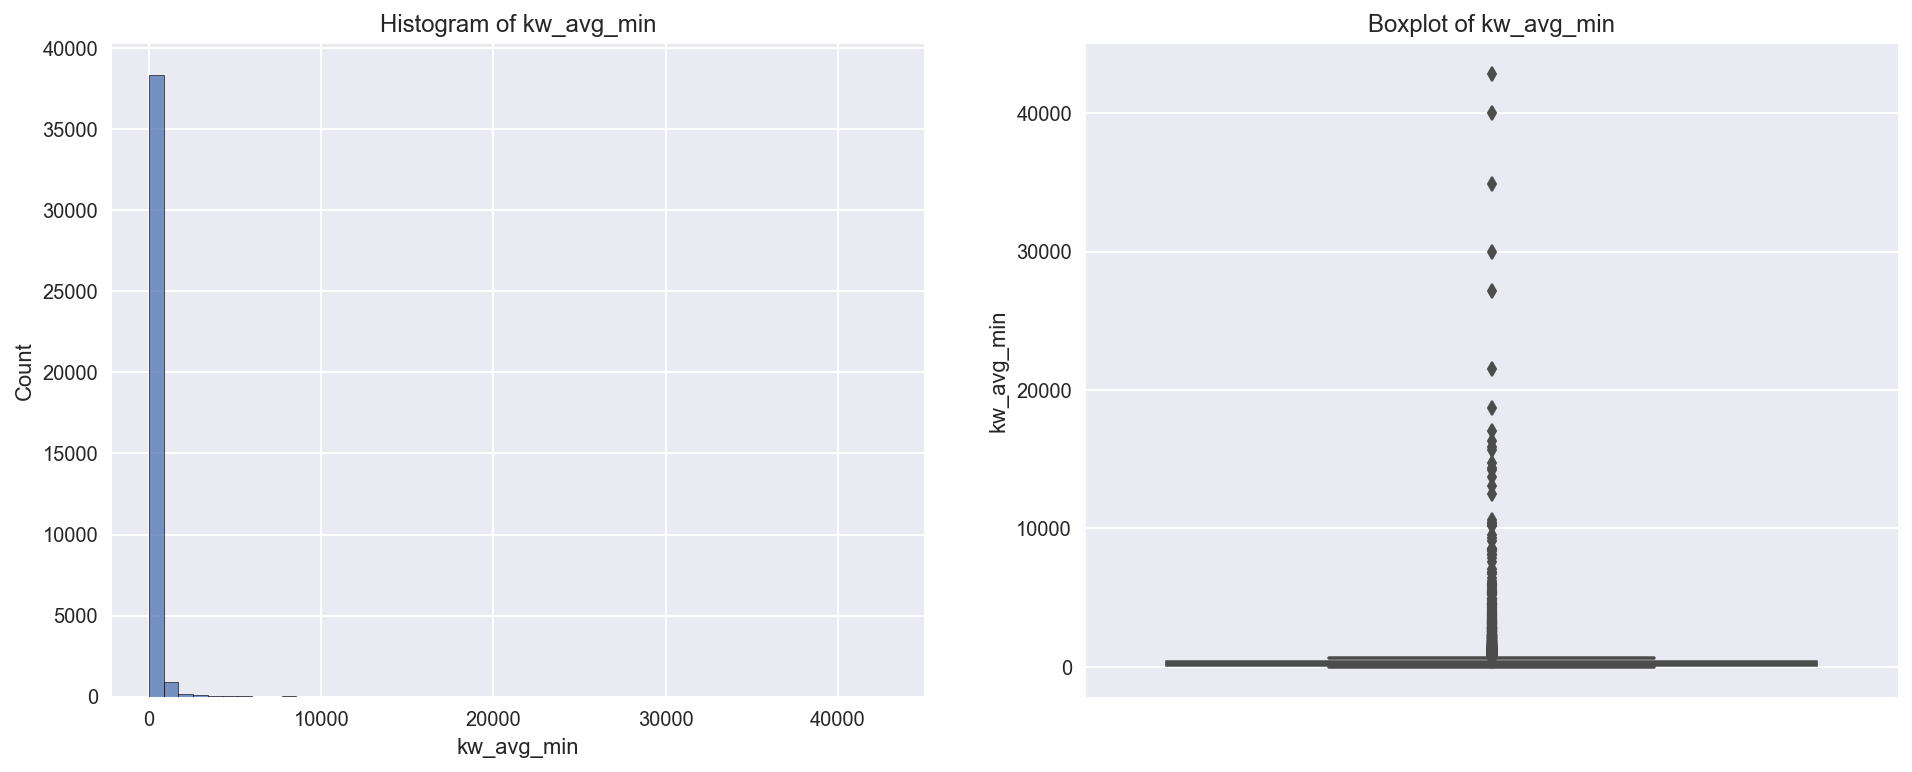

In [35]:
# 21. kw_avg_min: Worst keyword (avg. shares)
hist_box(df, 'kw_avg_min')
show_statistic(df, 'kw_avg_min')

The kw_avg_min shows right skewed distribution and it has 0.7012 % outliers.

kw_min_max : mean = 13612.3541, var = 3362379600.6345, std = 57986.0294, q1(25%) = 0.0000, q3(75%) = 7900.0000, min = 0.0000, max = 843300.0000
It has 469 ourliers that larger than (mean + 3*std), account for 1.1830 %


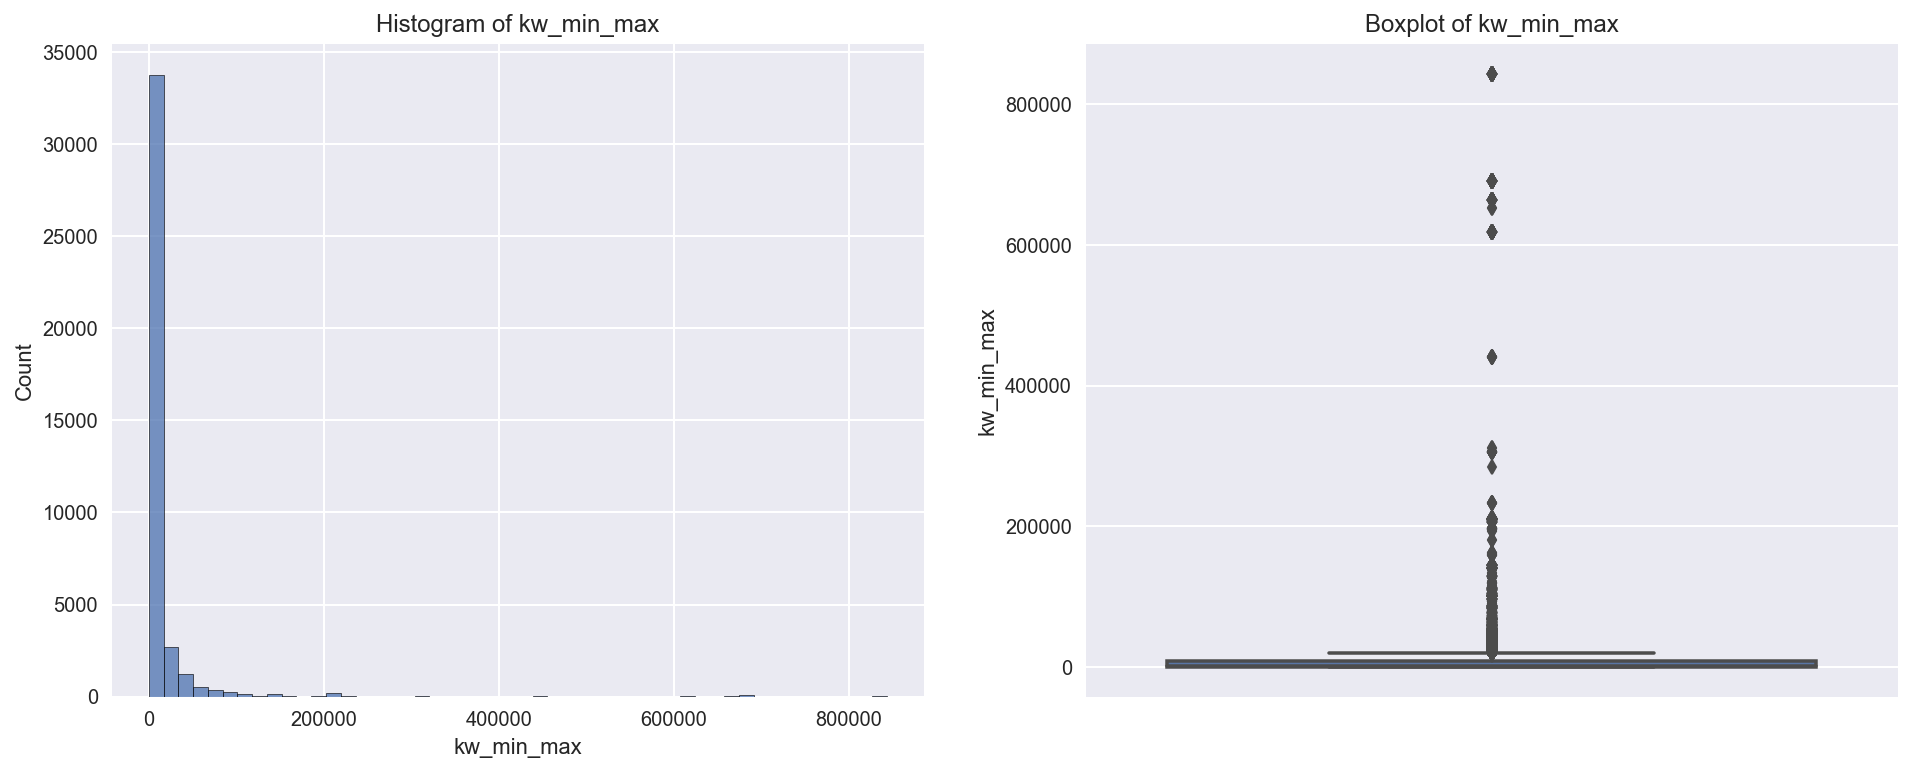

In [36]:
# 22. kw_min_max: Best keyword (min. shares)
hist_box(df, 'kw_min_max')
show_statistic(df, 'kw_min_max')

The kw_min_max shows right skewed distribution and it has 1.1830 % outliers. It has a large variance.

kw_max_max : mean = 752324.0667, var = 46011163591.2588, std = 214502.1296, q1(25%) = 843300.0000, q3(75%) = 843300.0000, min = 0.0000, max = 843300.0000
It has 3096 ourliers that larger than (mean + 3*std), account for 7.8095 %


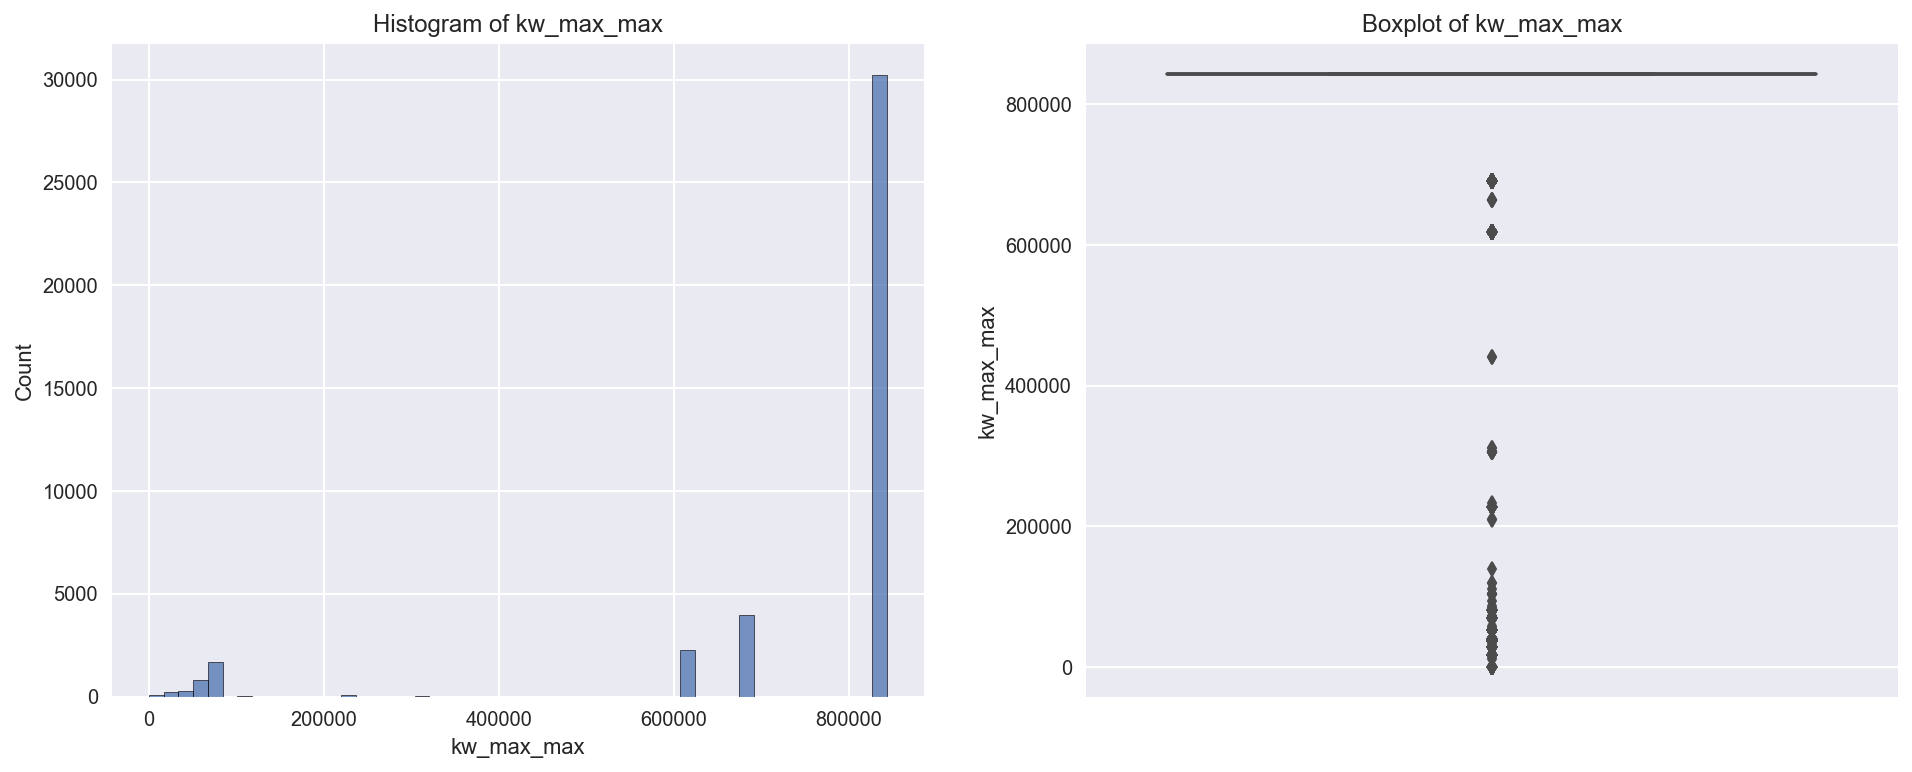

In [37]:
# 23. kw_max_max: Best keyword (max. shares)
hist_box(df, 'kw_max_max')
show_statistic(df, 'kw_max_max')

The kw_max_max shows the observations concentrate near 800000. It has 7.8095 % outliers.

kw_avg_max : mean = 259281.9381, var = 18252617221.3965, std = 135102.2473, q1(25%) = 172846.8750, q3(75%) = 330980.0000, min = 0.0000, max = 843300.0000
It has 336 ourliers that larger than (mean + 3*std), account for 0.8475 %


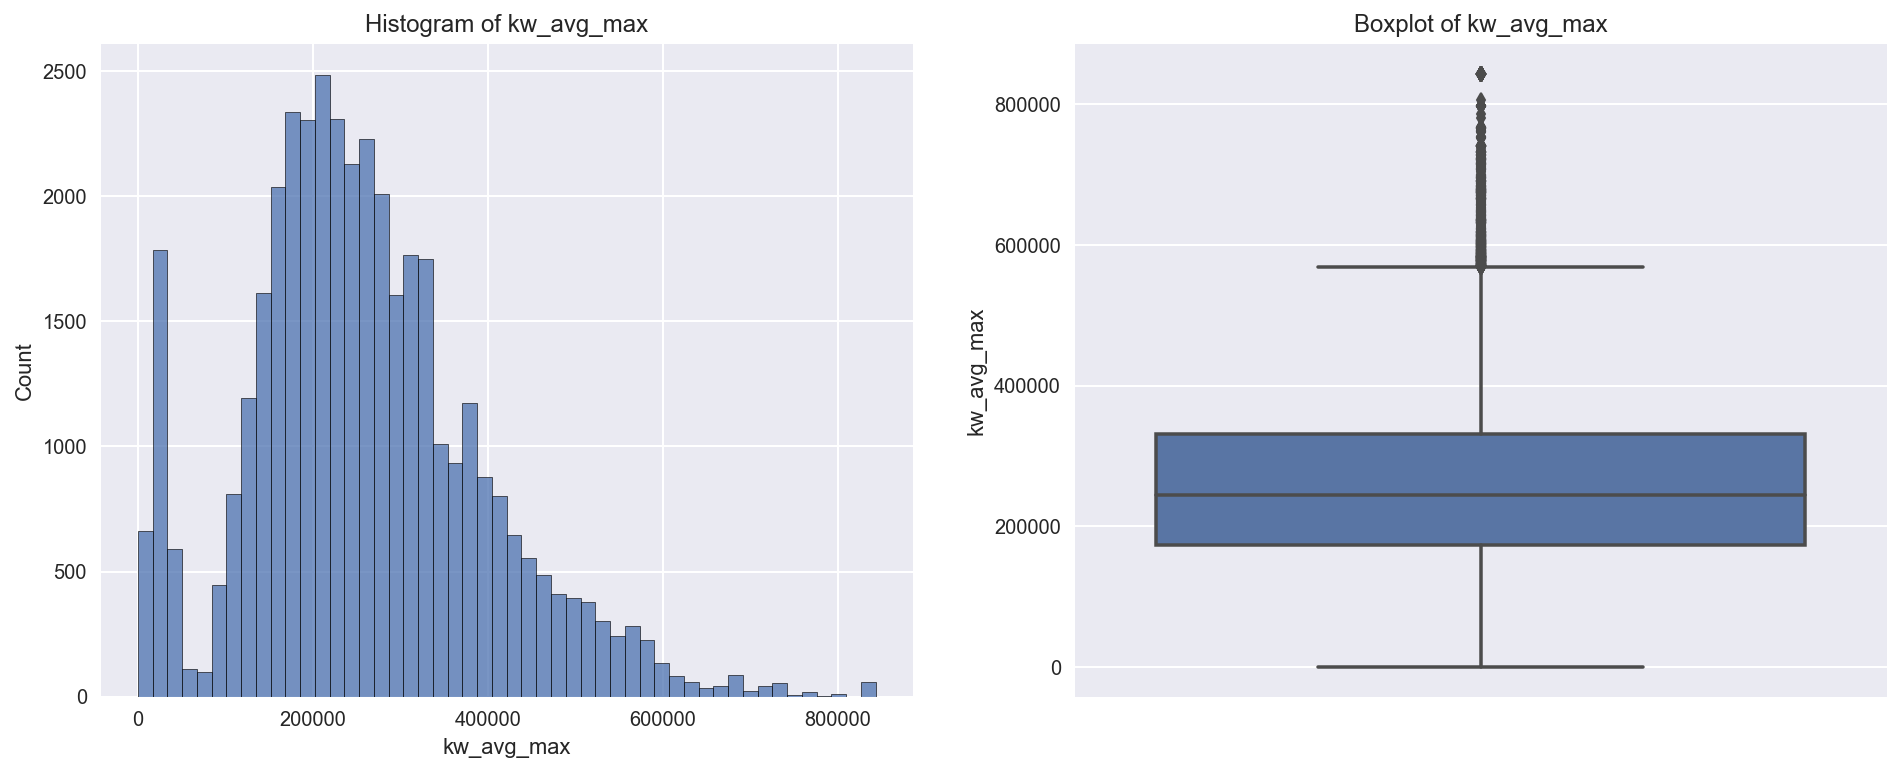

In [38]:
# 24. kw_avg_max: Best keyword (avg. shares)
hist_box(df, 'kw_avg_max')
show_statistic(df, 'kw_avg_max')

The kw_avg_max shows right skewed distribution and it has 0.8475 % outliers. It has a large variance.

kw_min_avg : mean = 1117.1466, var = 1293808.3149, std = 1137.4570, q1(25%) = 0.0000, q3(75%) = 2056.7810, min = -1.0000, max = 3613.0398


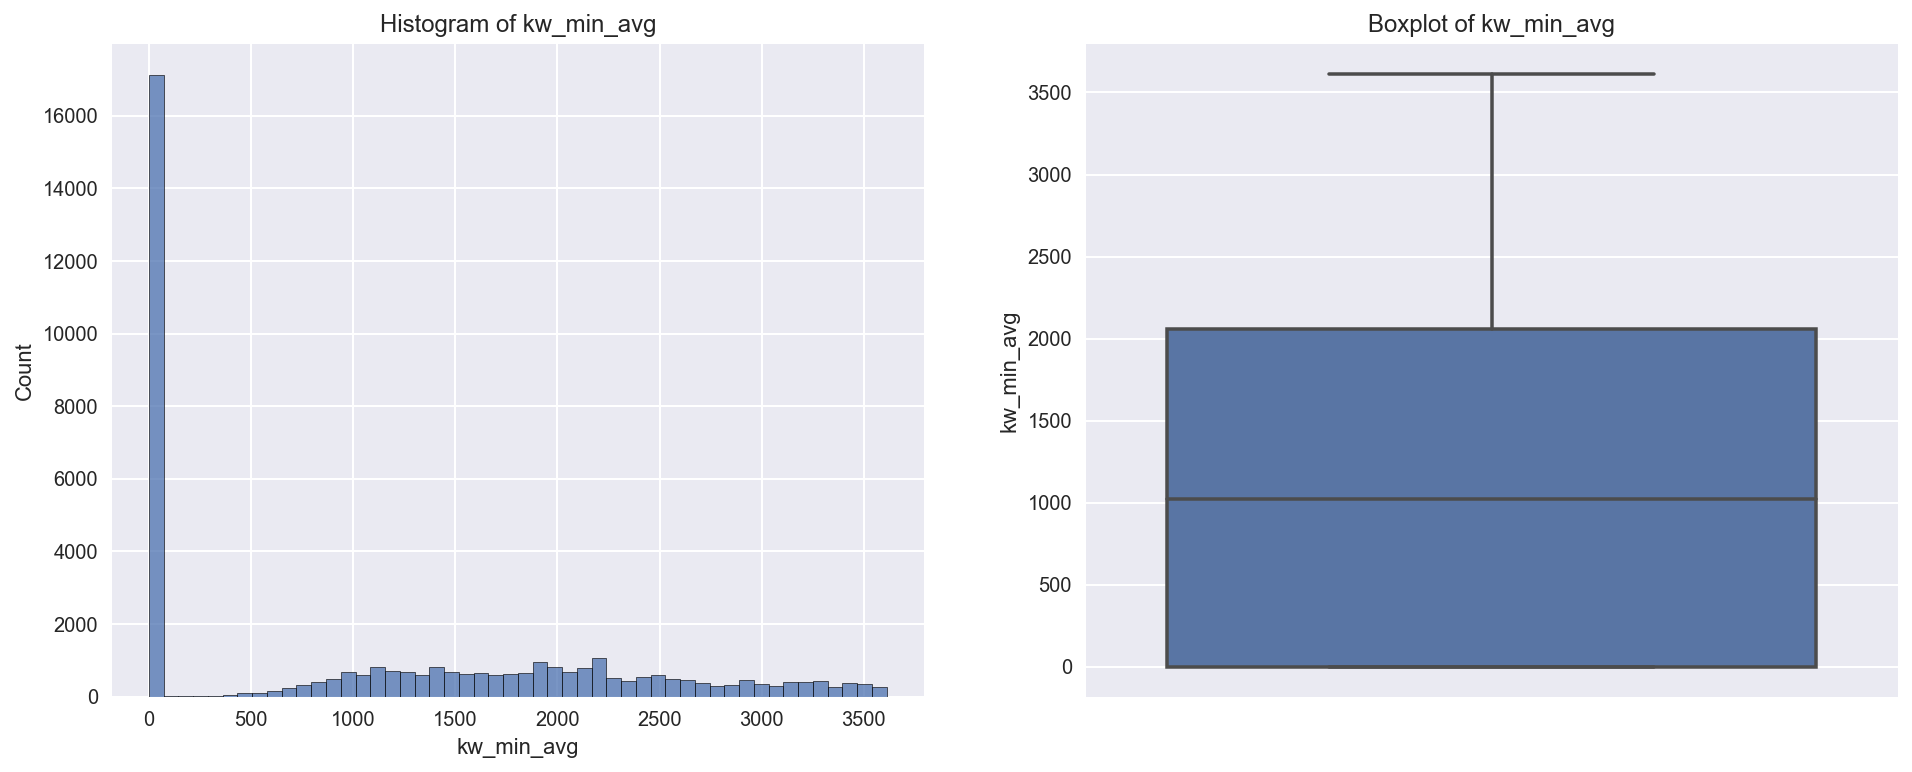

In [39]:
# 25. kw_min_avg: Avg. keyword (min. shares)
hist_box(df, 'kw_min_avg')
show_statistic(df, 'kw_min_avg')

The kw_min_avg shows normal distribution except near 0. It has no outliers. It has a large variance.

kw_max_avg : mean = 5657.2112, var = 37196239.1448, std = 6098.8720, q1(25%) = 3562.1016, q3(75%) = 6019.9540, min = 0.0000, max = 298400.0000
It has 393 ourliers that larger than (mean + 3*std), account for 0.9913 %


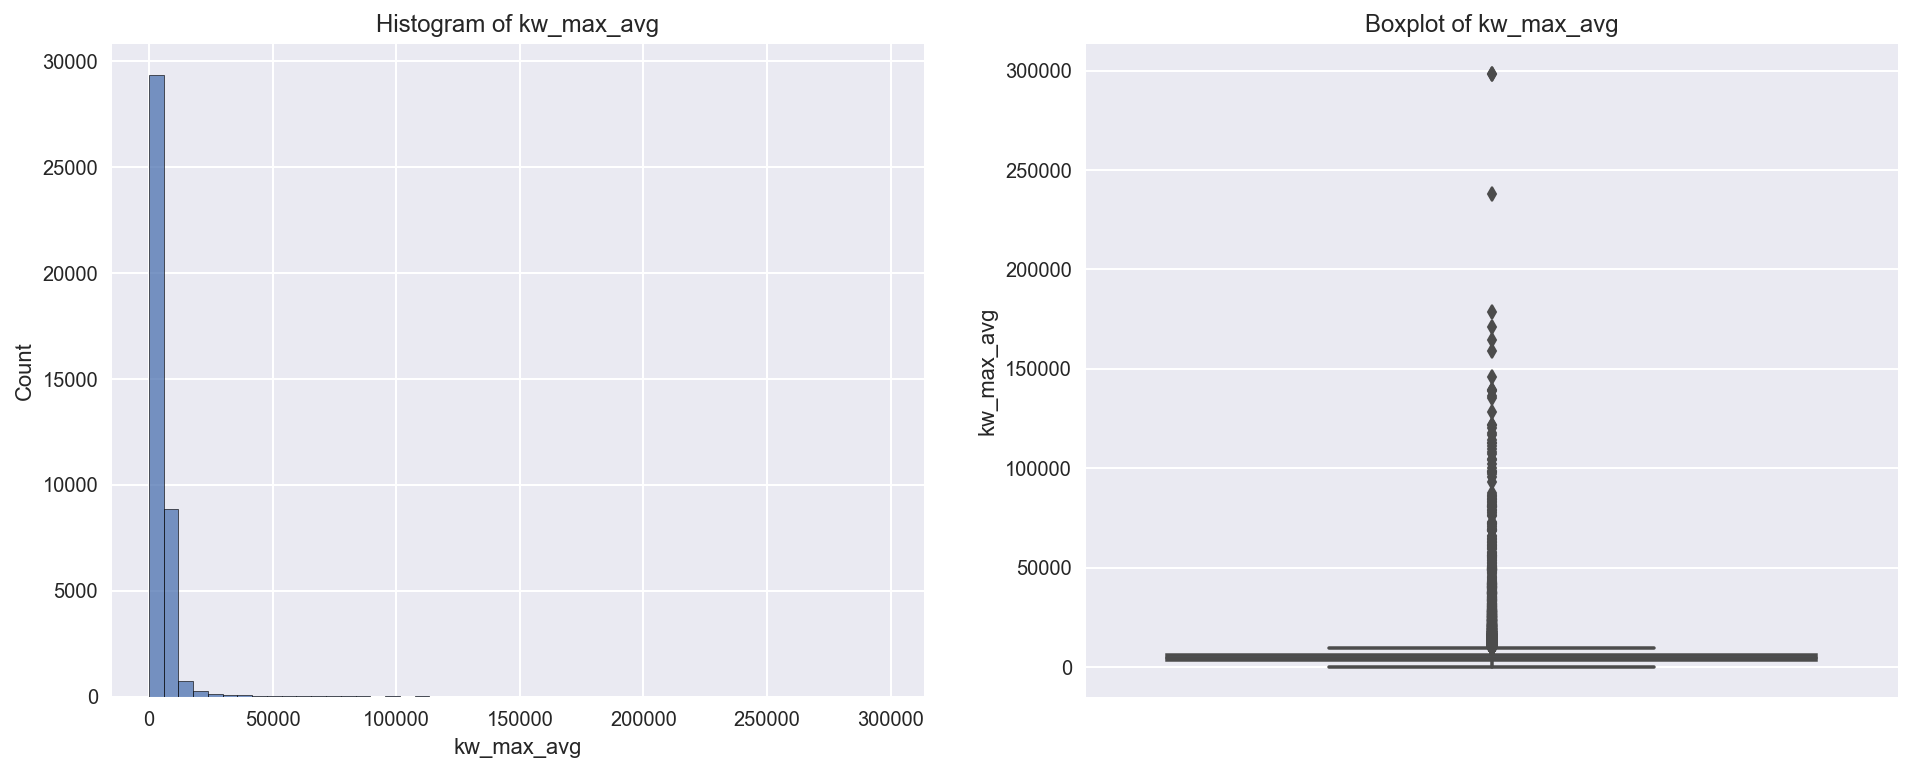

In [40]:
# 26. kw_max_avg: Avg. keyword (max. shares)
hist_box(df, 'kw_max_avg')
show_statistic(df, 'kw_max_avg')

The kw_max_avg shows right-skewed distribution. It has 0.9913 % outliers. It has a large variance.

kw_avg_avg : mean = 3135.8586, var = 1737520.4694, std = 1318.1504, q1(25%) = 2382.4486, q3(75%) = 3600.2296, min = 0.0000, max = 43567.6599
It has 378 ourliers that larger than (mean + 3*std), account for 0.9535 %


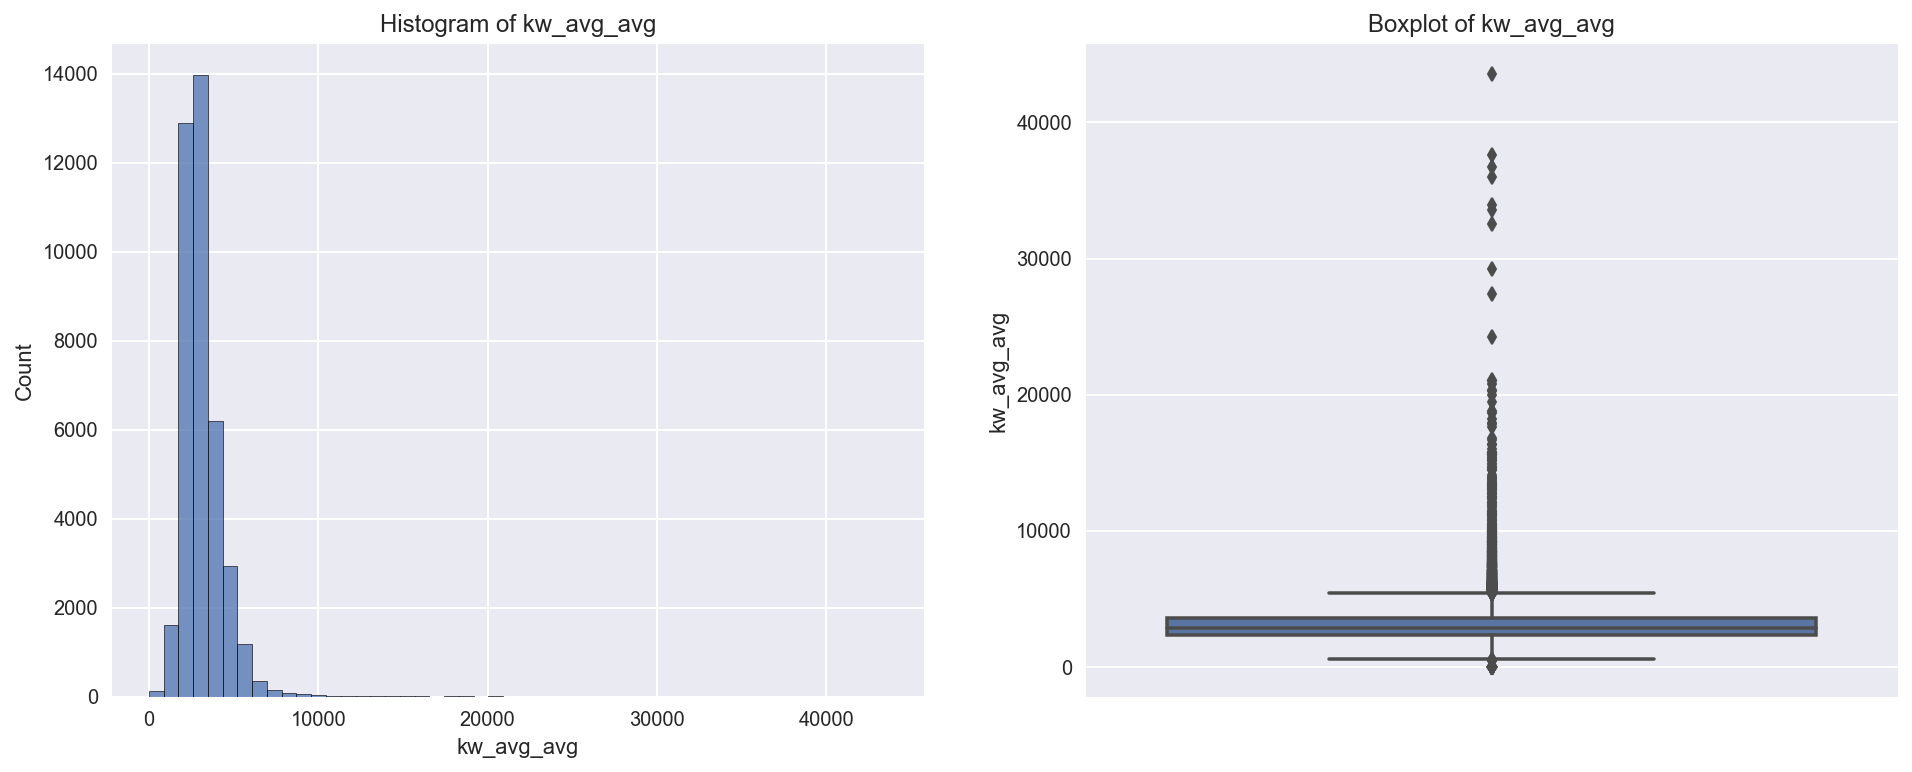

In [41]:
# 27. kw_avg_avg: Avg. keyword (avg. shares)
hist_box(df, 'kw_avg_avg')
show_statistic(df, 'kw_avg_avg')

The kw_max_avg shows right-skewed distribution. It has 0.9535 % outliers. It has a large variance.

self_reference_min_shares : mean = 3998.7554, var = 389615113.7495, std = 19738.6705, q1(25%) = 639.0000, q3(75%) = 2600.0000, min = 0.0000, max = 843300.0000
It has 270 ourliers that larger than (mean + 3*std), account for 0.6811 %


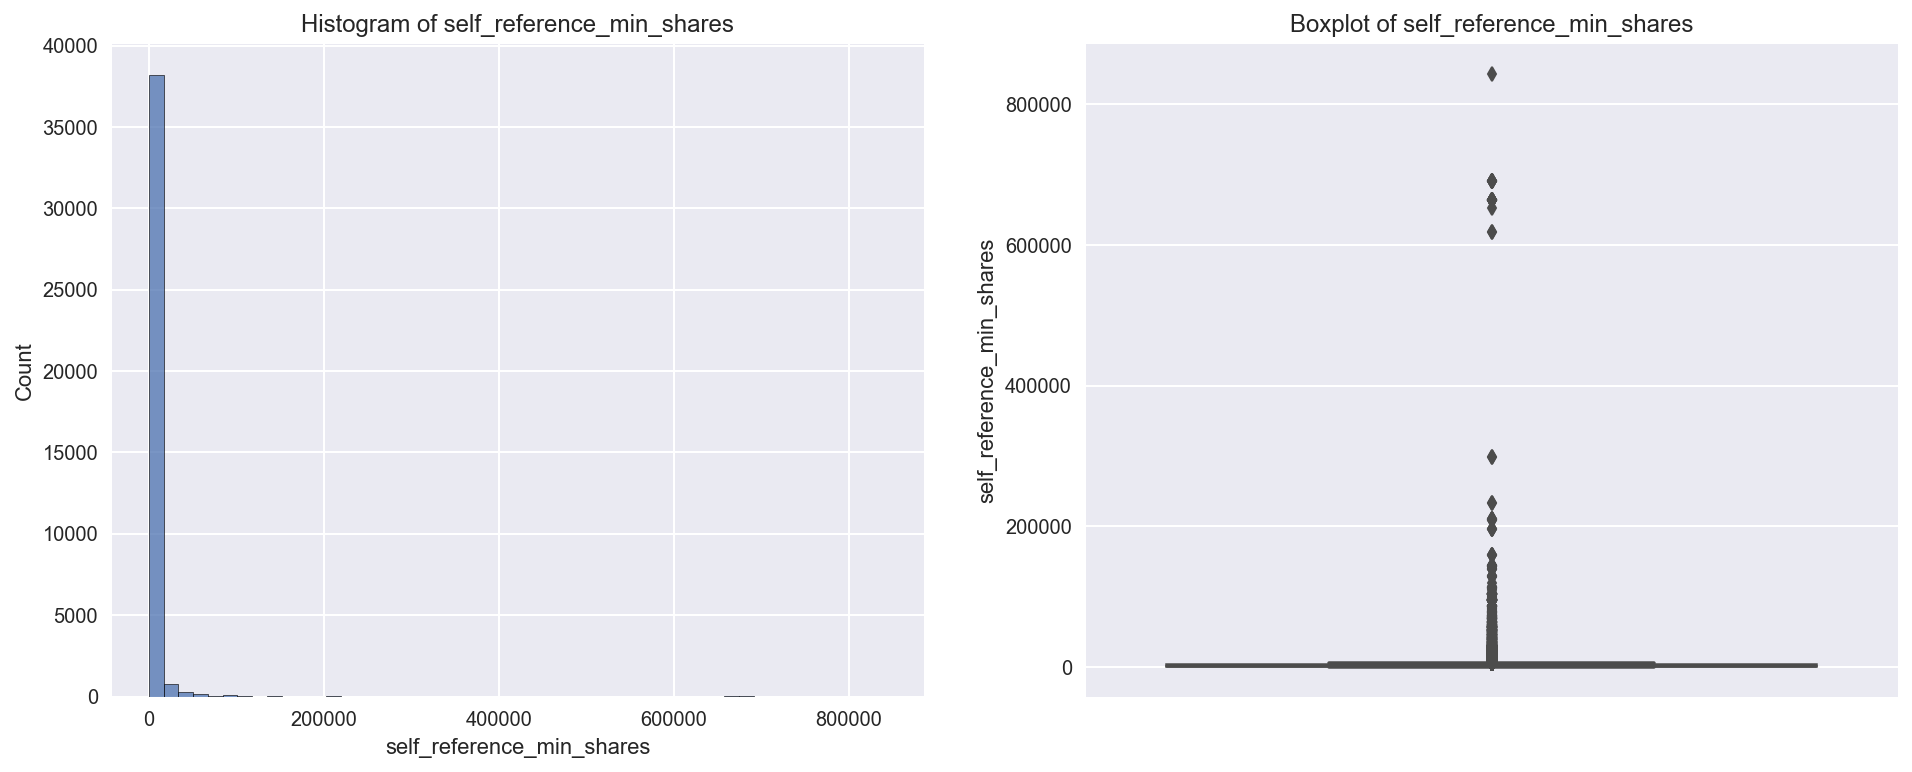

In [42]:
# 28. self_reference_min_shares: Min. shares of referenced articles in Mashable
hist_box(df, 'self_reference_min_shares')
show_statistic(df, 'self_reference_min_shares')

The kw_max_avg shows right-skewed distribution. It has 0.6811 % outliers. It has a large variance.

self_reference_max_shares : mean = 10329.2127, var = 1683262042.7293, std = 41027.5766, q1(25%) = 1100.0000, q3(75%) = 8000.0000, min = 0.0000, max = 843300.0000
It has 256 ourliers that larger than (mean + 3*std), account for 0.6457 %


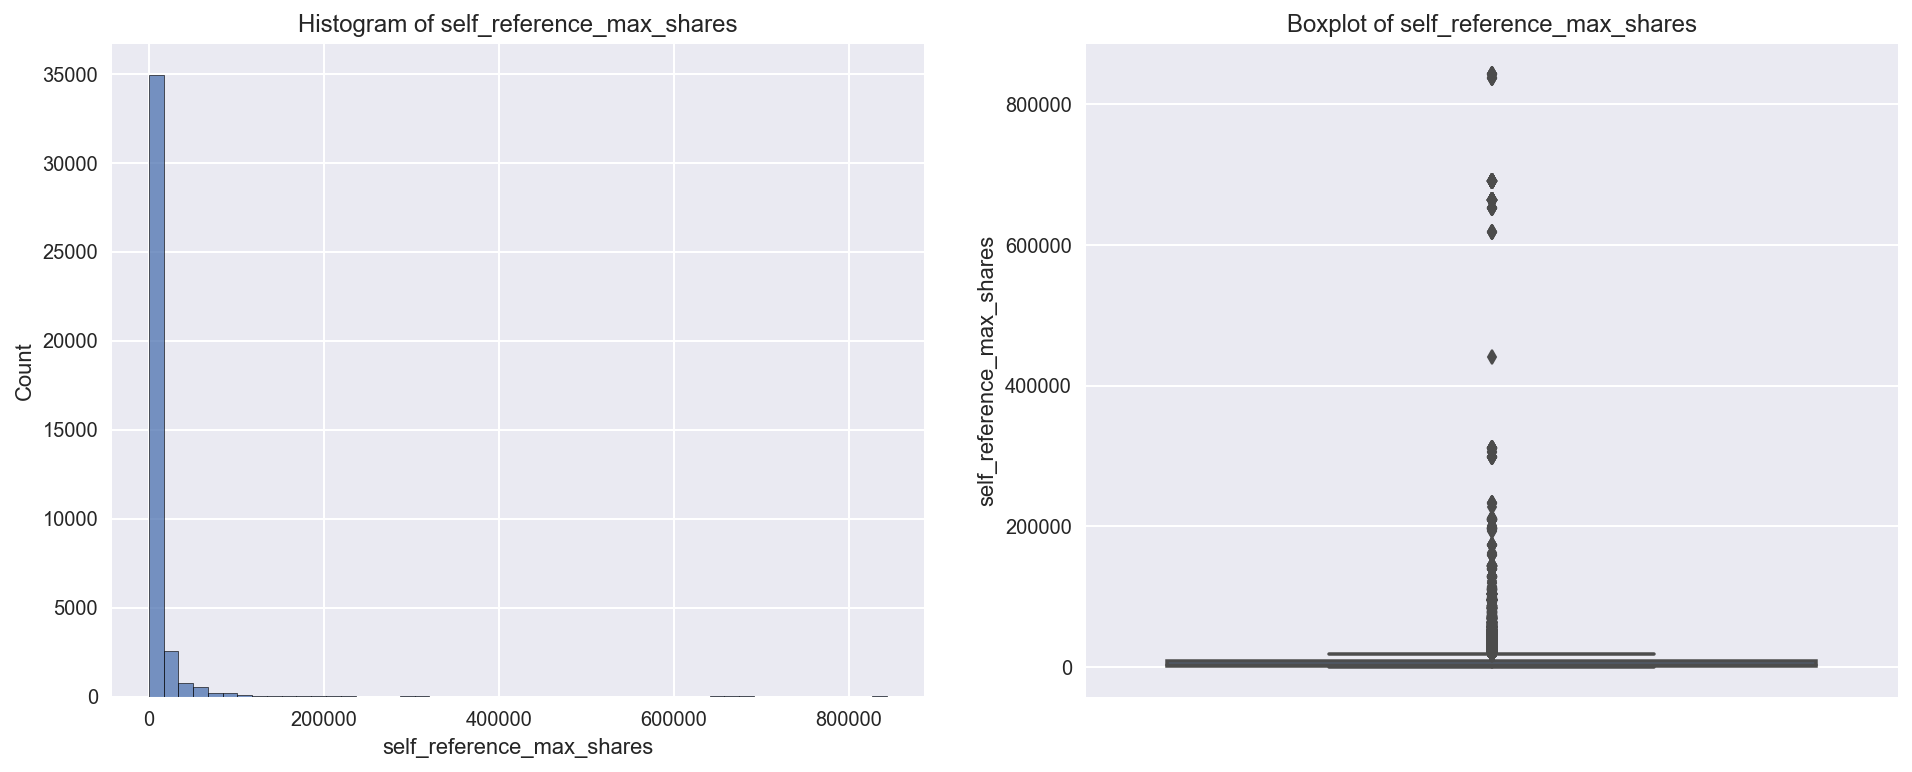

In [43]:
# 29. self_reference_max_shares: Max. shares of referenced articles in Mashable
hist_box(df, 'self_reference_max_shares')
show_statistic(df, 'self_reference_max_shares')

The self_reference_max_shares shows right-skewed distribution. It has 0.6811 % outliers. It has a large variance.

self_reference_avg_sharess : mean = 6401.6976, var = 586188608.4150, std = 24211.3322, q1(25%) = 981.1875, q3(75%) = 5200.0000, min = 0.0000, max = 843300.0000
It has 321 ourliers that larger than (mean + 3*std), account for 0.8097 %


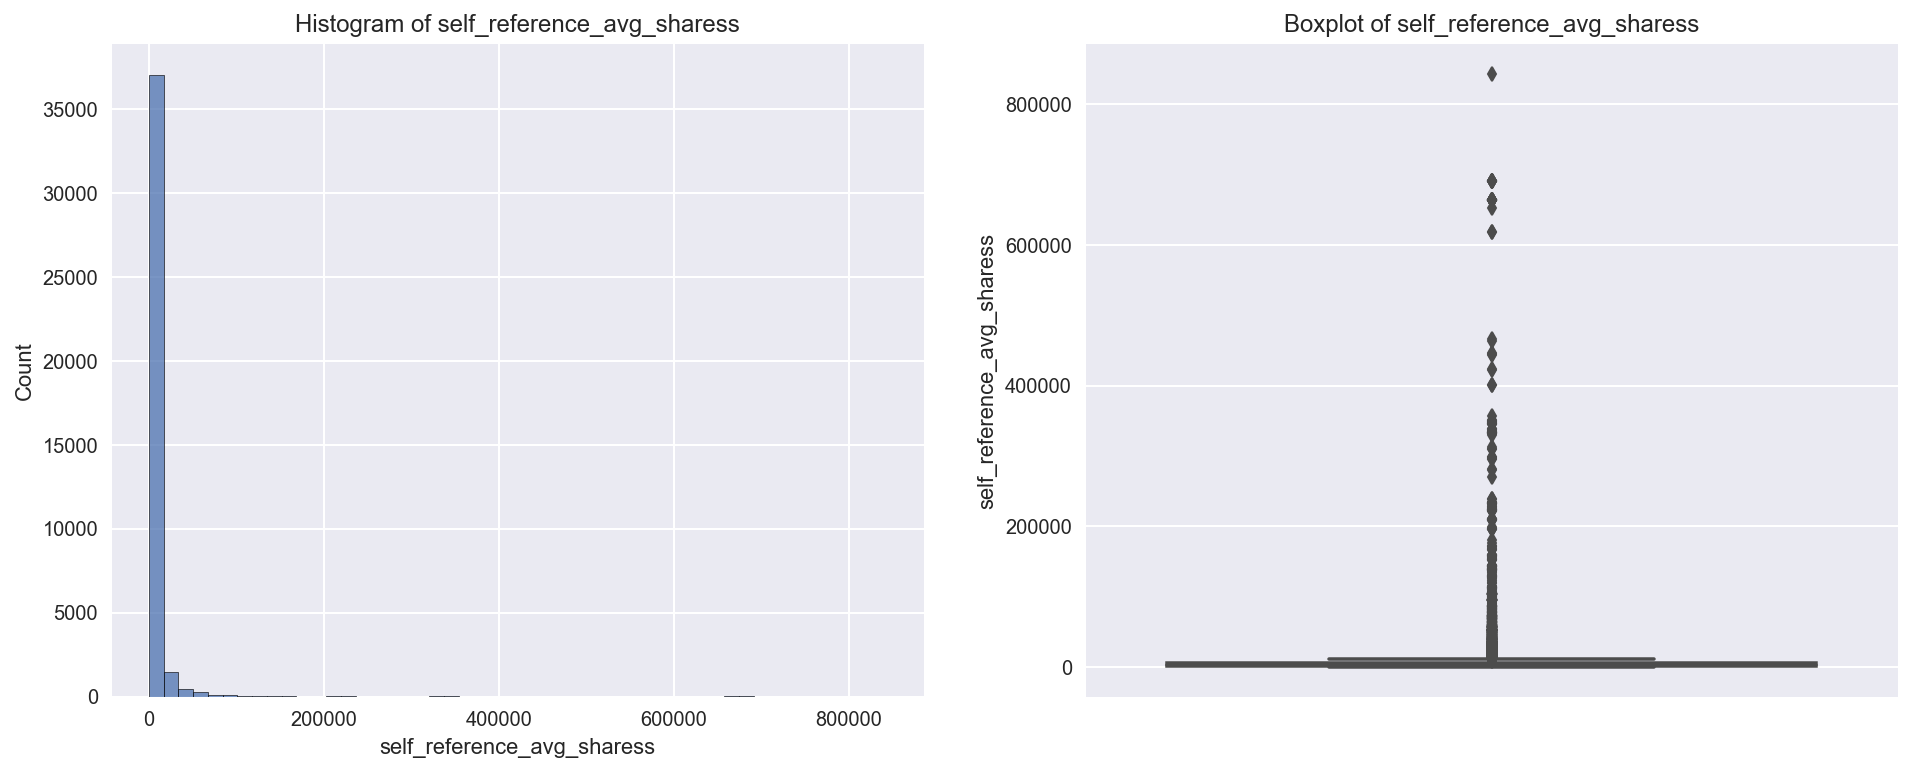

In [44]:
# 30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
hist_box(df, 'self_reference_avg_sharess')
show_statistic(df, 'self_reference_avg_sharess')

The self_reference_avg_sharess shows right-skewed distribution. It has 0.8097 % outliers. It has a large variance.

weekday_is_monday : mean = 0.1680, var = 0.1398, std = 0.3739, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


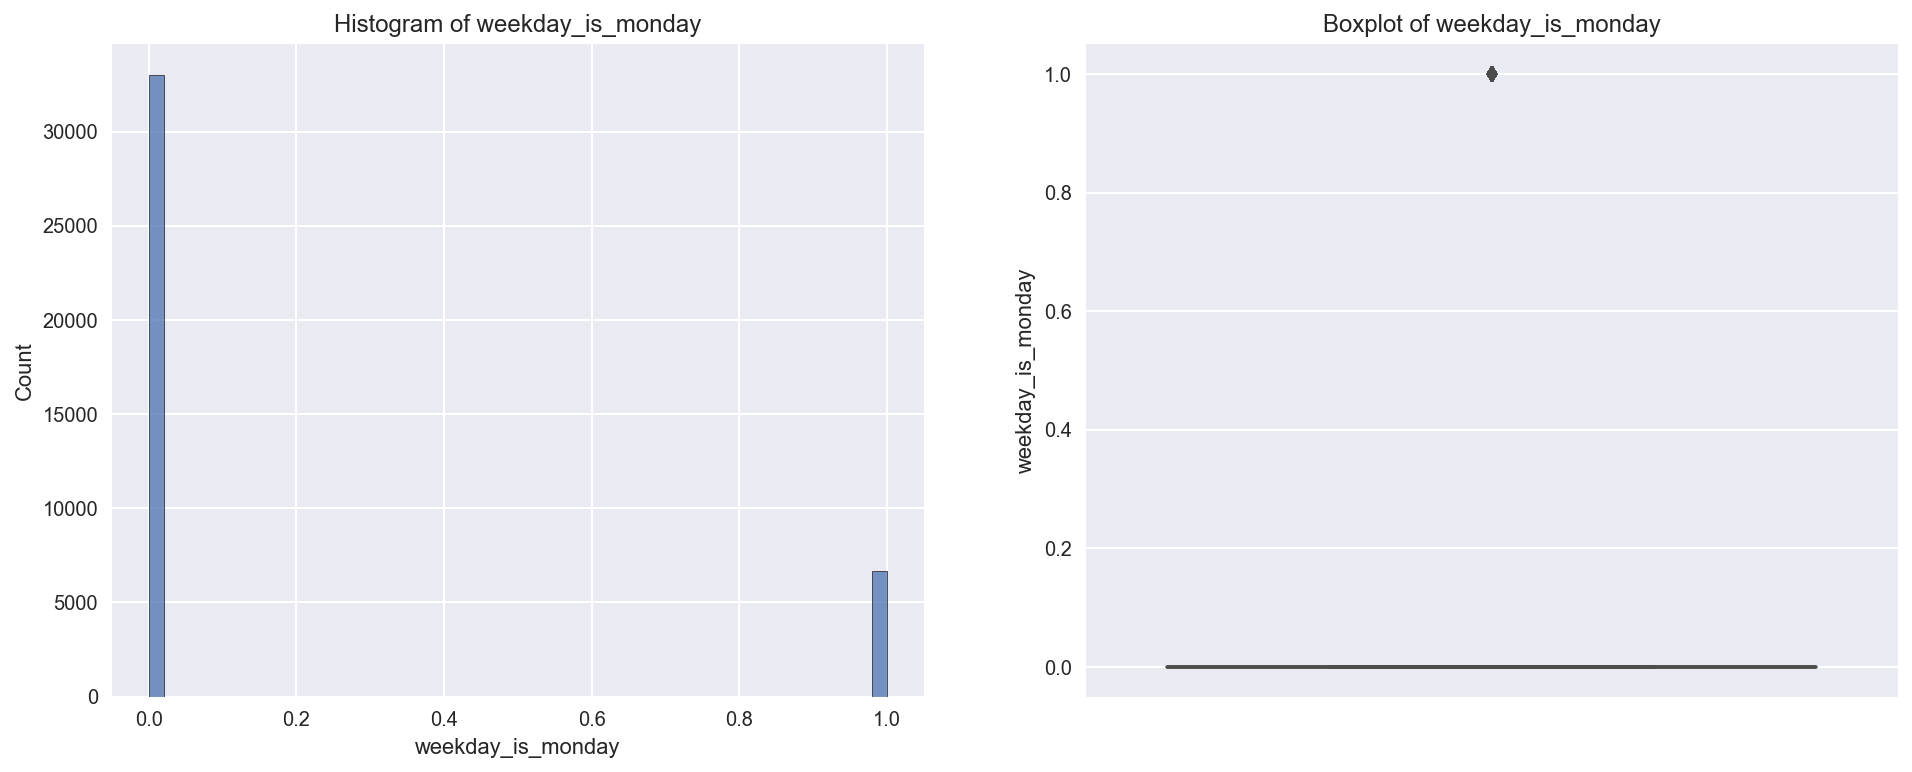

In [45]:
# 31. weekday_is_monday: Was the article published on a Monday?
hist_box(df, 'weekday_is_monday')
show_statistic(df, 'weekday_is_monday')

The weekday_is_monday can convert to binary category.

weekday_is_tuesday : mean = 0.1864, var = 0.1517, std = 0.3894, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


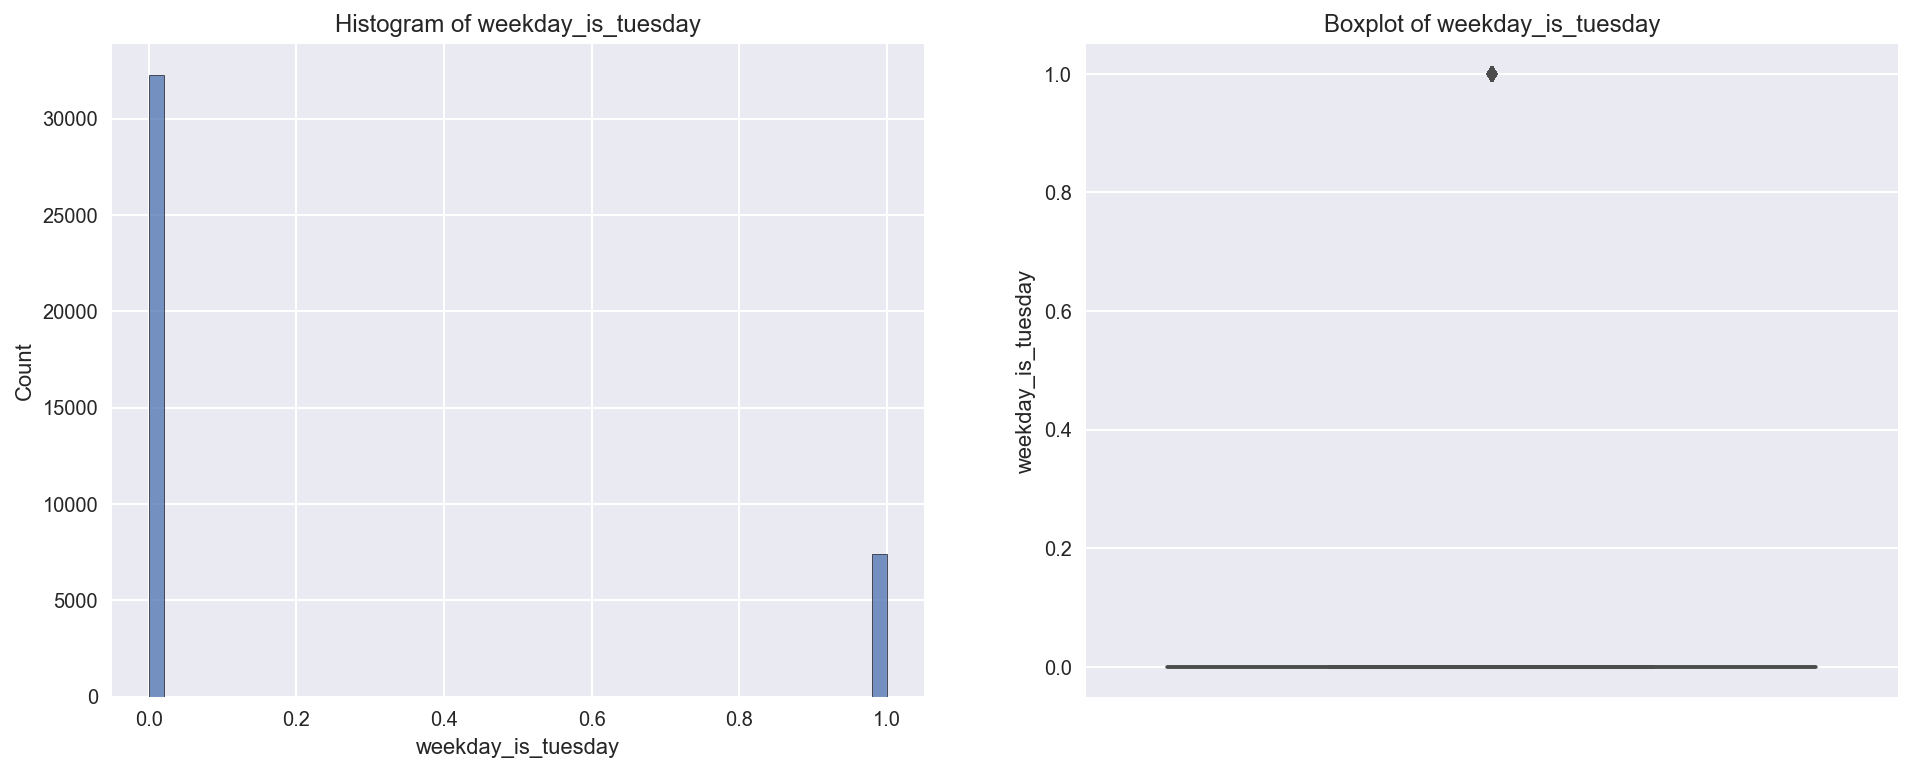

In [46]:
# 32. weekday_is_tuesday: Was the article published on a Tuesday?
hist_box(df, 'weekday_is_tuesday')
show_statistic(df, 'weekday_is_tuesday')

The weekday_is_tuesday can convert to binary category.

weekday_is_wednesday : mean = 0.1875, var = 0.1524, std = 0.3904, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


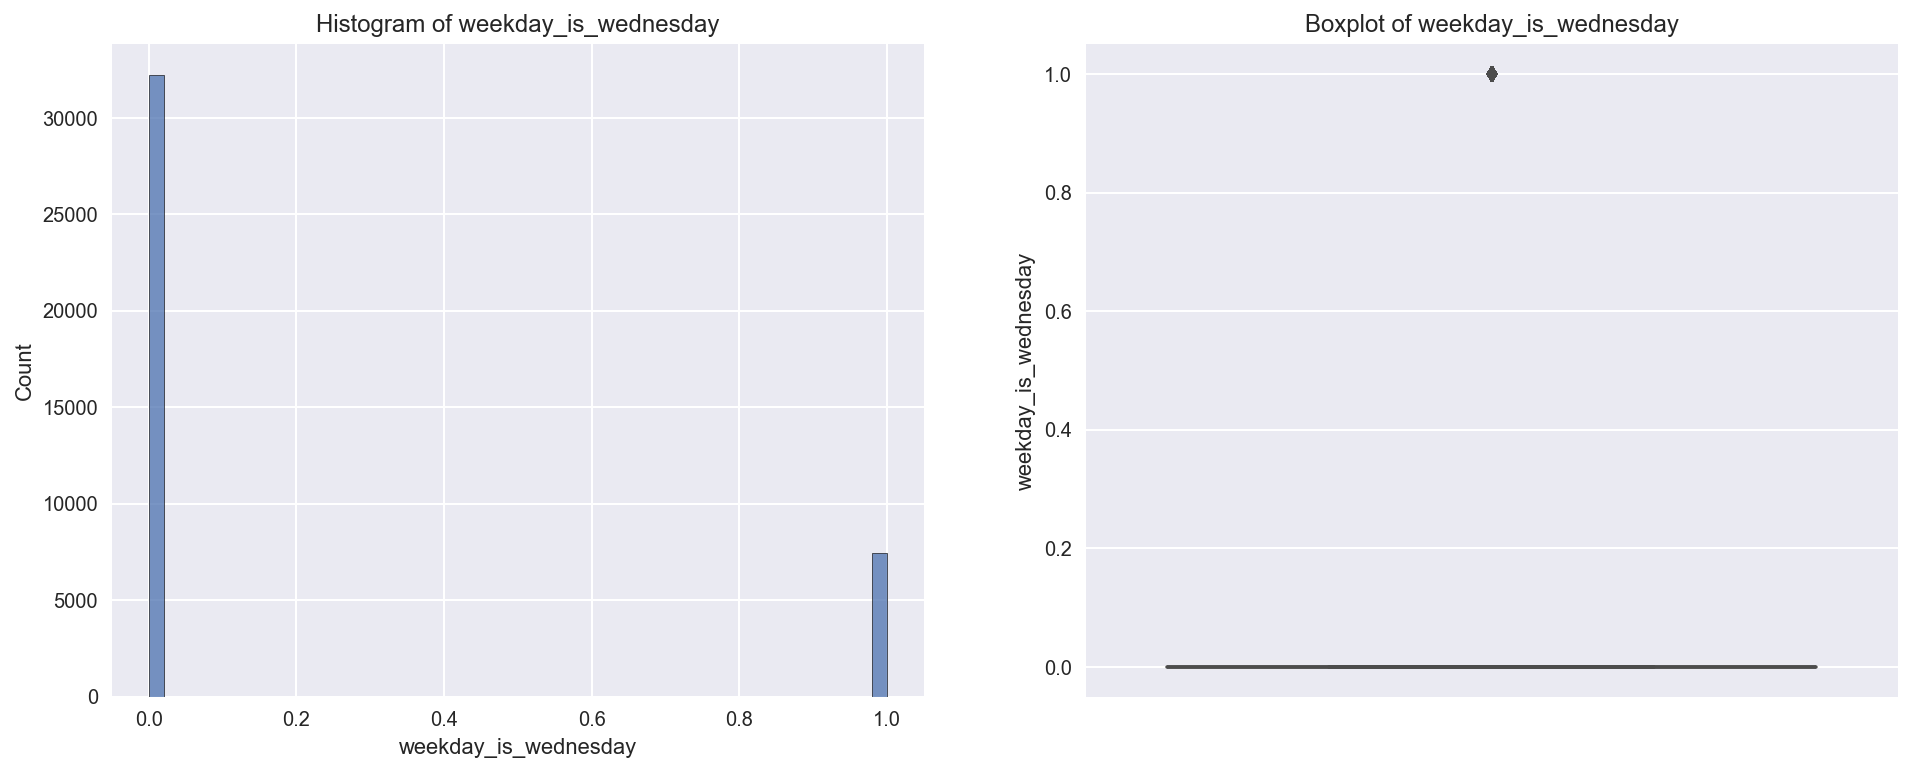

In [47]:
# 33. weekday_is_wednesday: Was the article published on a Wednesday?
hist_box(df, 'weekday_is_wednesday')
show_statistic(df, 'weekday_is_wednesday')

The weekday_is_wednesday can convert to binary category.

weekday_is_thursday : mean = 0.1833, var = 0.1497, std = 0.3869, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


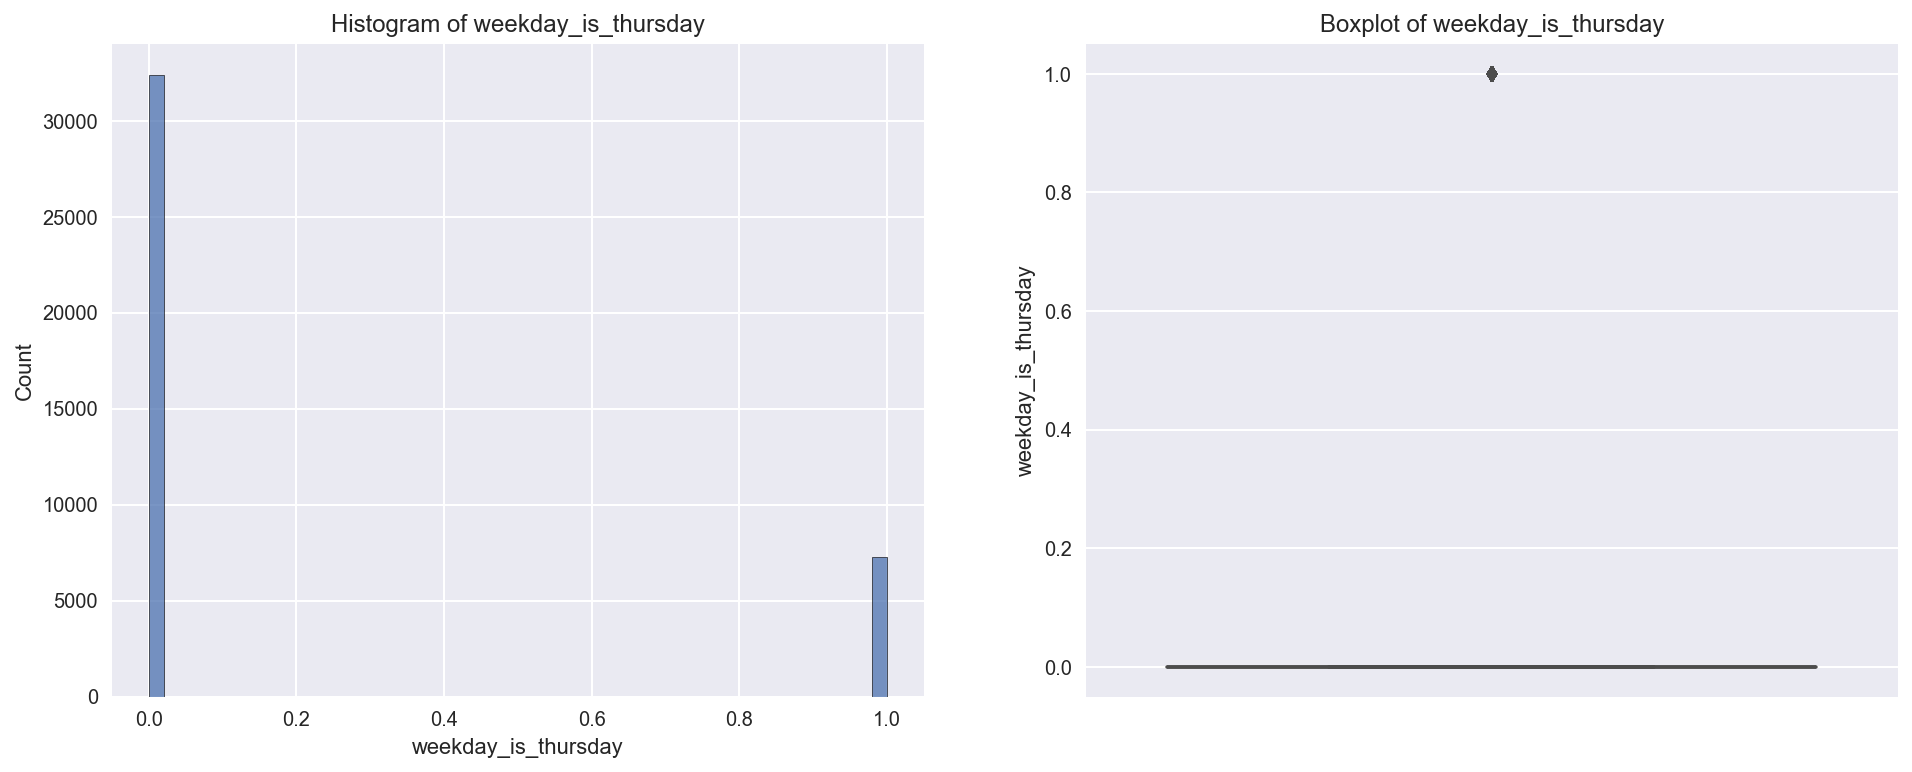

In [48]:
# 34. weekday_is_thursday: Was the article published on a Thursday?
hist_box(df, 'weekday_is_thursday')
show_statistic(df, 'weekday_is_thursday')

The weekday_is_thursday can convert to binary category.

weekday_is_friday : mean = 0.1438, var = 0.1231, std = 0.3509, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


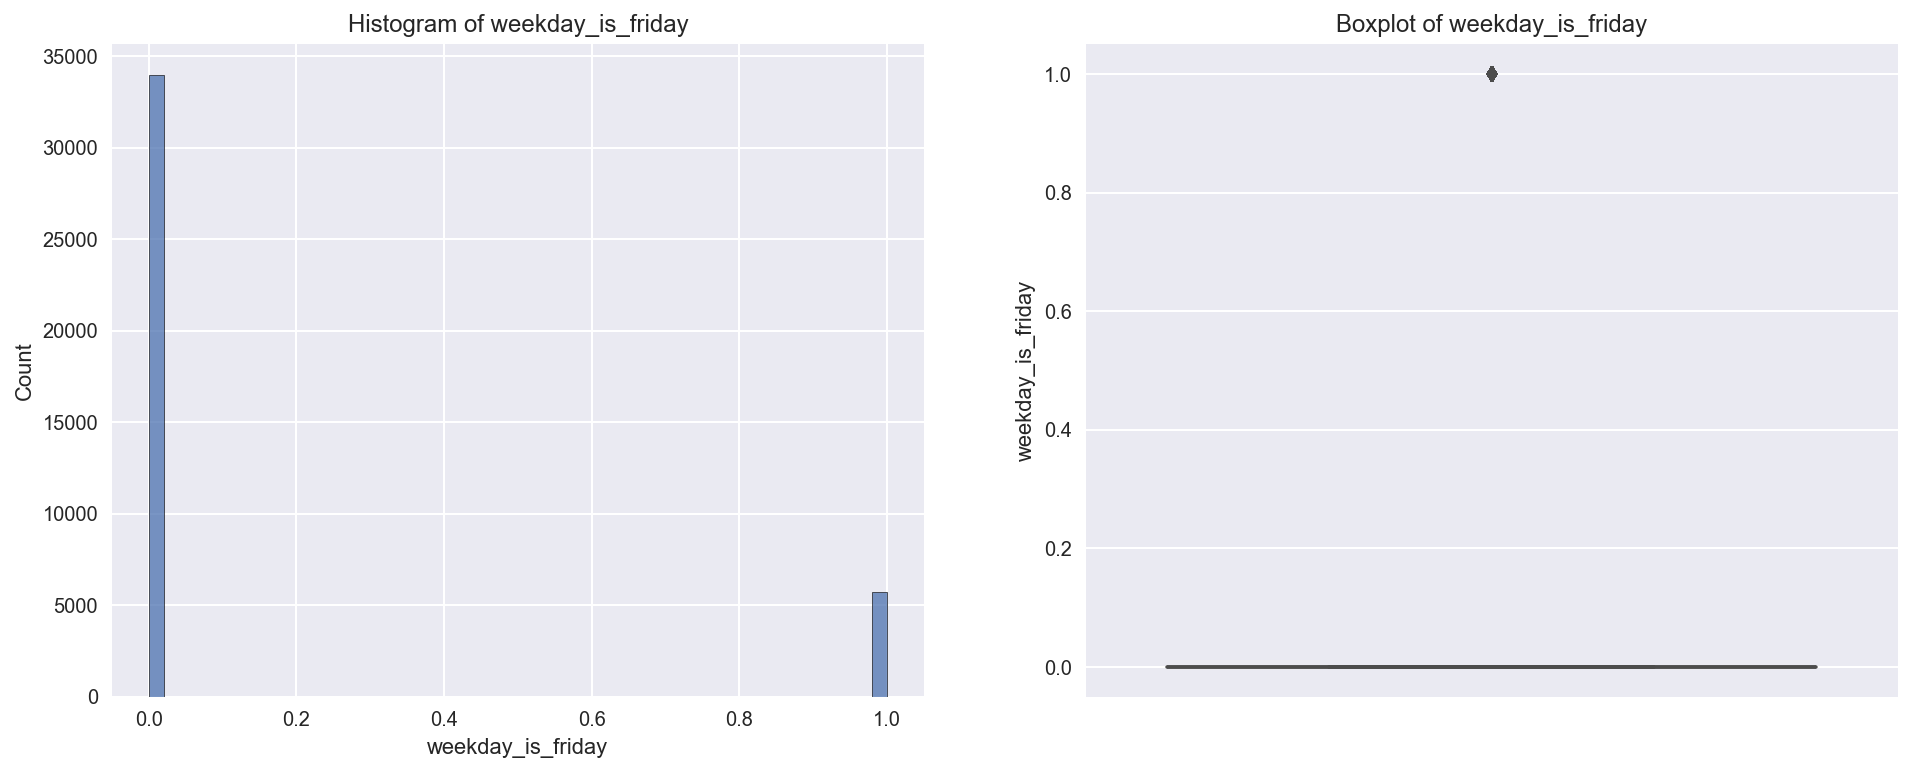

In [49]:
# 35. weekday_is_friday: Was the article published on a Friday?
hist_box(df, 'weekday_is_friday')
show_statistic(df, 'weekday_is_friday')

The weekday_is_friday can convert to binary category.

weekday_is_saturday : mean = 0.0619, var = 0.0580, std = 0.2409, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000
It has 2453 ourliers that larger than (mean + 3*std), account for 6.1876 %


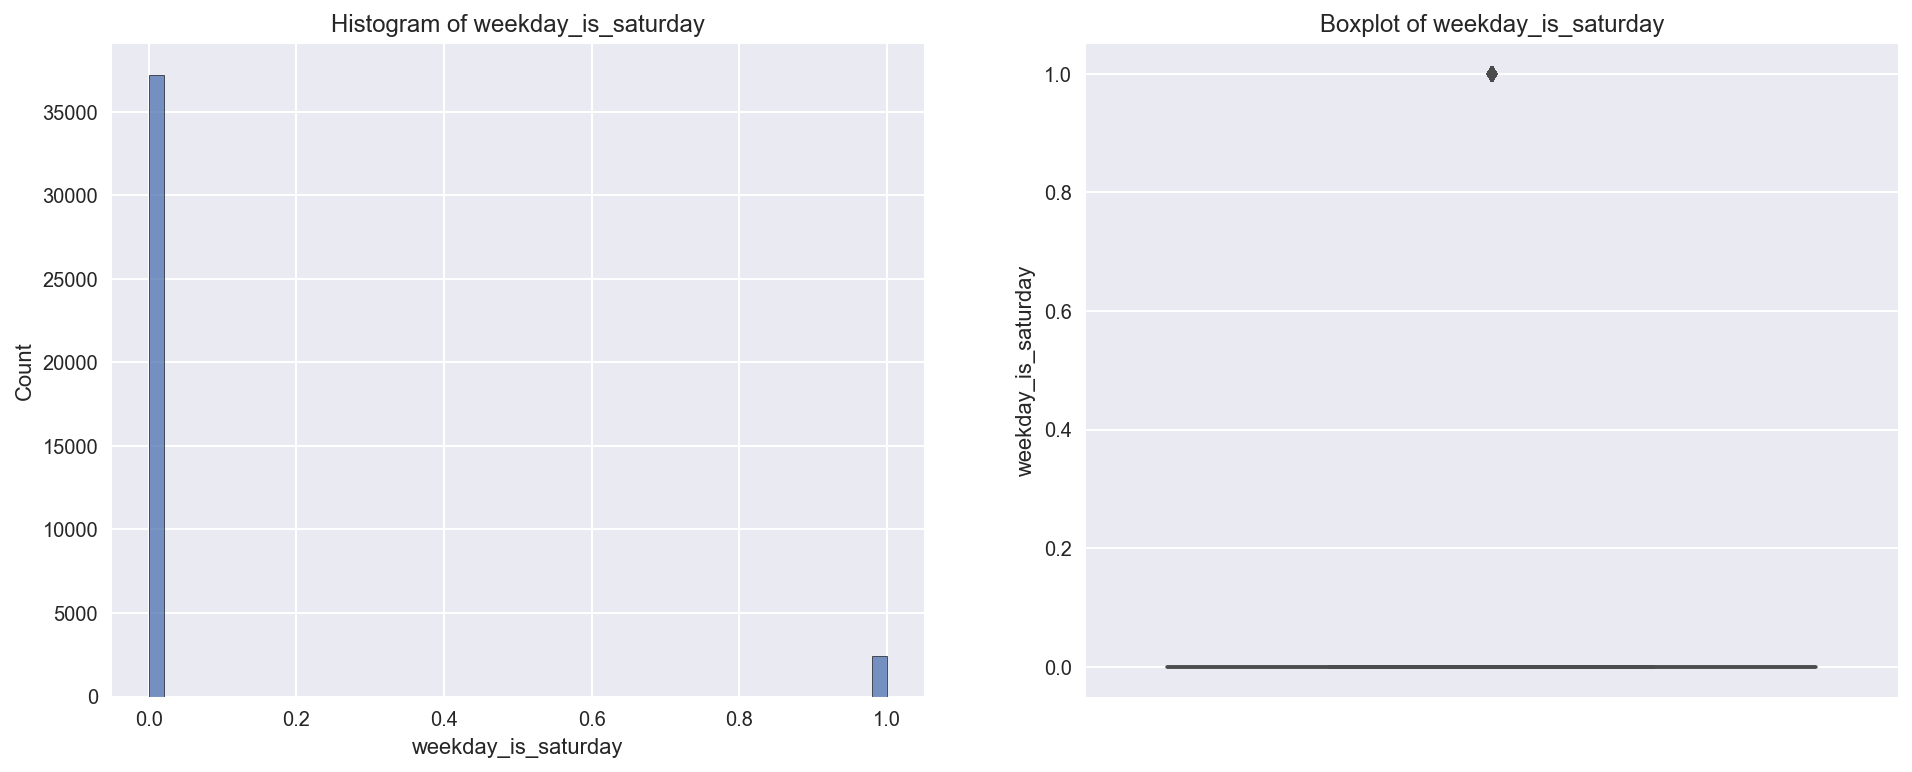

In [50]:
# 36. weekday_is_saturday: Was the article published on a Saturday?
hist_box(df, 'weekday_is_saturday')
show_statistic(df, 'weekday_is_saturday')

The weekday_is_saturday can convert to binary category.

weekday_is_sunday : mean = 0.0690, var = 0.0643, std = 0.2535, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000
It has 2737 ourliers that larger than (mean + 3*std), account for 6.9039 %


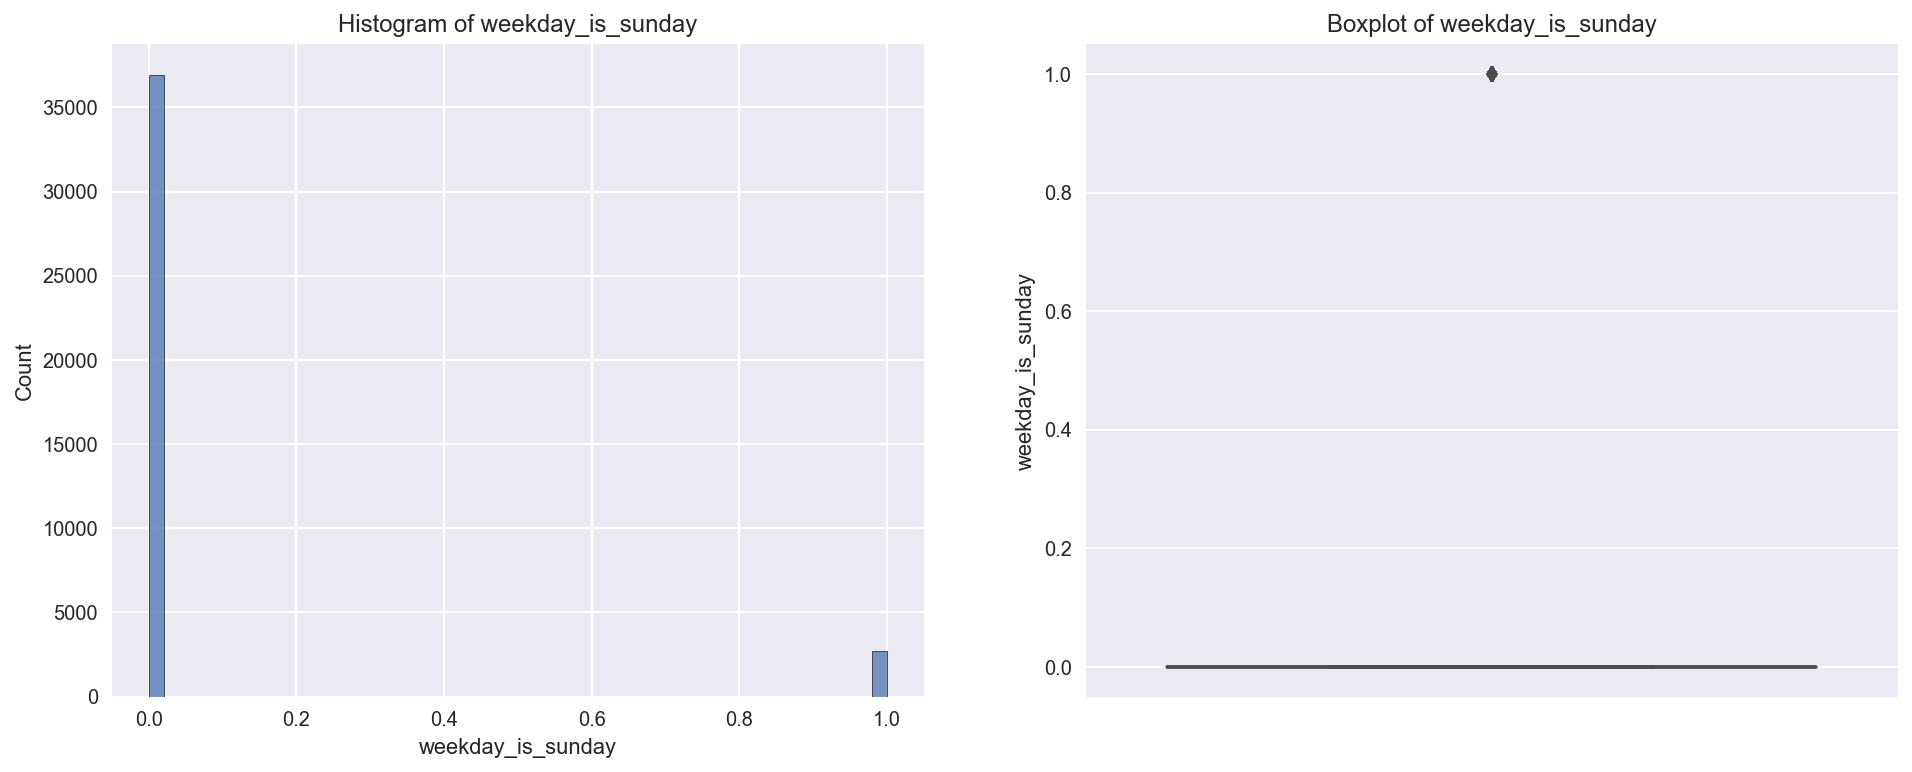

In [51]:
# 37. weekday_is_sunday: Was the article published on a Sunday? 
hist_box(df, 'weekday_is_sunday')
show_statistic(df, 'weekday_is_sunday')

The weekday_is_sunday can convert to binary category.

is_weekend : mean = 0.1309, var = 0.1138, std = 0.3373, q1(25%) = 0.0000, q3(75%) = 0.0000, min = 0.0000, max = 1.0000


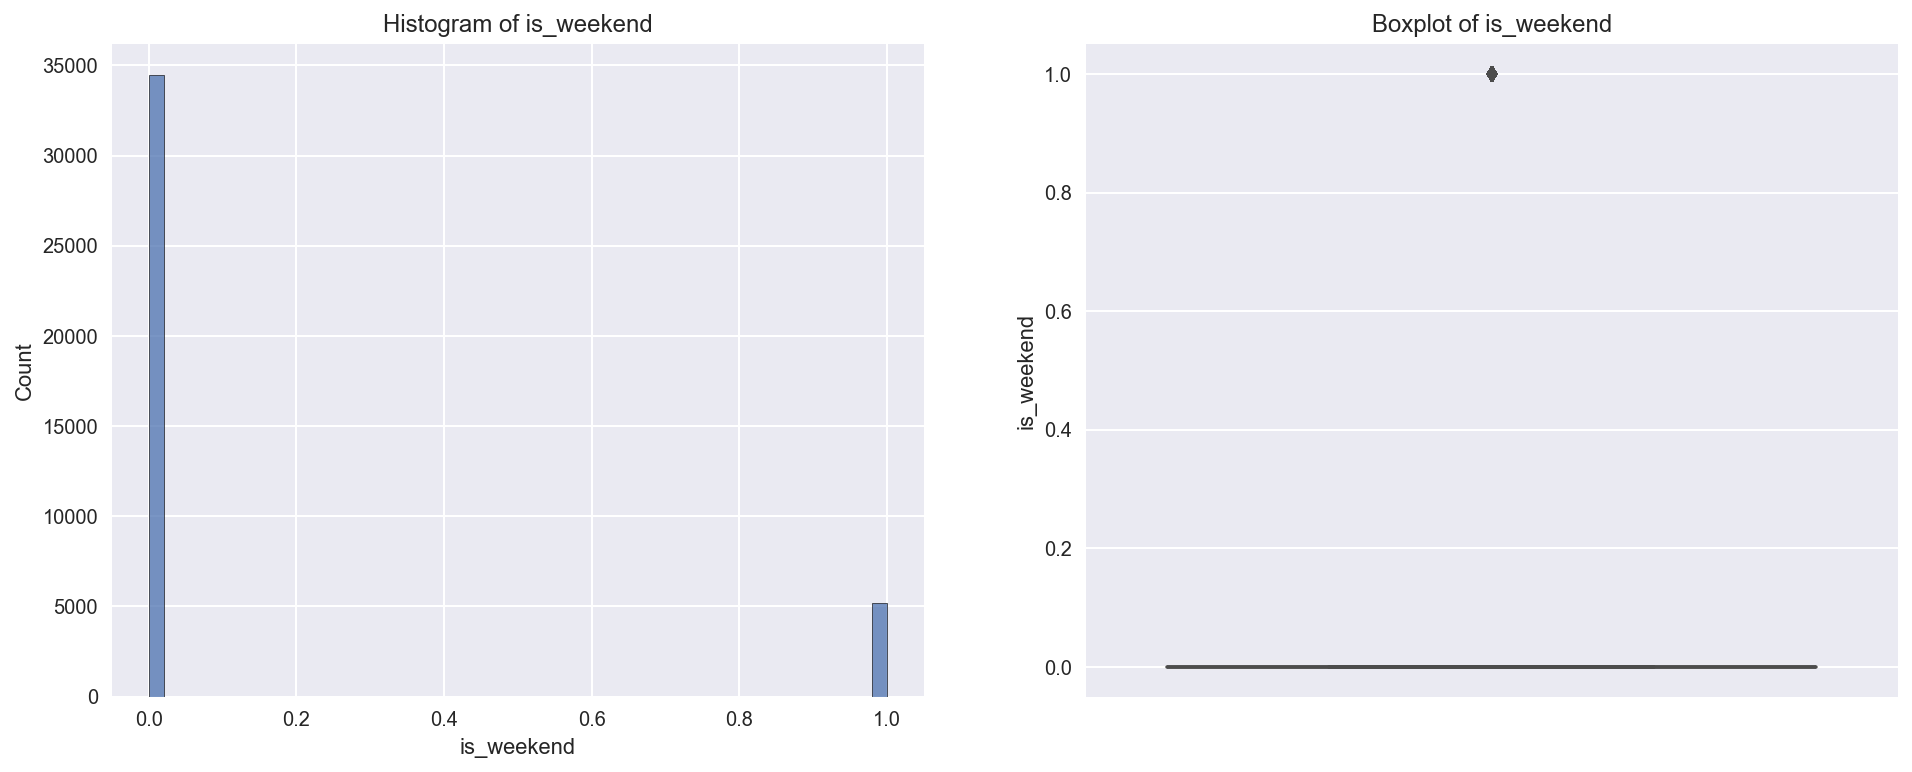

In [52]:
# 38. is_weekend: Was the article published on the weekend?
hist_box(df, 'is_weekend')
show_statistic(df, 'is_weekend')

The is_weekend can convert to binary category.

LDA_00 : mean = 0.1846, var = 0.0692, std = 0.2630, q1(25%) = 0.0251, q3(75%) = 0.2410, min = 0.0000, max = 0.9270


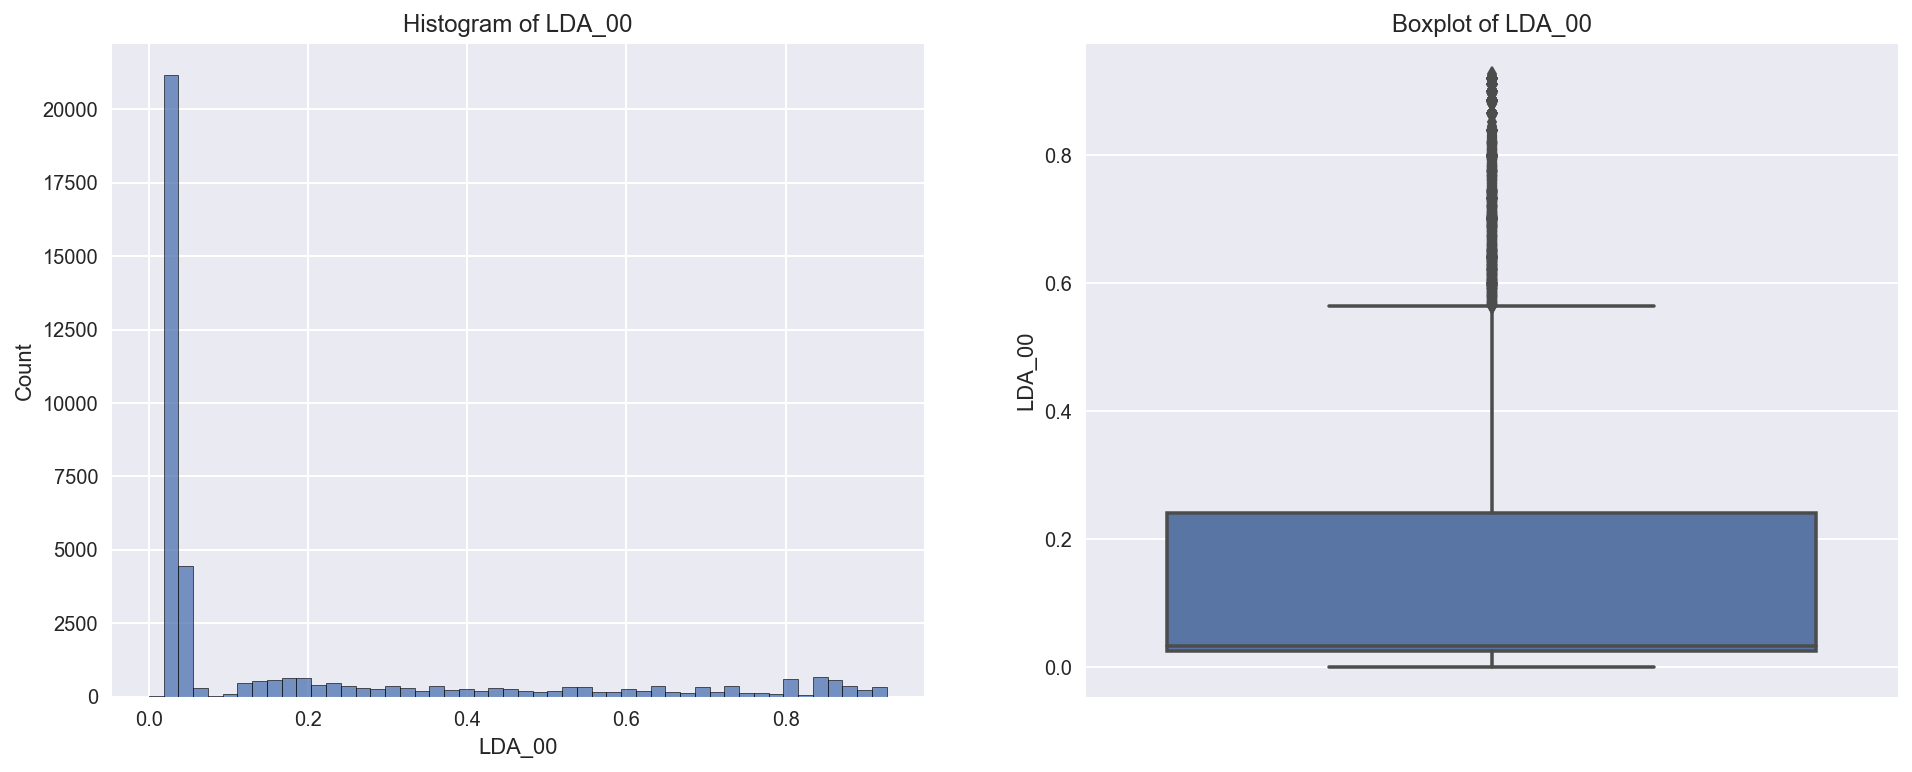

In [53]:
# 39. LDA_00: Closeness to LDA topic 0
hist_box(df, 'LDA_00')
show_statistic(df, 'LDA_00')

LDA_00 shows values concentrate near 0.0.

LDA_01 : mean = 0.1413, var = 0.0483, std = 0.2197, q1(25%) = 0.0250, q3(75%) = 0.1508, min = 0.0000, max = 0.9259
It has 1303 ourliers that larger than (mean + 3*std), account for 3.2868 %


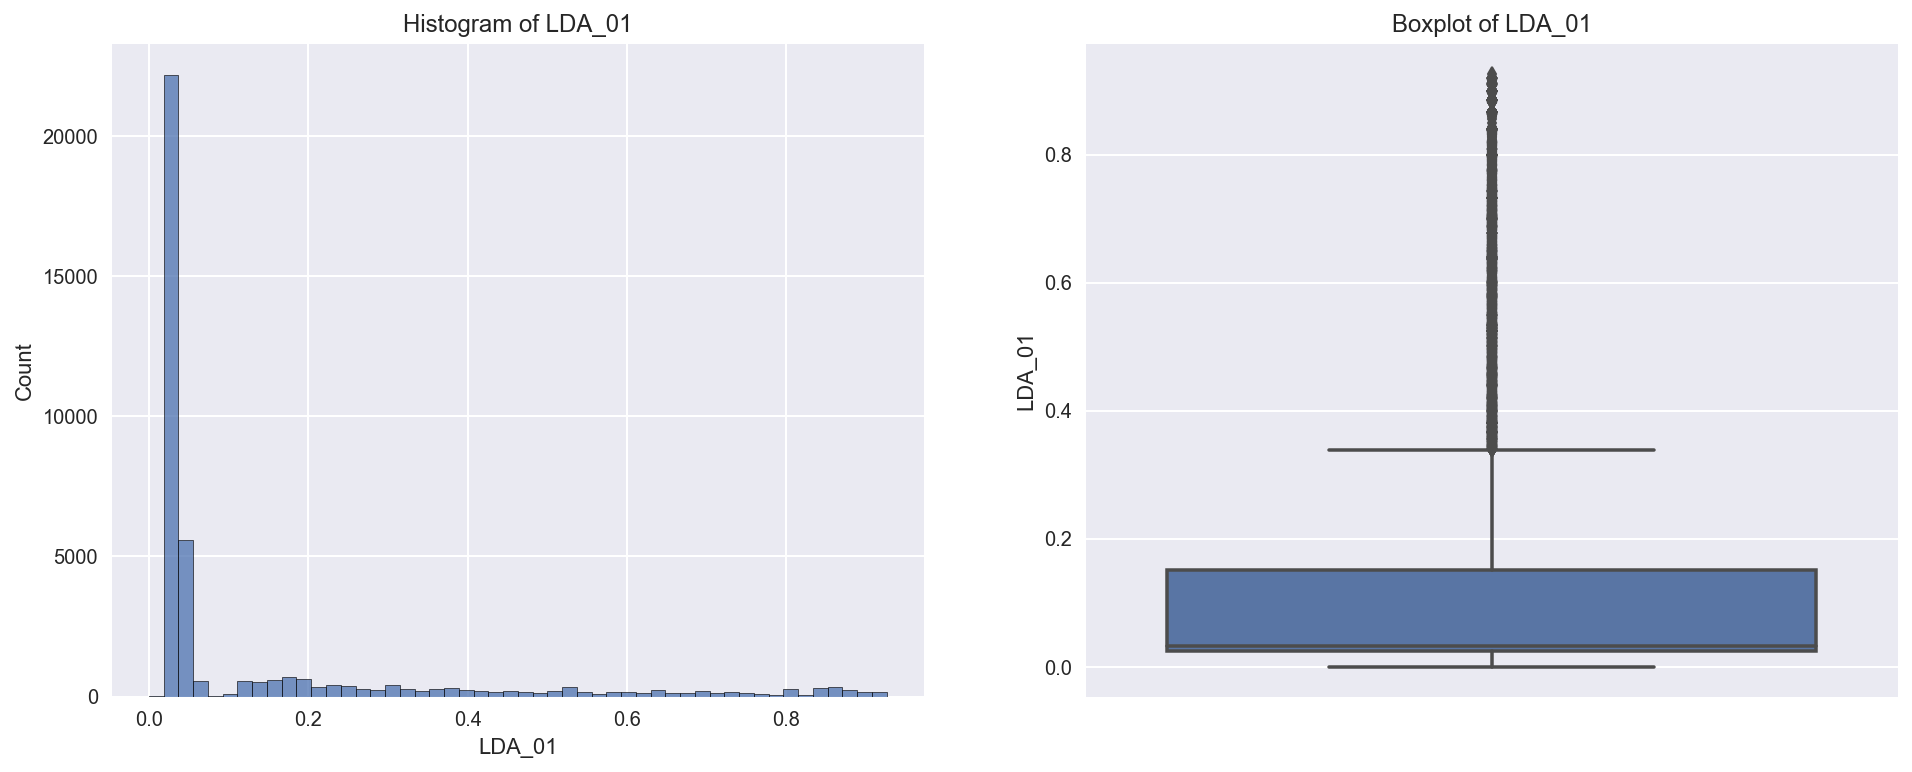

In [54]:
# 40. LDA_01: Closeness to LDA topic 1
hist_box(df, 'LDA_01')
show_statistic(df, 'LDA_01')

LDA_01 shows values concentrate near 0.0. It has 3.2868 % outliers

LDA_02 : mean = 0.2163, var = 0.0796, std = 0.2821, q1(25%) = 0.0286, q3(75%) = 0.3342, min = 0.0000, max = 0.9200


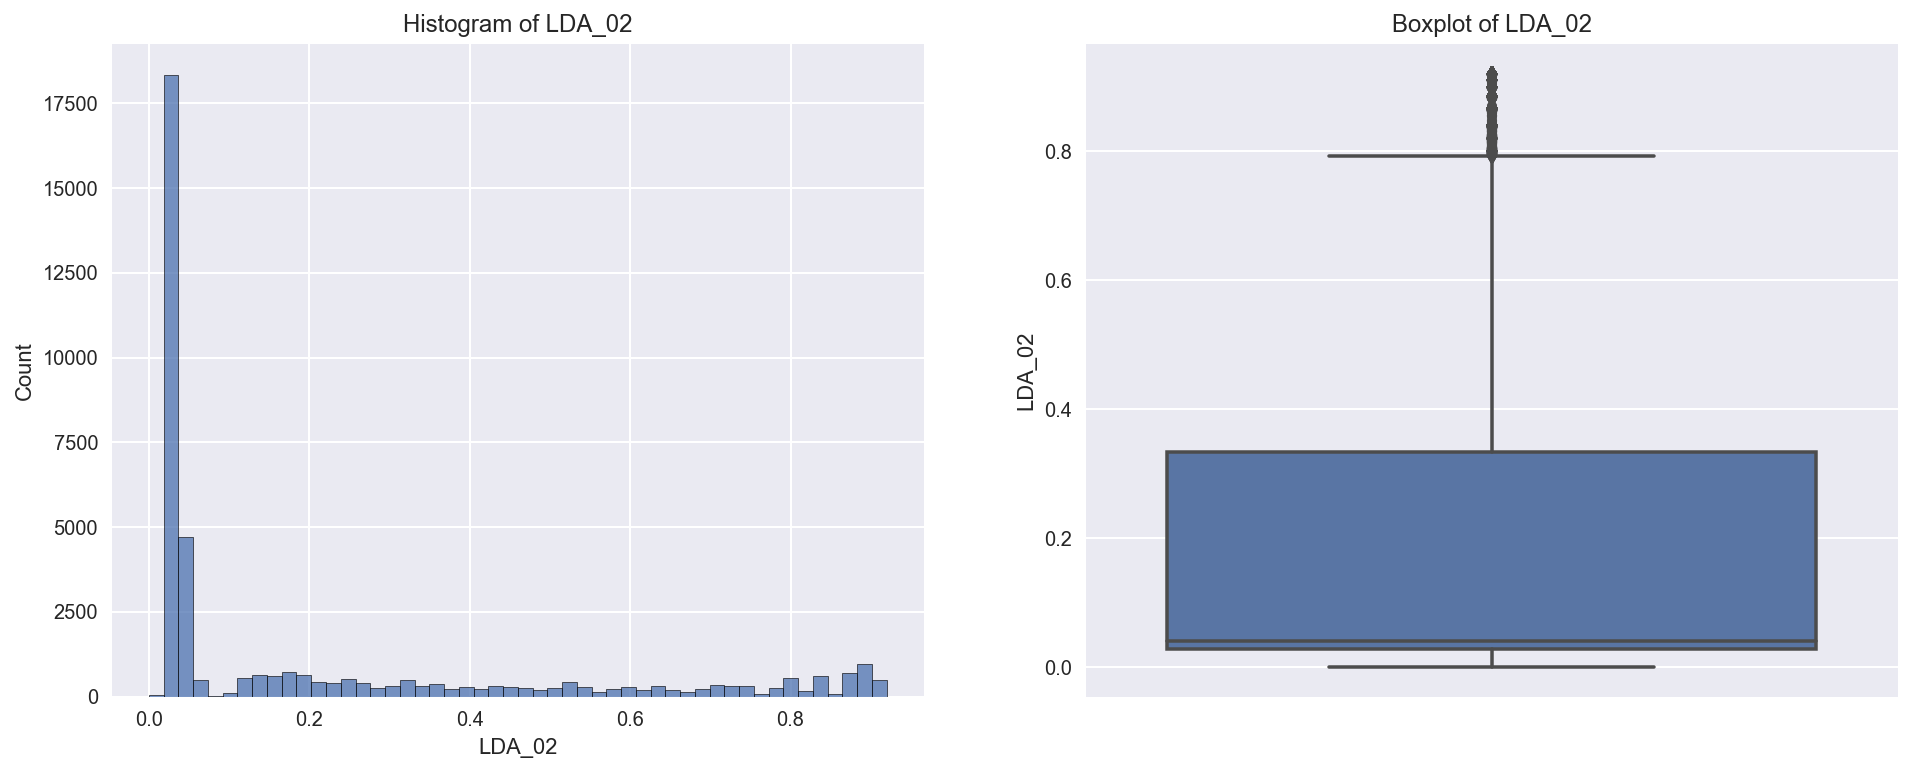

In [55]:
# 41. LDA_02: Closeness to LDA topic 2
hist_box(df, 'LDA_02')
show_statistic(df, 'LDA_02')

LDA_02 shows values concentrate near 0.0.

LDA_03 : mean = 0.2238, var = 0.0871, std = 0.2952, q1(25%) = 0.0286, q3(75%) = 0.3758, min = 0.0000, max = 0.9265


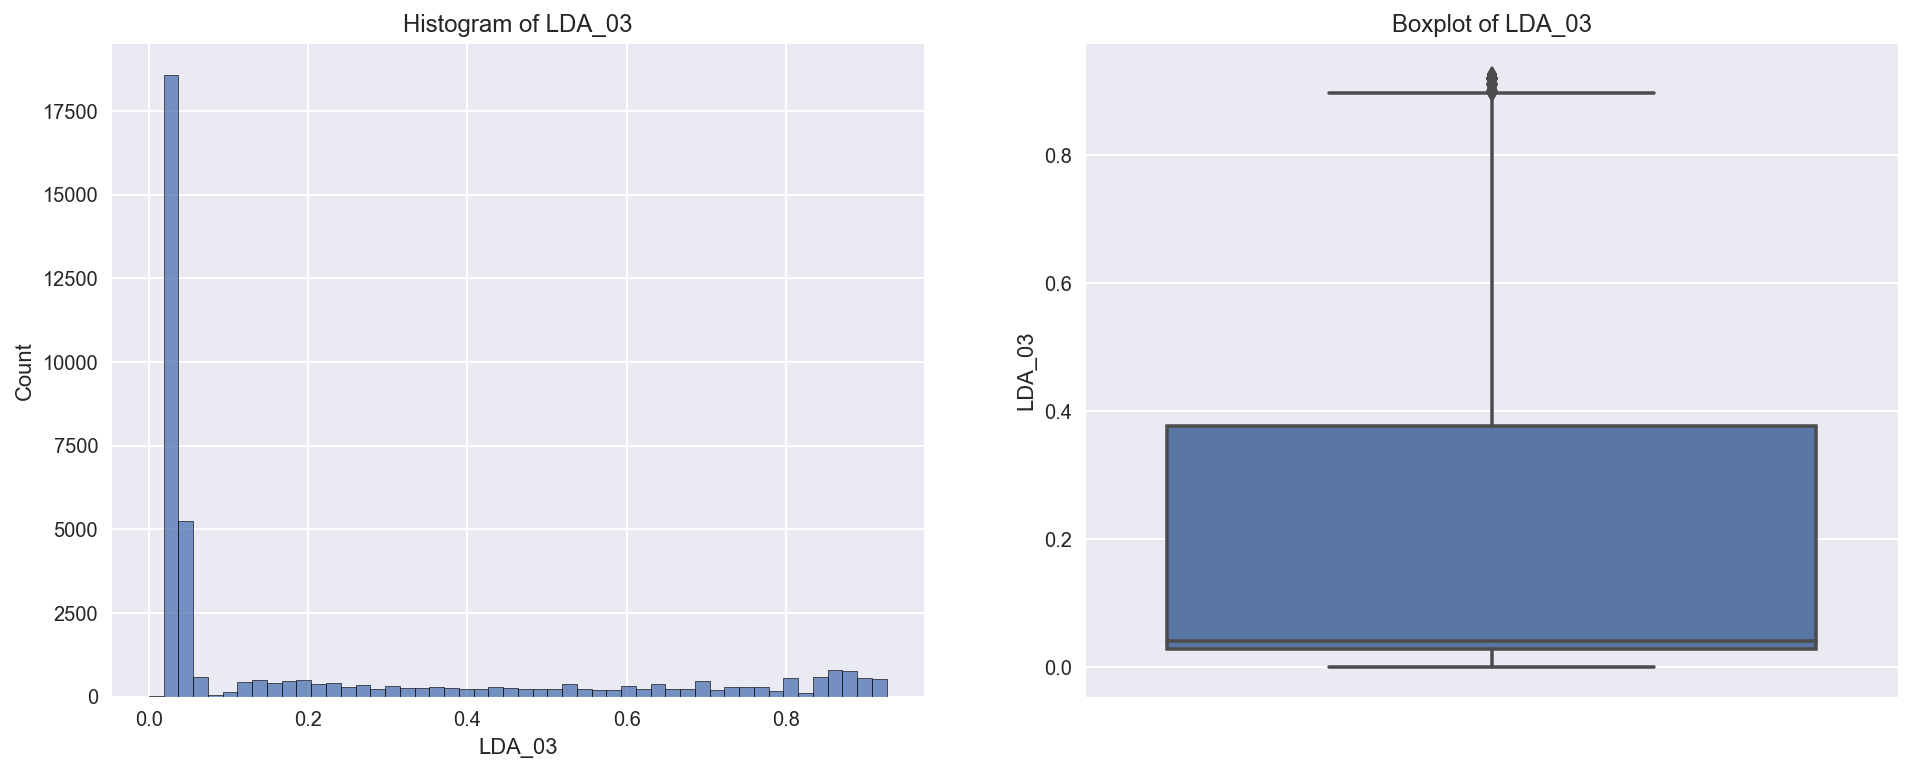

In [56]:
# 42. LDA_03: Closeness to LDA topic 3
hist_box(df, 'LDA_03')
show_statistic(df, 'LDA_03')

LDA_03 shows values concentrate near 0.0.

LDA_04 : mean = 0.2340, var = 0.0836, std = 0.2892, q1(25%) = 0.0286, q3(75%) = 0.4000, min = 0.0000, max = 0.9272


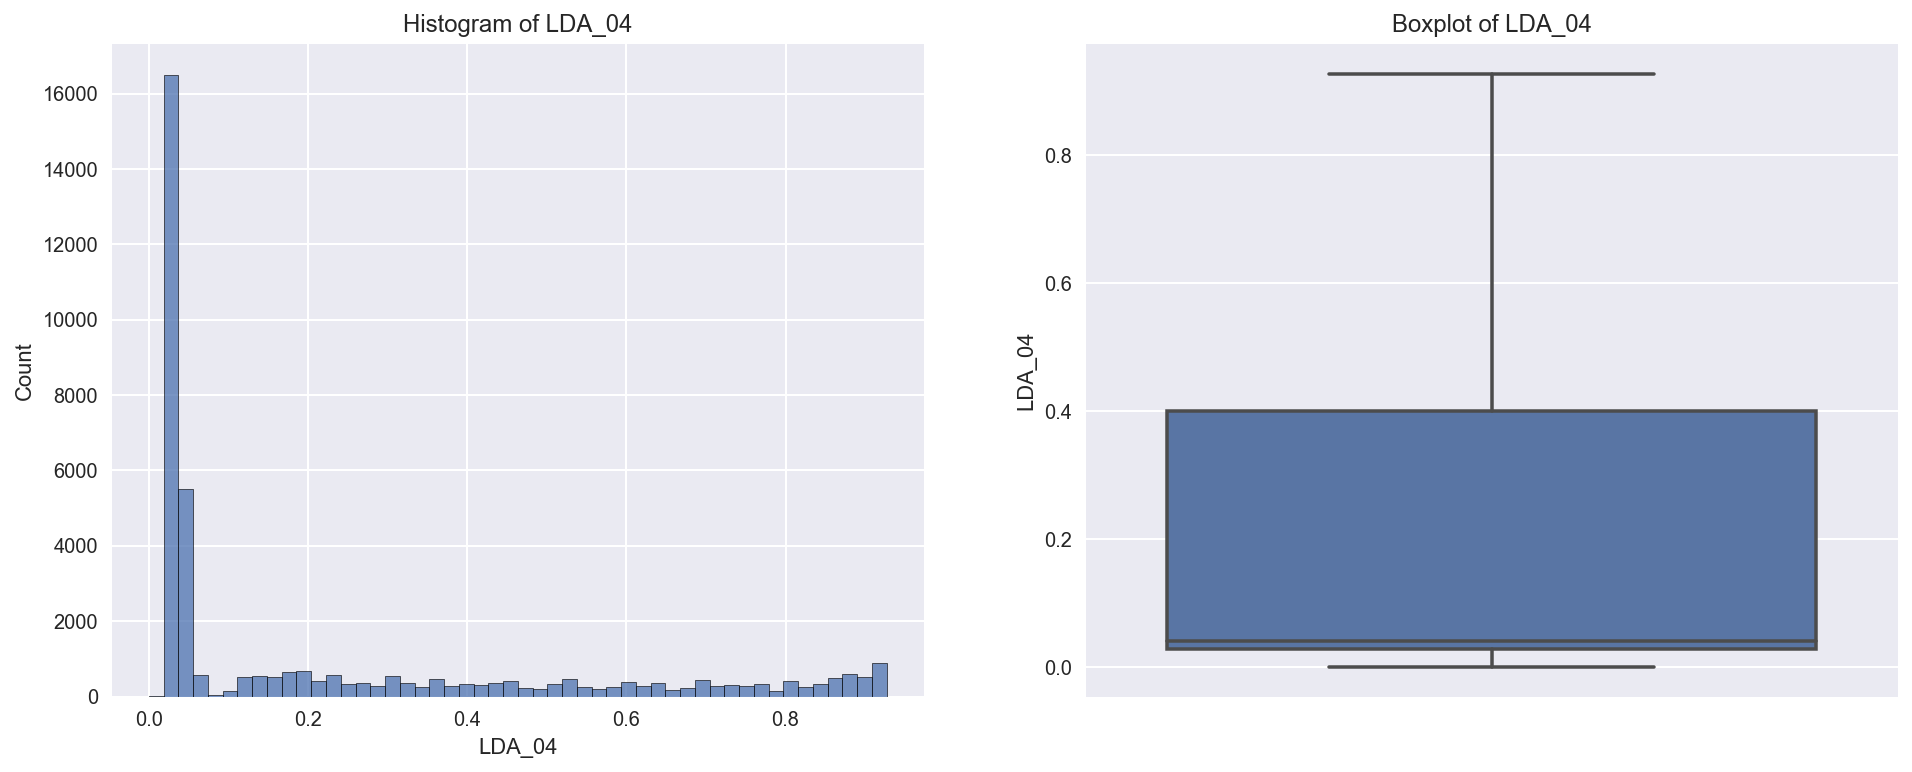

In [57]:
# 43. LDA_04: Closeness to LDA topic 4
hist_box(df, 'LDA_04')
show_statistic(df, 'LDA_04')

LDA_04 shows values concentrate near 0.0.

global_subjectivity : mean = 0.4434, var = 0.0136, std = 0.1167, q1(25%) = 0.3962, q3(75%) = 0.5083, min = 0.0000, max = 1.0000
It has 1240 ourliers that larger than (mean + 3*std), account for 3.1278 %


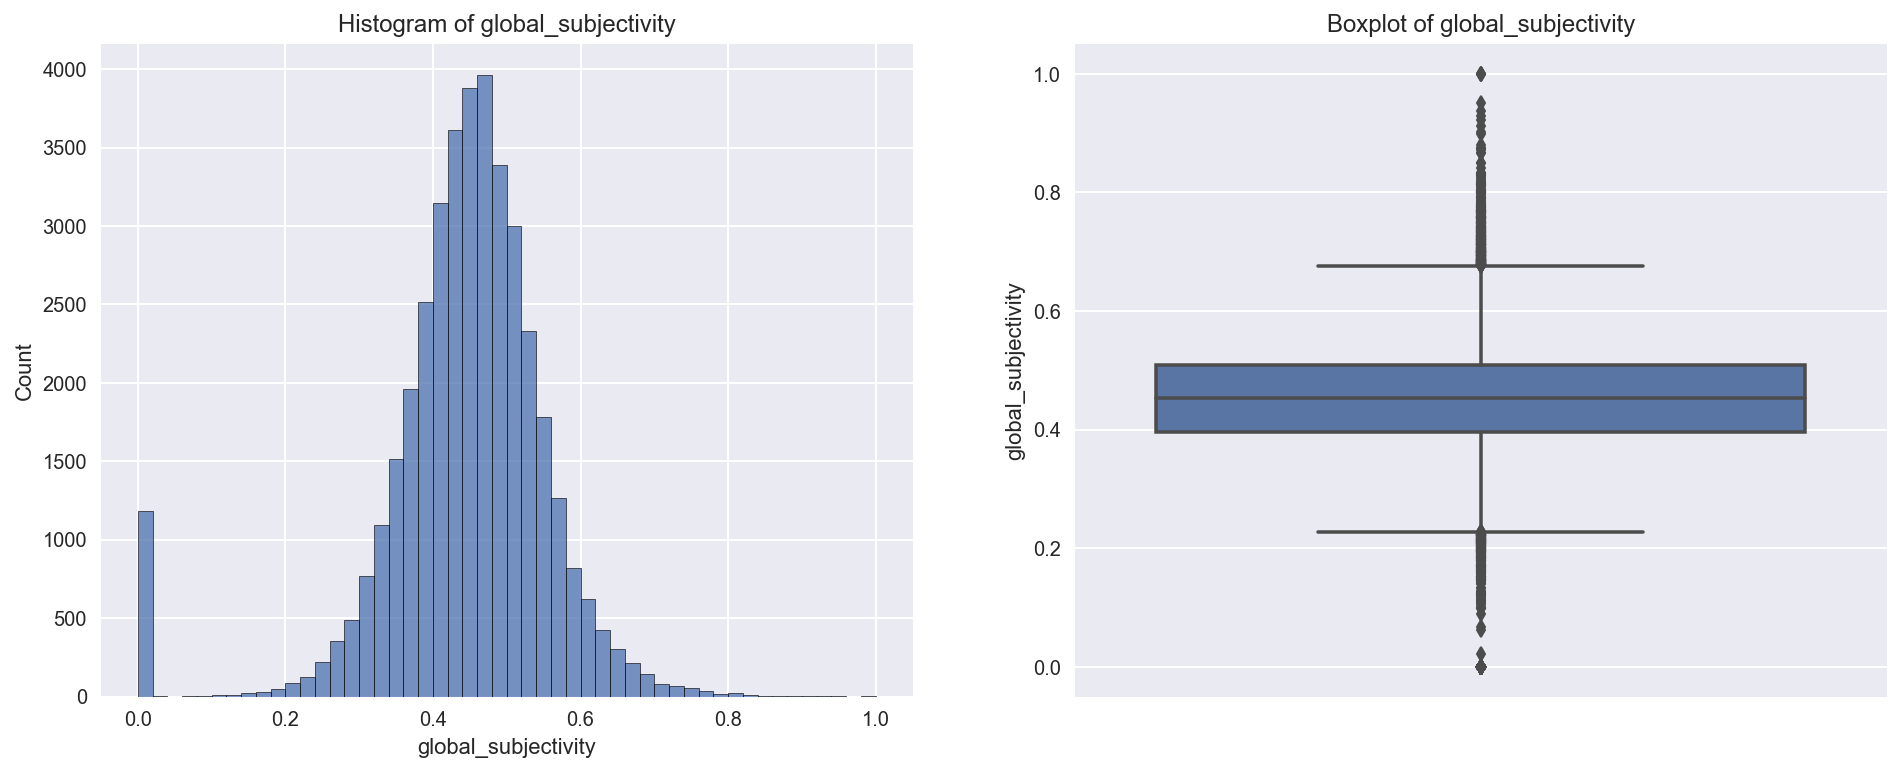

In [58]:
# 44. global_subjectivity: Text subjectivity
hist_box(df, 'global_subjectivity')
show_statistic(df, 'global_subjectivity')

The global_subjectivity shows normal distribution. I has 3.1278 % outliers that are on both sides.

global_sentiment_polarity : mean = 0.1193, var = 0.0094, std = 0.0969, q1(25%) = 0.0578, q3(75%) = 0.1778, min = -0.3937, max = 0.7278
It has 392 ourliers that larger than (mean + 3*std), account for 0.9888 %


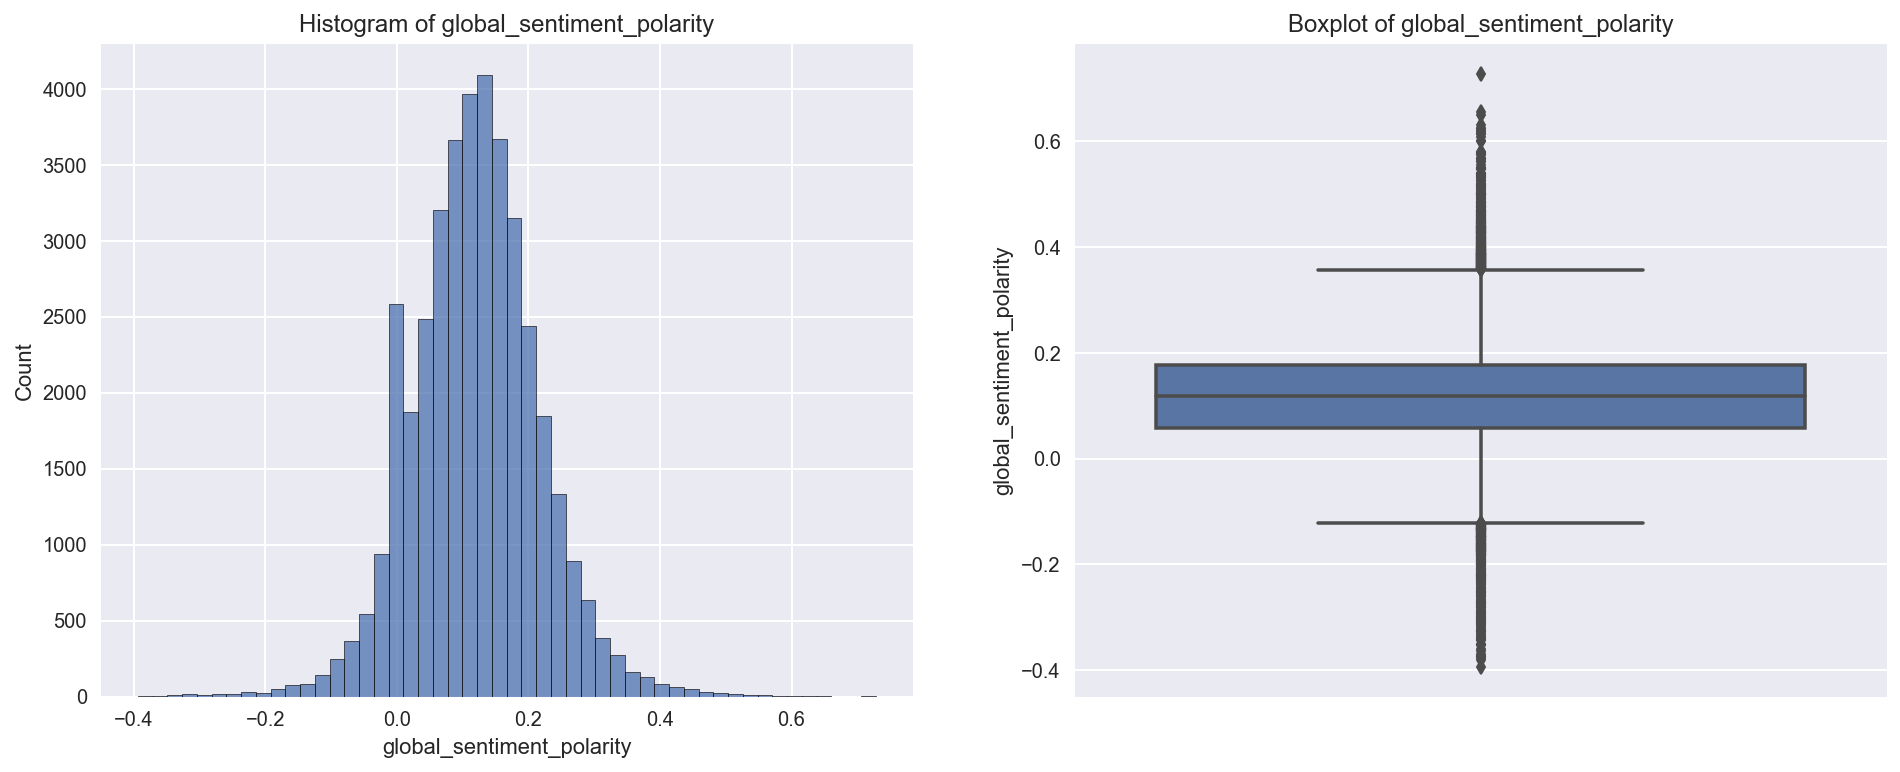

In [59]:
# 45. global_sentiment_polarity: Text sentiment polarity
hist_box(df, 'global_sentiment_polarity')
show_statistic(df, 'global_sentiment_polarity')

The global_sentiment_polarity shows normal distribution. It has 0.9888 % outliers that are on both sides.

global_rate_positive_words : mean = 0.0396, var = 0.0003, std = 0.0174, q1(25%) = 0.0284, q3(75%) = 0.0503, min = 0.0000, max = 0.1555
It has 237 ourliers that larger than (mean + 3*std), account for 0.5978 %


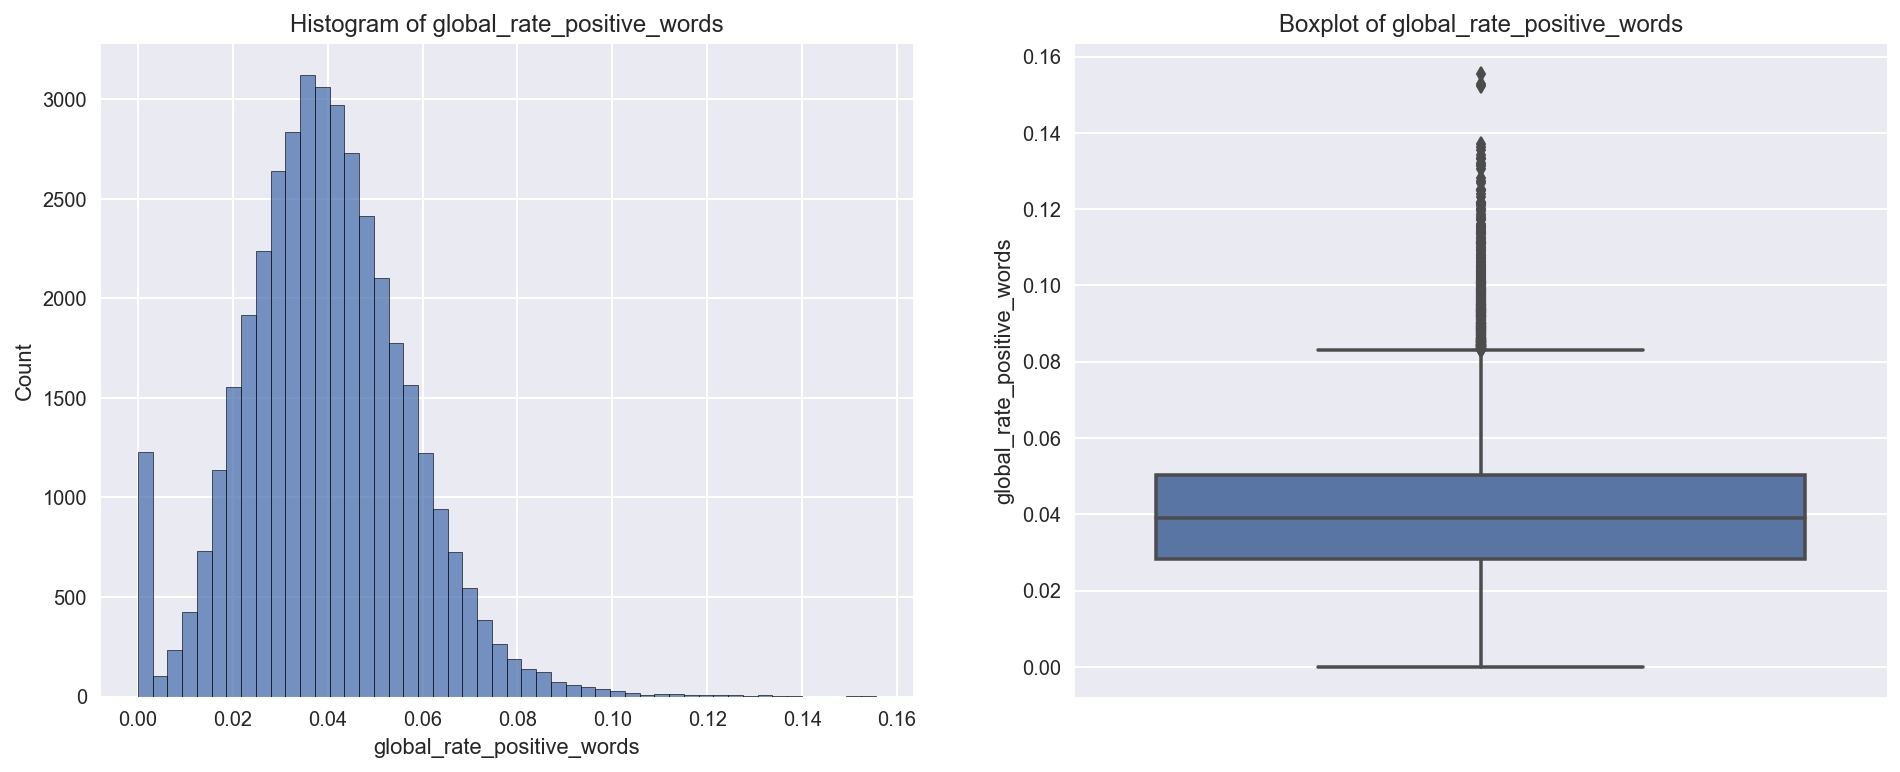

In [60]:
# 46. global_rate_positive_words: Rate of positive words in the content
hist_box(df, 'global_rate_positive_words')
show_statistic(df, 'global_rate_positive_words')

The global_sentiment_polarity shows the normal distribution. It has 0.5978 % outliers. Some data concentrate near 0. We should pay attention to them.

global_rate_negative_words : mean = 0.0166, var = 0.0001, std = 0.0108, q1(25%) = 0.0096, q3(75%) = 0.0217, min = 0.0000, max = 0.1849
It has 548 ourliers that larger than (mean + 3*std), account for 1.3823 %


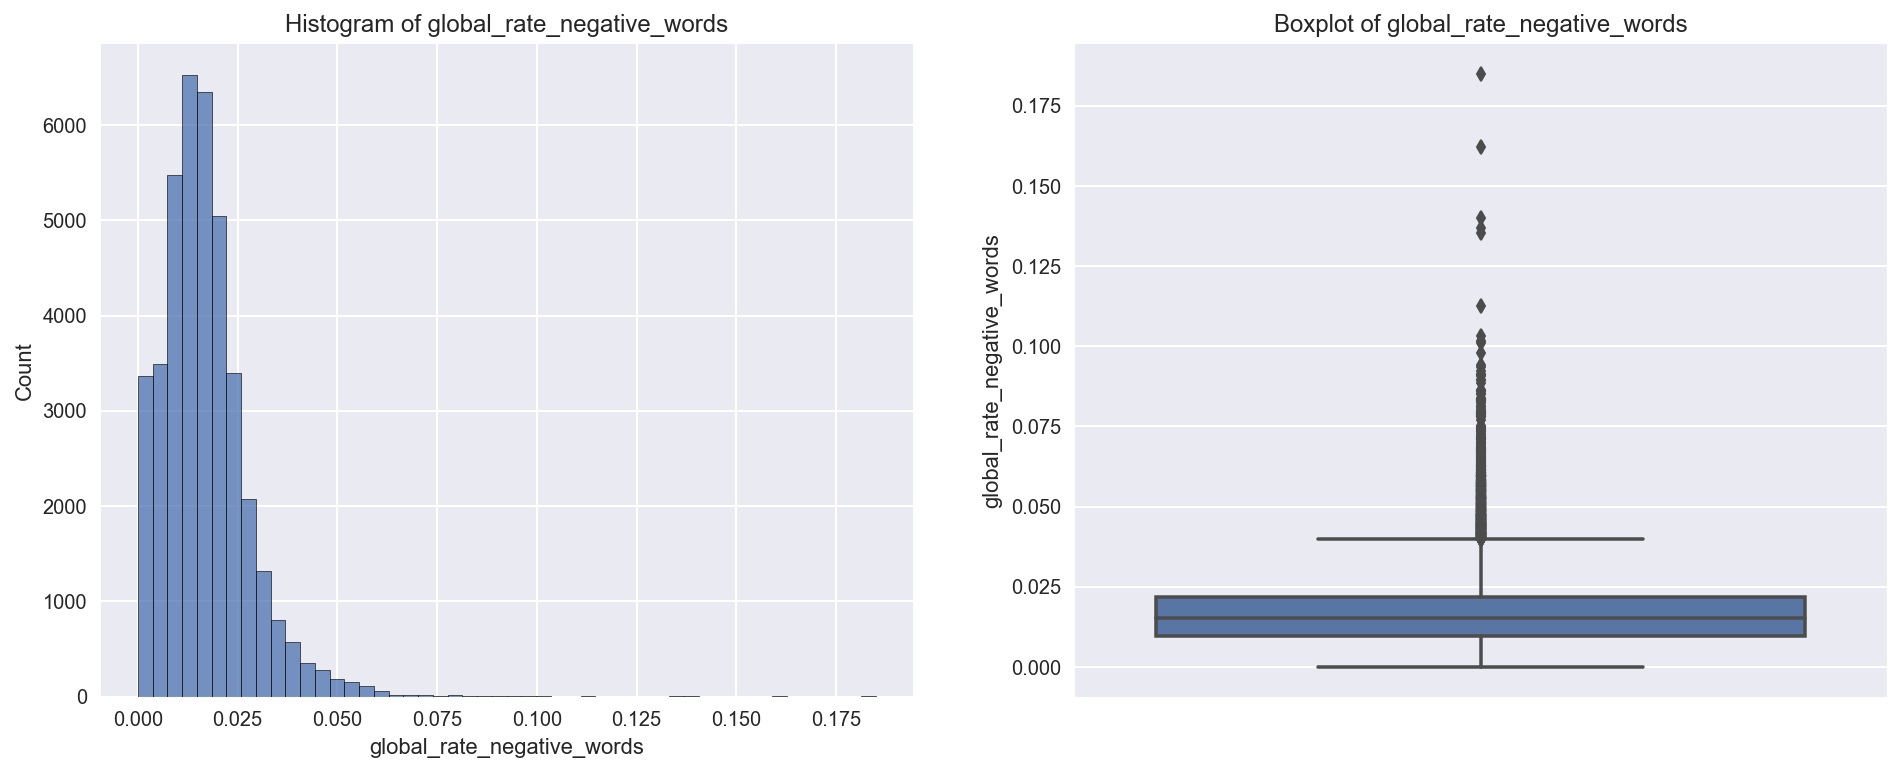

In [61]:
# 47. global_rate_negative_words: Rate of negative words in the content
hist_box(df, 'global_rate_negative_words')
show_statistic(df, 'global_rate_negative_words')

The global_rate_negative_words shows the right-skewed distribution. It has 1.3823 % outliers.

rate_positive_words : mean = 0.6822, var = 0.0362, std = 0.1902, q1(25%) = 0.6000, q3(75%) = 0.8000, min = 0.0000, max = 1.0000
It has 1241 ourliers that larger than (mean + 3*std), account for 3.1304 %


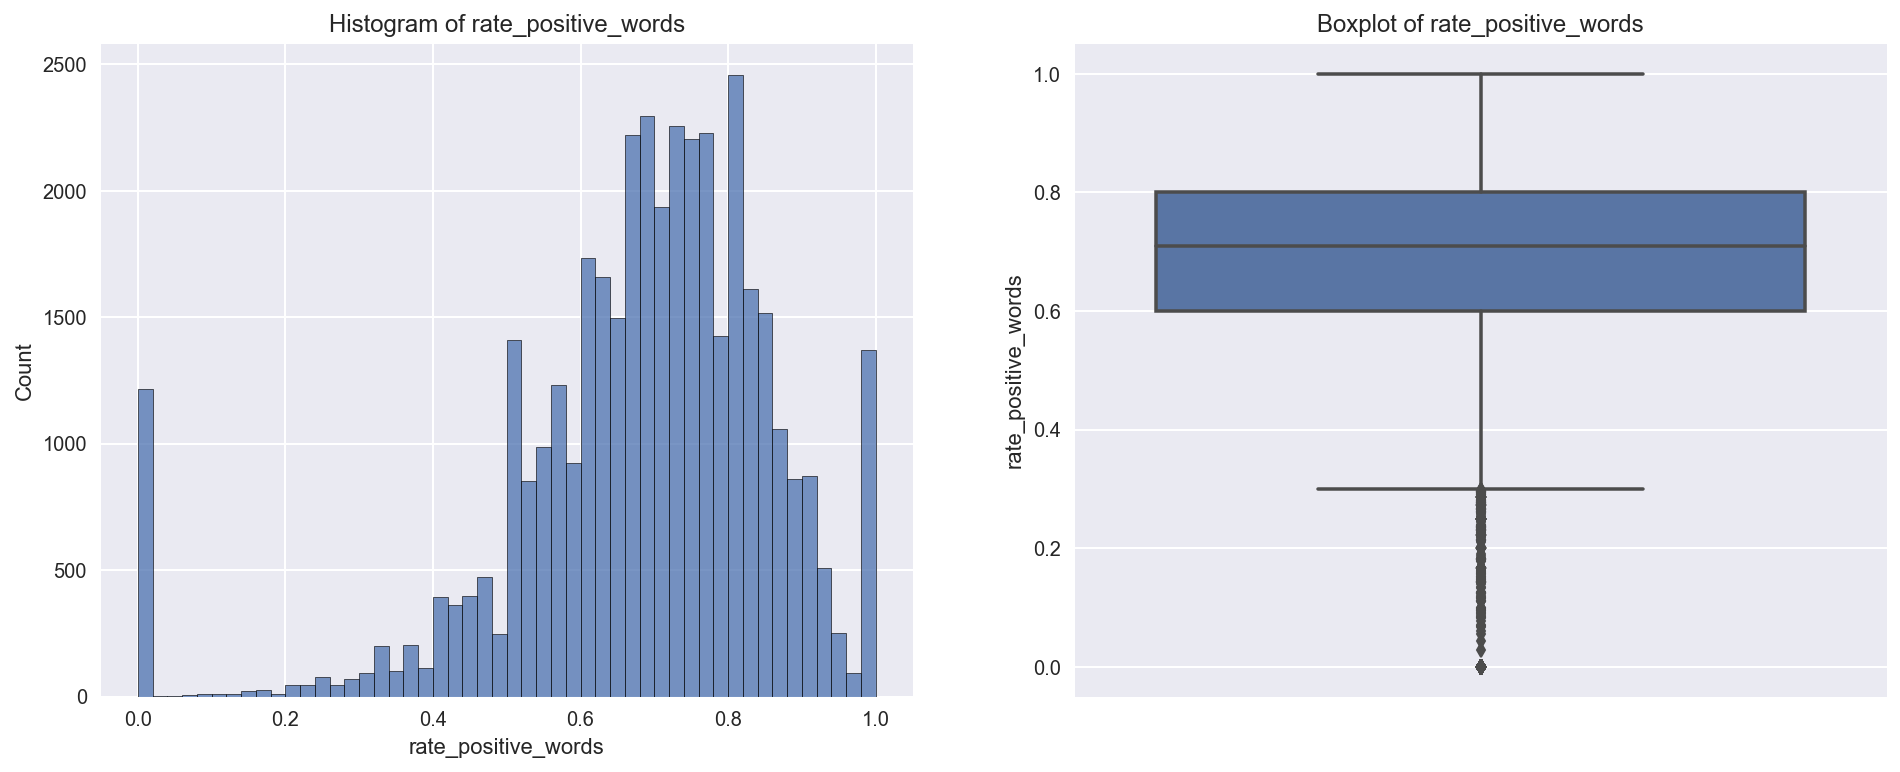

In [62]:
# 48. rate_positive_words: Rate of positive words among non-neutral tokens
hist_box(df, 'rate_positive_words')
show_statistic(df, 'rate_positive_words')

The rate_positive_words shows the left-skewed distribution. It has 3.1304 % outliers.

rate_negative_words : mean = 0.2879, var = 0.0244, std = 0.1562, q1(25%) = 0.1852, q3(75%) = 0.3846, min = 0.0000, max = 1.0000
It has 218 ourliers that larger than (mean + 3*std), account for 0.5499 %


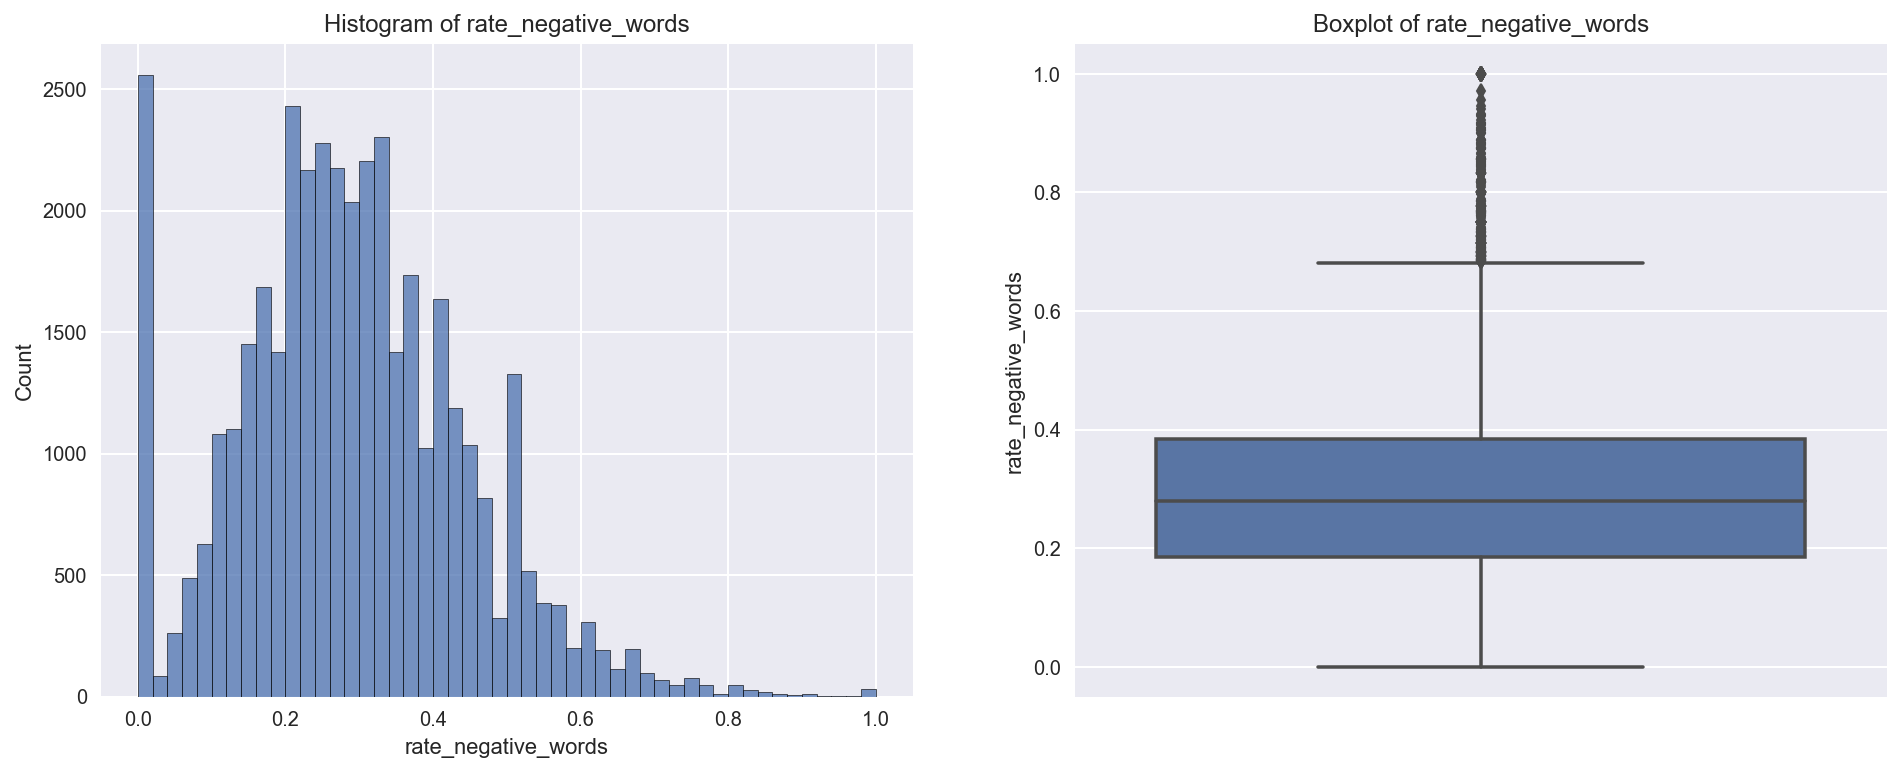

In [63]:
# 49. rate_negative_words: Rate of negative words among non-neutral tokens
hist_box(df, 'rate_negative_words')
show_statistic(df, 'rate_negative_words')

The rate_negative_words shows the normal distribution. It has 0.5499 % outliers. Some data concentrate near 0.

avg_positive_polarity : mean = 0.3538, var = 0.0109, std = 0.1045, q1(25%) = 0.3062, q3(75%) = 0.4114, min = 0.0000, max = 1.0000
It has 1374 ourliers that larger than (mean + 3*std), account for 3.4658 %


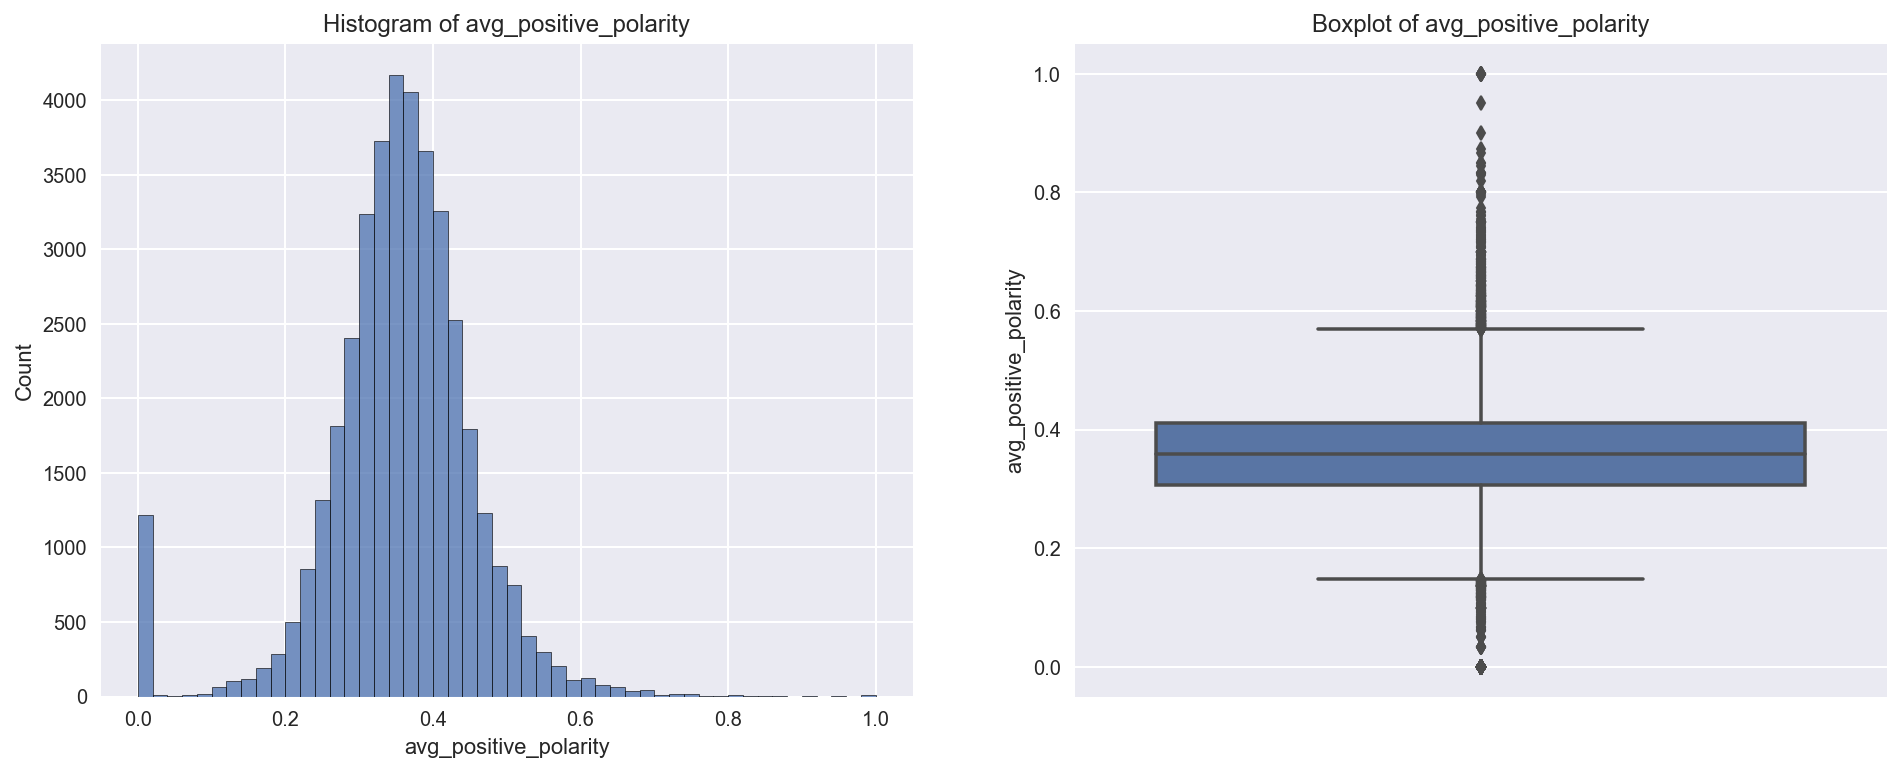

In [64]:
# 50. avg_positive_polarity: Avg. polarity of positive words
hist_box(df, 'avg_positive_polarity')
show_statistic(df, 'avg_positive_polarity')

The avg_positive_polarity shows the normal distribution. It has 3.4658 % outliers. Some data concentrate near 0.

min_positive_polarity : mean = 0.0954, var = 0.0051, std = 0.0713, q1(25%) = 0.0500, q3(75%) = 0.1000, min = 0.0000, max = 1.0000
It has 751 ourliers that larger than (mean + 3*std), account for 1.8944 %


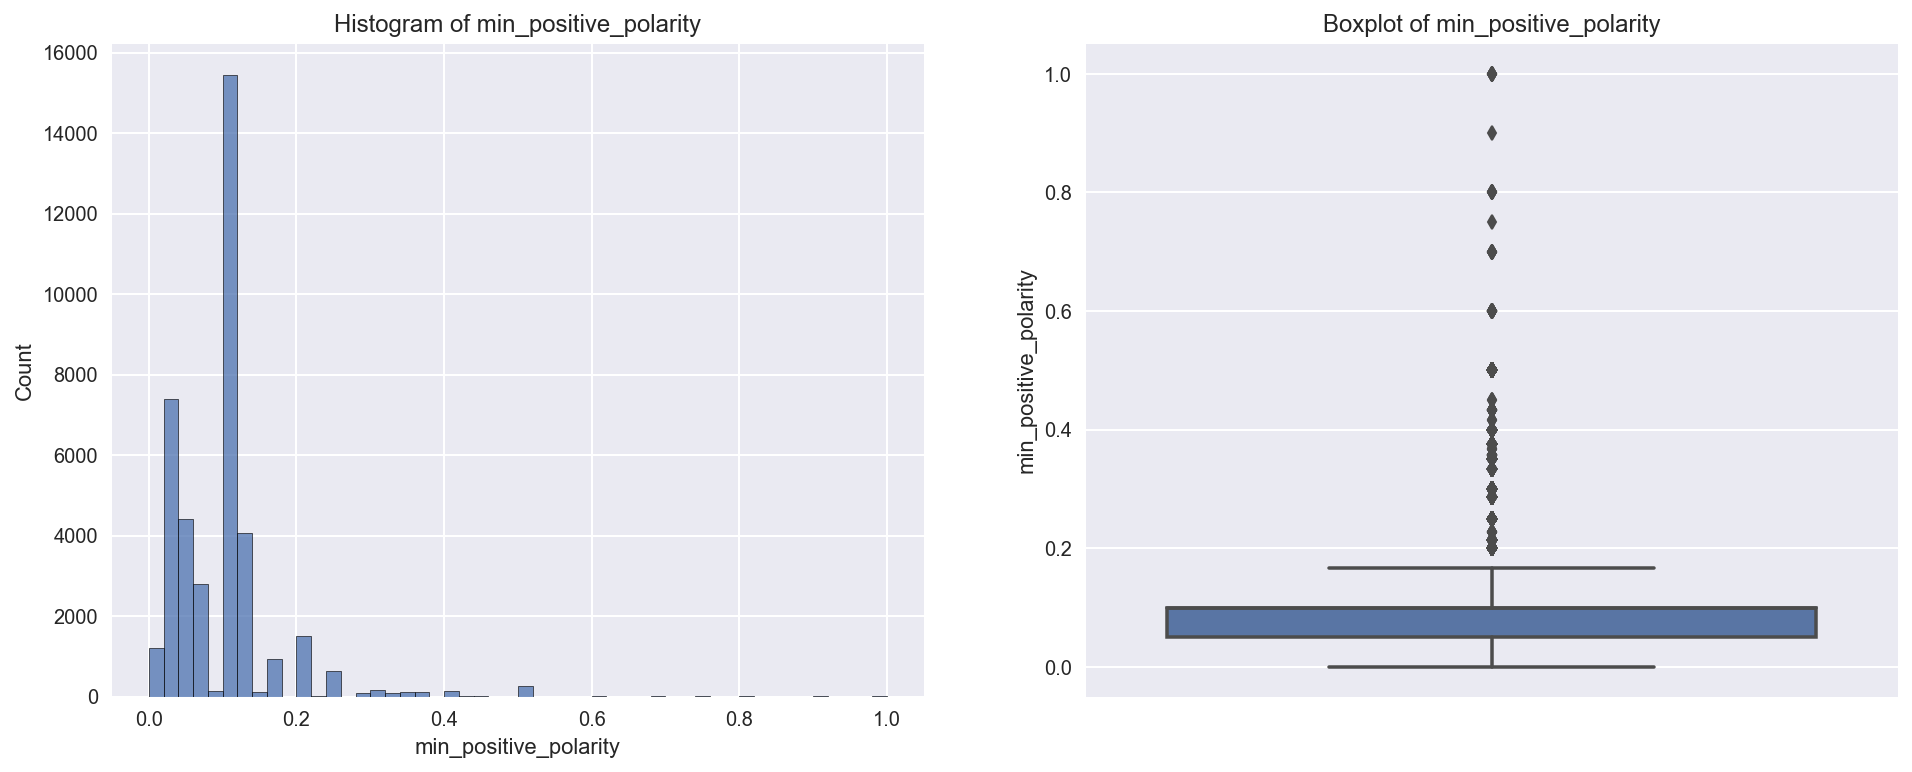

In [65]:
# 51. min_positive_polarity: Min. polarity of positive words
hist_box(df, 'min_positive_polarity')
show_statistic(df, 'min_positive_polarity')

The min_positive_polarity shows Non-symmetric bimodal distribution. It has 1.8944 % outliers.

max_positive_polarity : mean = 0.7567, var = 0.0614, std = 0.2478, q1(25%) = 0.6000, q3(75%) = 1.0000, min = 0.0000, max = 1.0000
It has 1217 ourliers that larger than (mean + 3*std), account for 3.0698 %


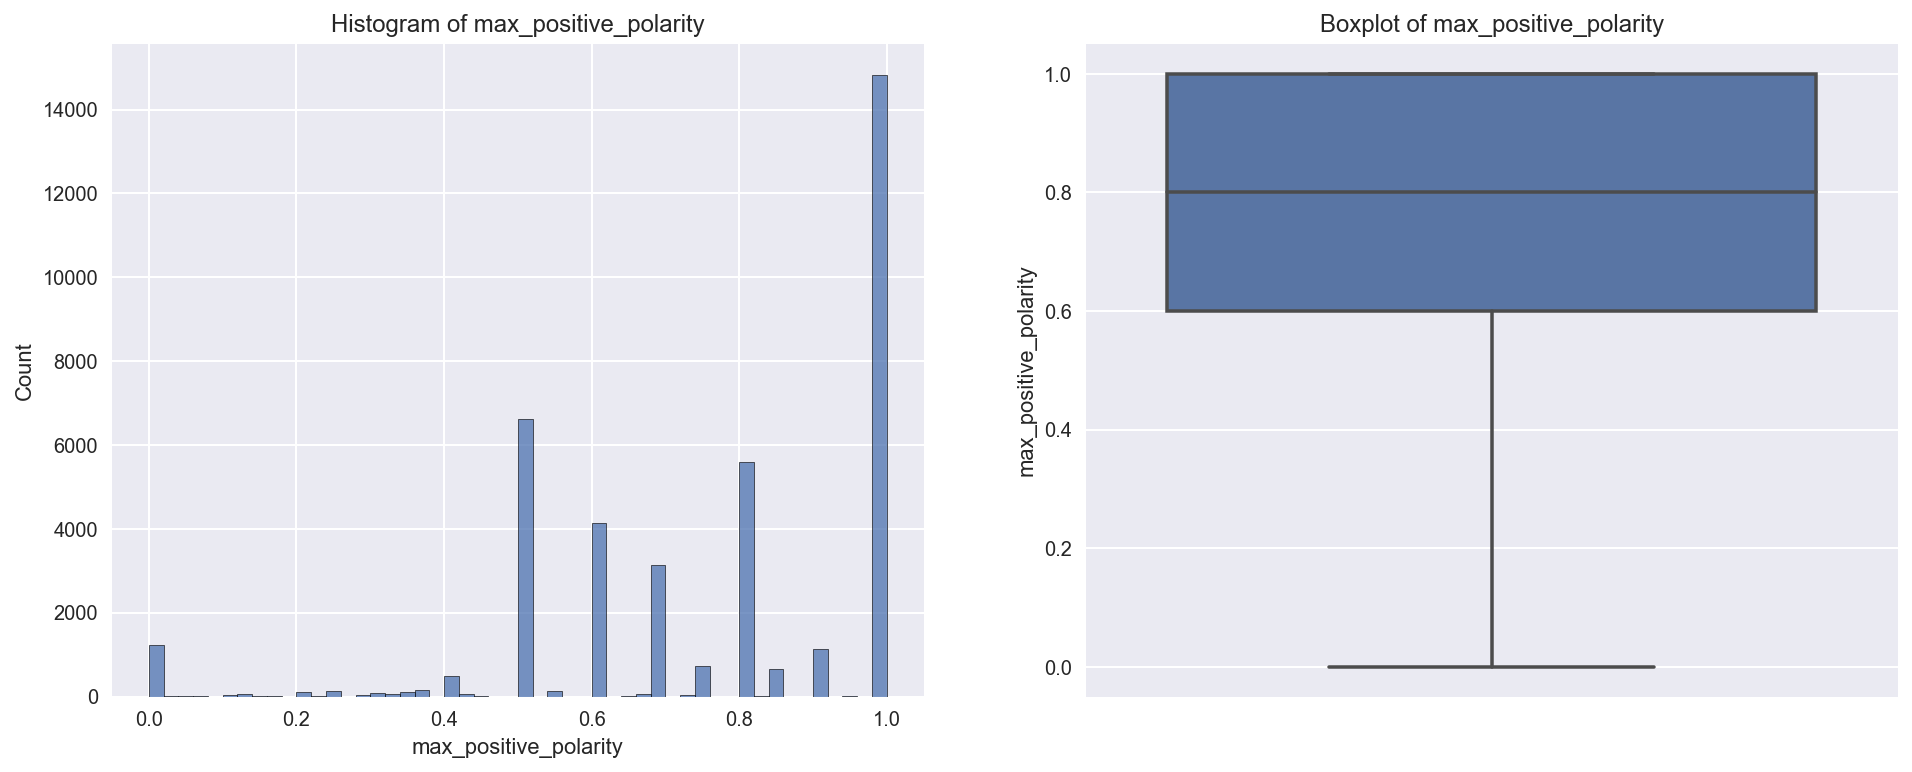

In [66]:
# 52. max_positive_polarity: Max. polarity of positive words
hist_box(df, 'max_positive_polarity')
show_statistic(df, 'max_positive_polarity')

The min_positive_polarity shows left-skewed distribution. It has 3.0698 % outliers.

avg_negative_polarity : mean = -0.2595, var = 0.0163, std = 0.1277, q1(25%) = -0.3284, q3(75%) = -0.1869, min = -1.0000, max = 0.0000
It has 328 ourliers that larger than (mean + 3*std), account for 0.8274 %


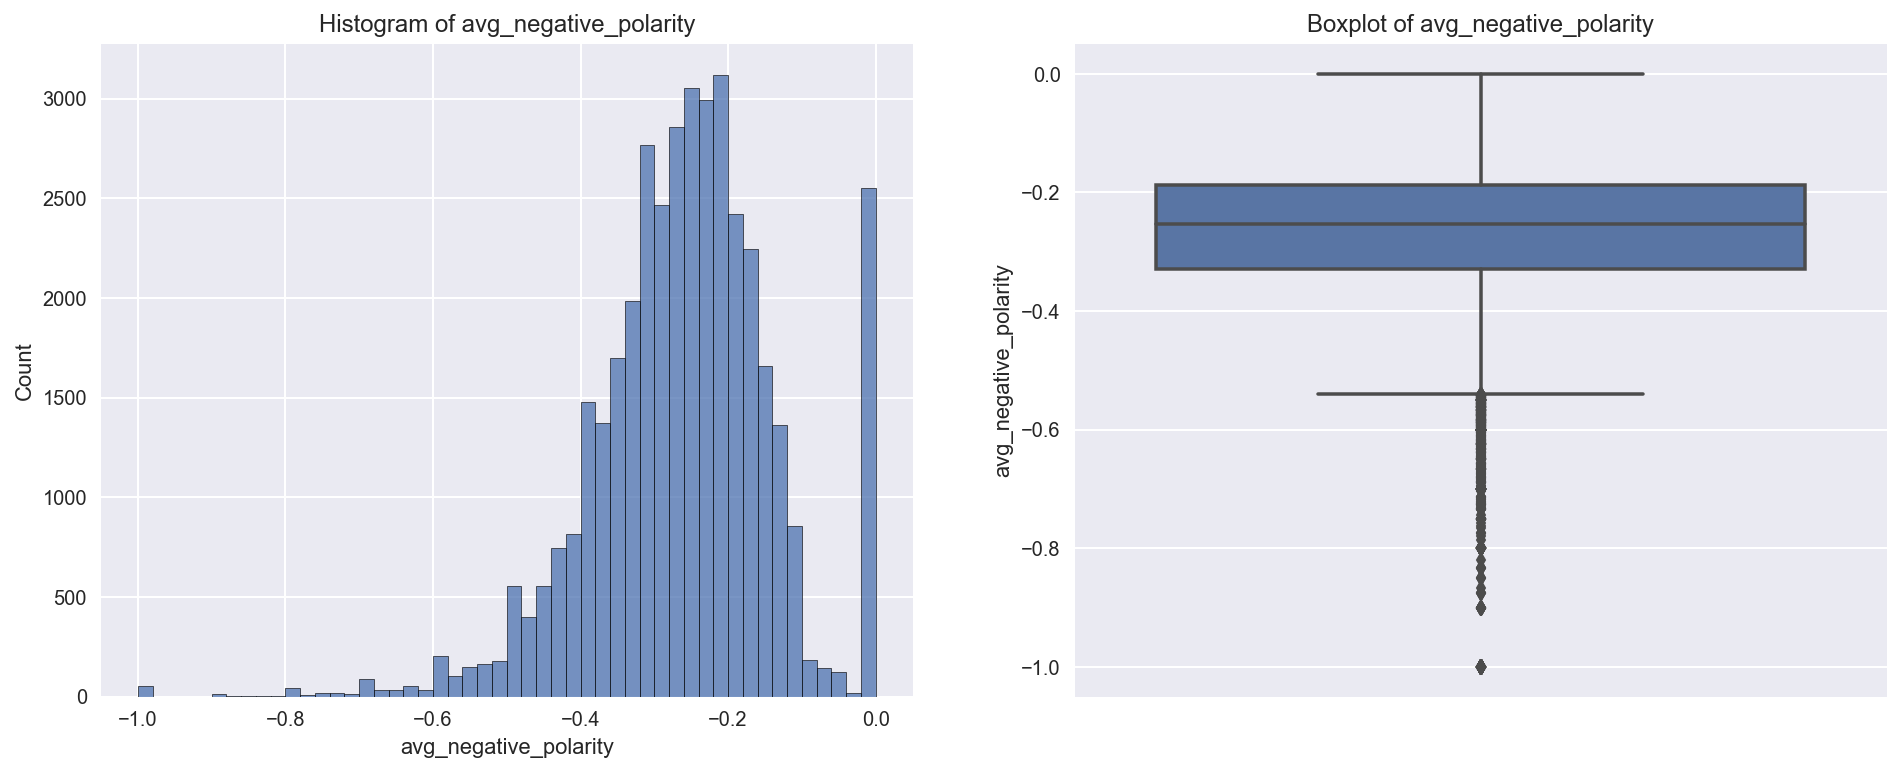

In [67]:
# 53. avg_negative_polarity: Avg. polarity of negative words
hist_box(df, 'avg_negative_polarity')
show_statistic(df, 'avg_negative_polarity')

The avg_negative_polarity shows left-skewed distribution. It has 0.8274 % outliers. Some data concentrate near 0.

min_negative_polarity : mean = -0.5219, var = 0.0843, std = 0.2903, q1(25%) = -0.7000, q3(75%) = -0.3000, min = -1.0000, max = 0.0000


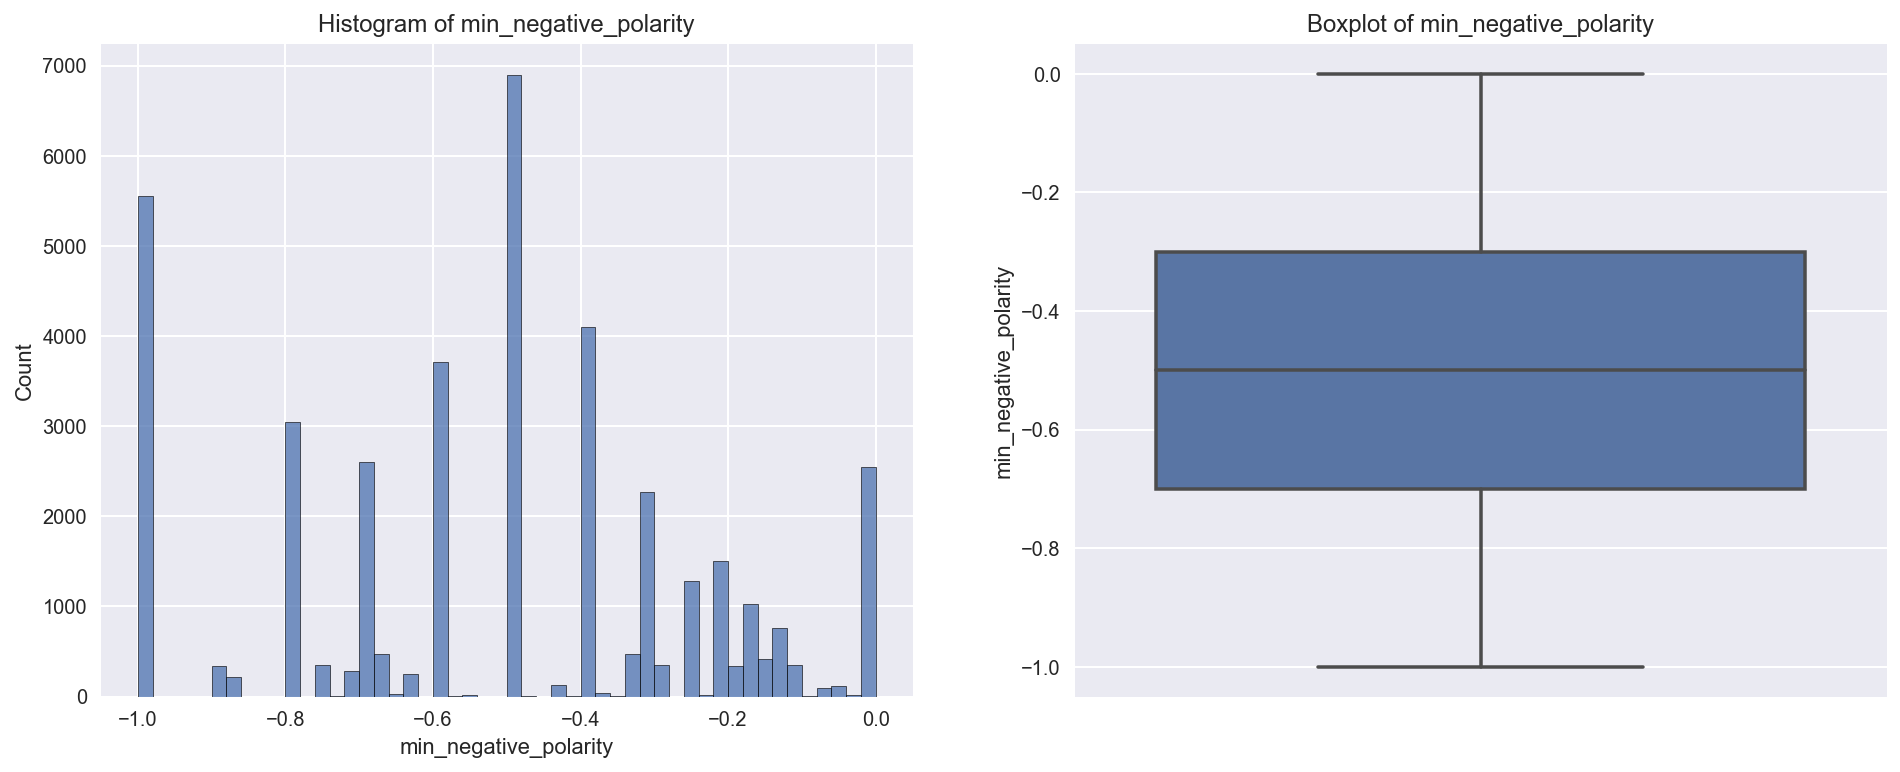

In [68]:
# 54. min_negative_polarity: Min. polarity of negative words
hist_box(df, 'min_negative_polarity')
show_statistic(df, 'min_negative_polarity')

The min_negative_polarity shows normal distribution. Some data concentrate near -1 and 0.

max_negative_polarity : mean = -0.1075, var = 0.0091, std = 0.0954, q1(25%) = -0.1250, q3(75%) = -0.0500, min = -1.0000, max = 0.0000
It has 1152 ourliers that larger than (mean + 3*std), account for 2.9059 %


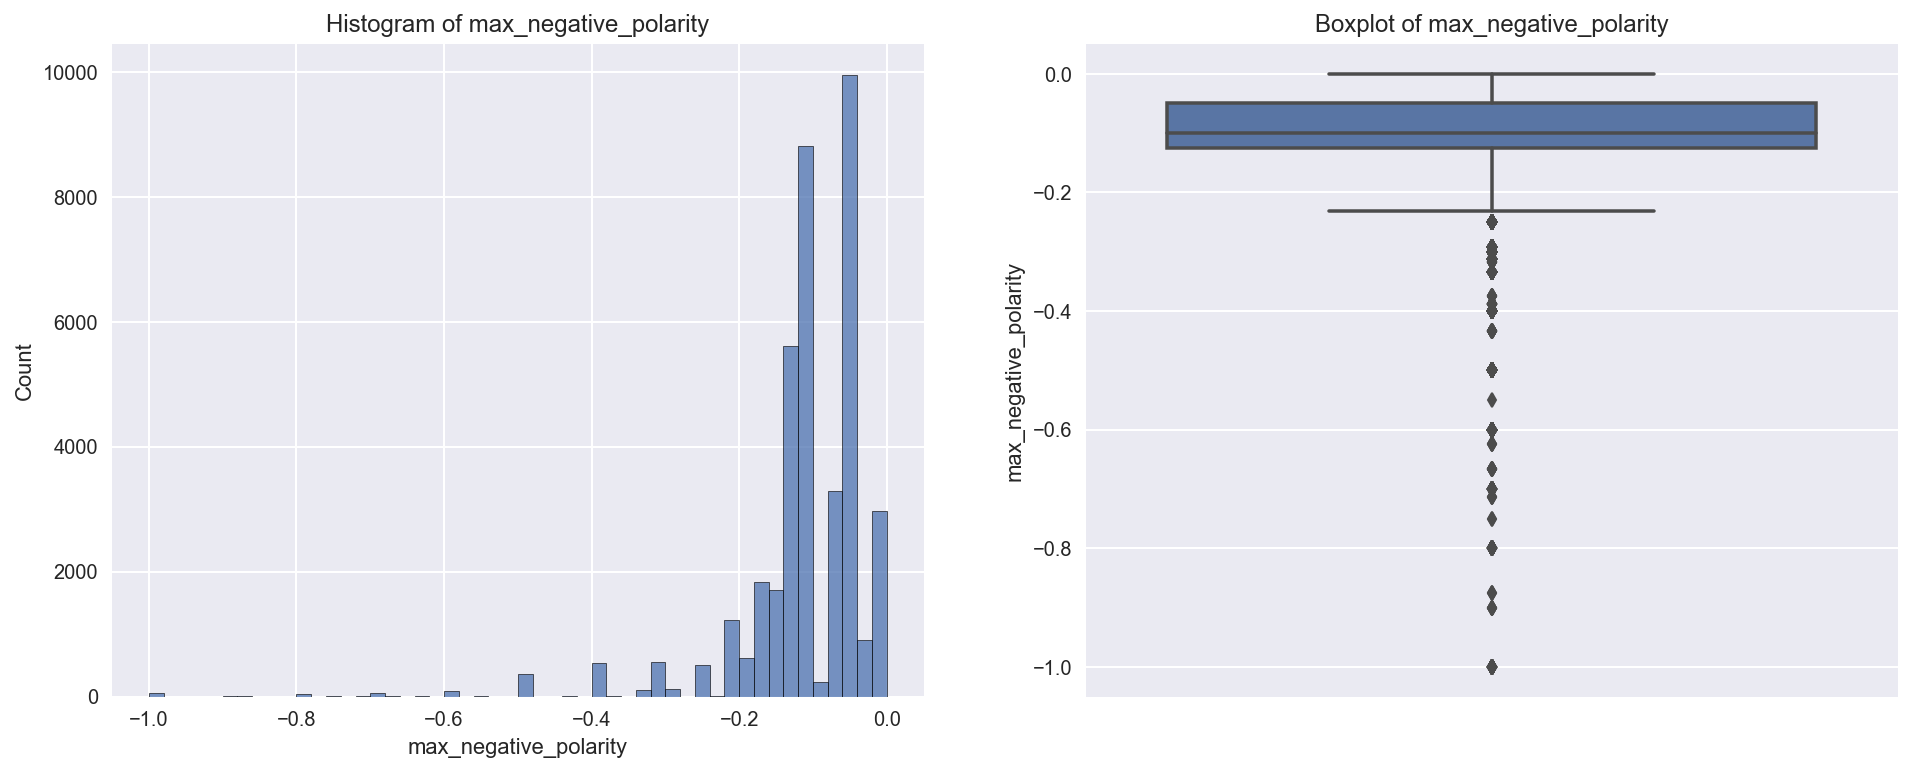

In [69]:
# 55. max_negative_polarity: Max. polarity of negative words
hist_box(df, 'max_negative_polarity')
show_statistic(df, 'max_negative_polarity')

The max_negative_polarity shows left-skewed distribution. It has 2.9059 % outliters

title_subjectivity : mean = 0.2824, var = 0.1051, std = 0.3242, q1(25%) = 0.0000, q3(75%) = 0.5000, min = 0.0000, max = 1.0000


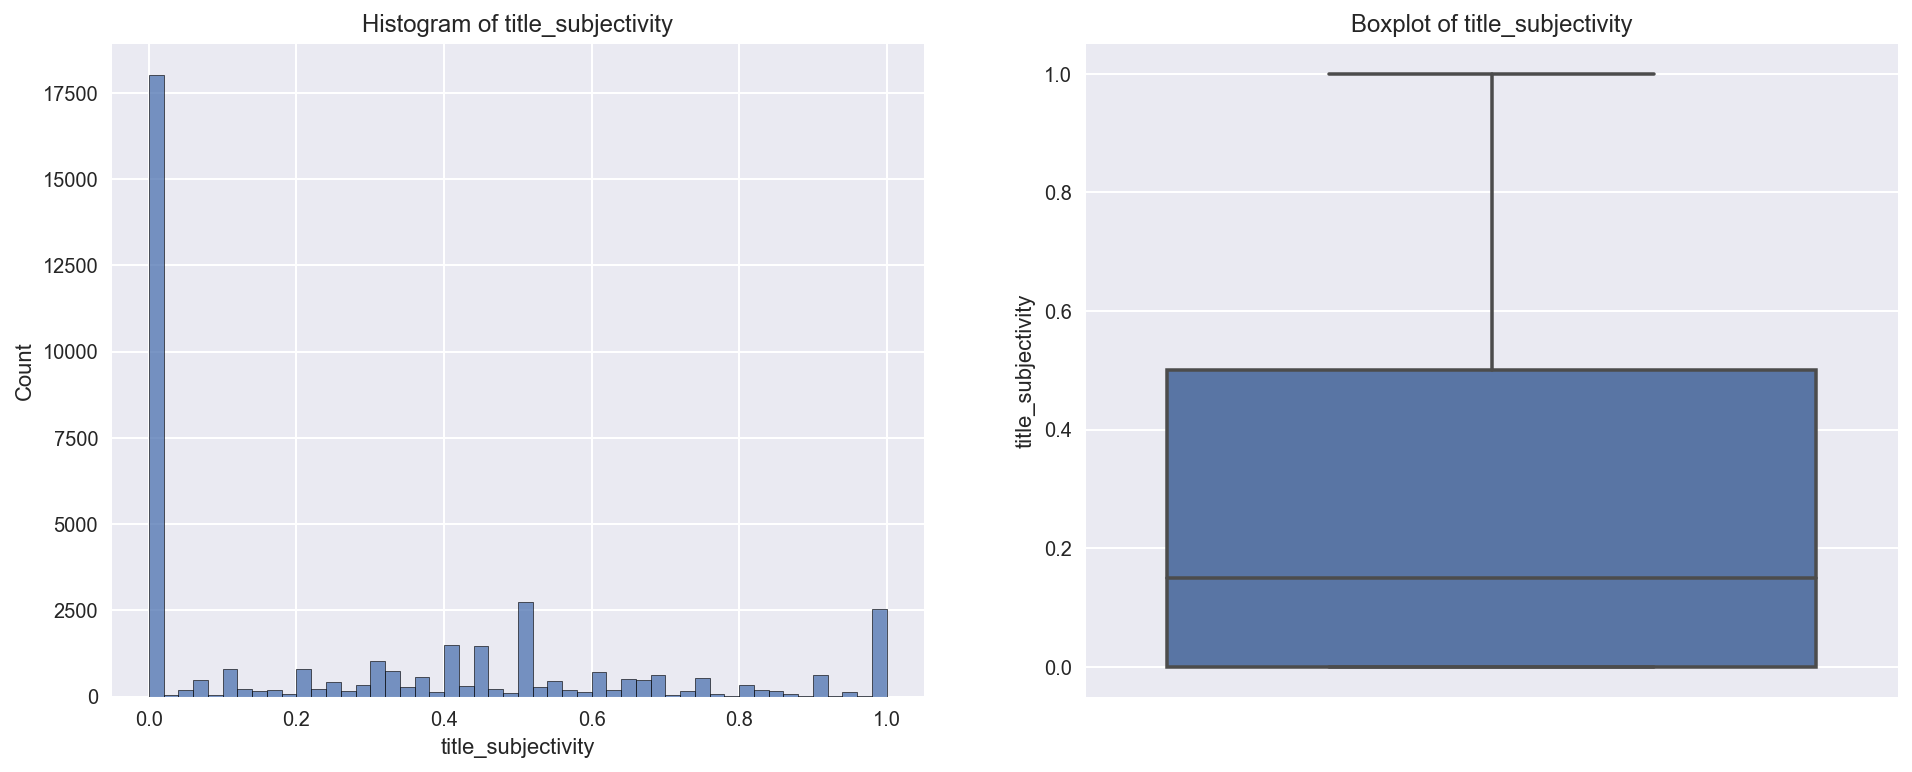

In [70]:
# 56. title_subjectivity: Title subjectivity
hist_box(df, 'title_subjectivity')
show_statistic(df, 'title_subjectivity')

The title_subjectivity shows right-skewed distribution. Many data concentrate near 0.

title_sentiment_polarity : mean = 0.0714, var = 0.0705, std = 0.2655, q1(25%) = 0.0000, q3(75%) = 0.1500, min = -1.0000, max = 1.0000
It has 914 ourliers that larger than (mean + 3*std), account for 2.3055 %


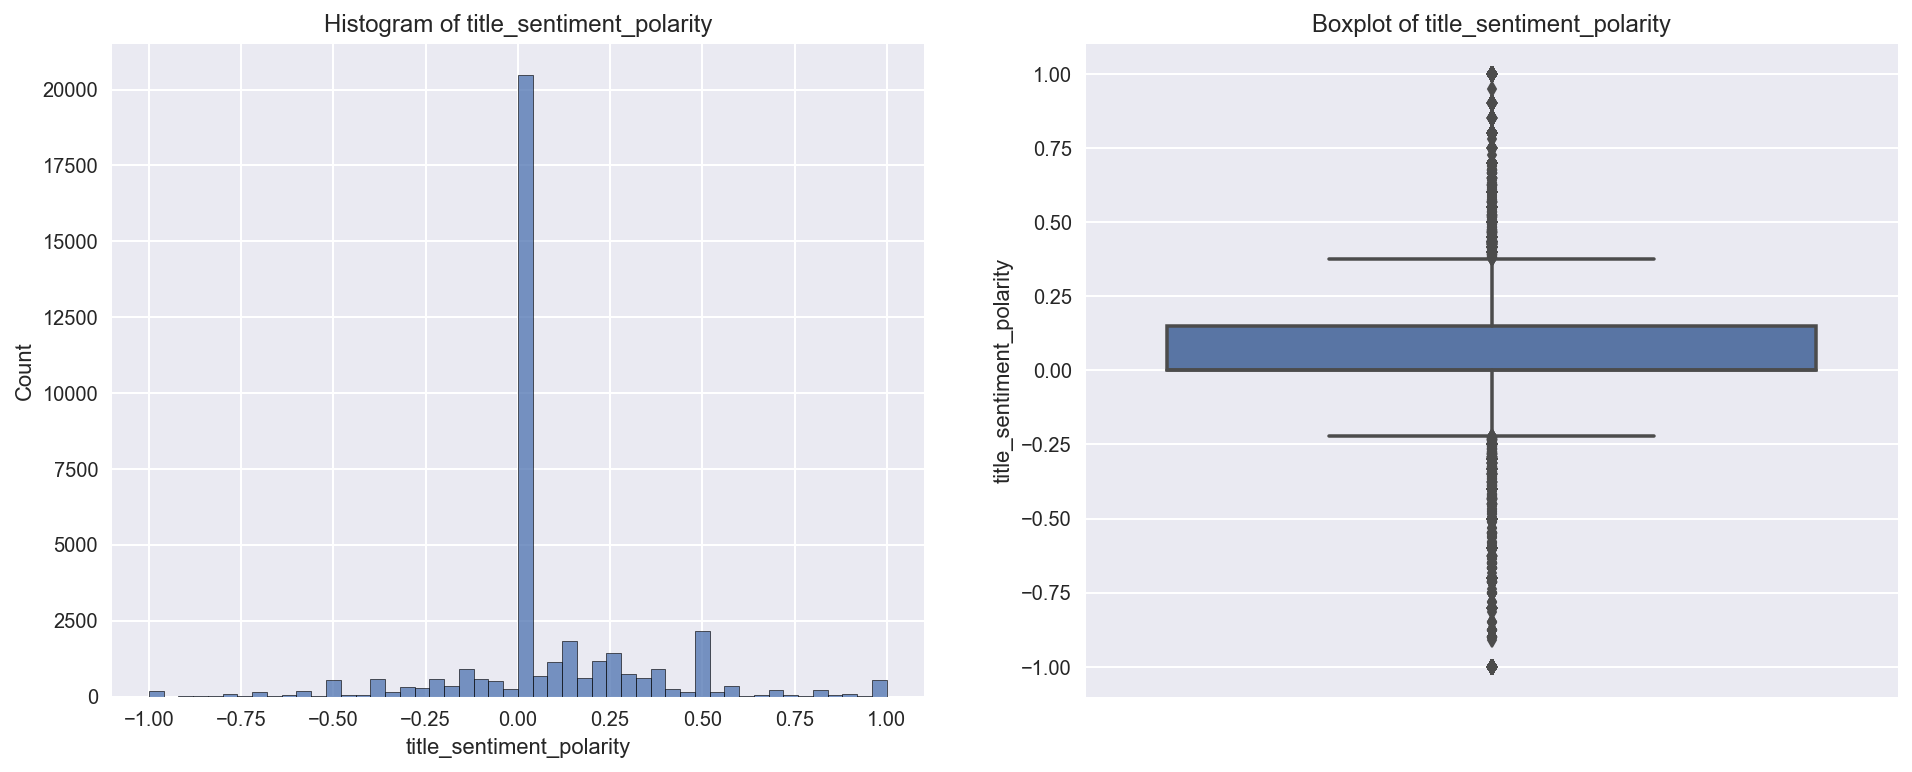

In [71]:
# 57. title_sentiment_polarity: Title polarity
hist_box(df, 'title_sentiment_polarity')
show_statistic(df, 'title_sentiment_polarity')

The title_subjectivity shows normal distribution. Outliers account for 2.3055 % of the total. They are on both sides.

abs_title_subjectivity : mean = 0.3418, var = 0.0356, std = 0.1888, q1(25%) = 0.1667, q3(75%) = 0.5000, min = 0.0000, max = 0.5000


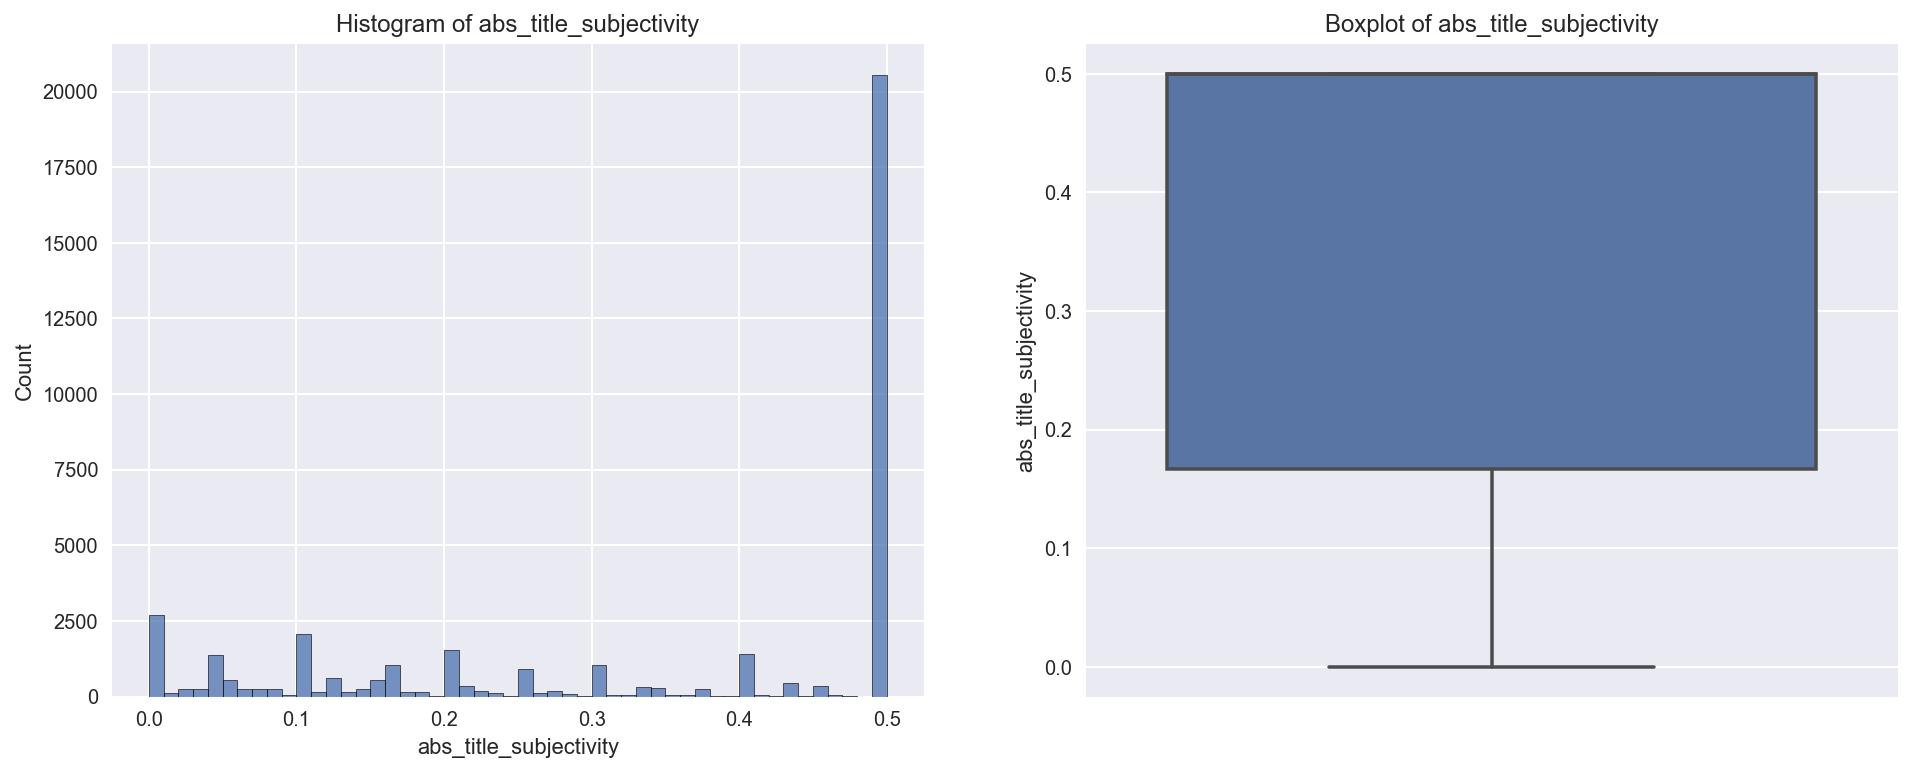

In [72]:
# 58. abs_title_subjectivity: Absolute subjectivity level
hist_box(df, 'abs_title_subjectivity')
show_statistic(df, 'abs_title_subjectivity')

The abs_title_subjectivity shows that many data concentrate near 0.5.

abs_title_sentiment_polarity : mean = 0.1561, var = 0.0512, std = 0.2263, q1(25%) = 0.0000, q3(75%) = 0.2500, min = 0.0000, max = 1.0000
It has 871 ourliers that larger than (mean + 3*std), account for 2.1971 %


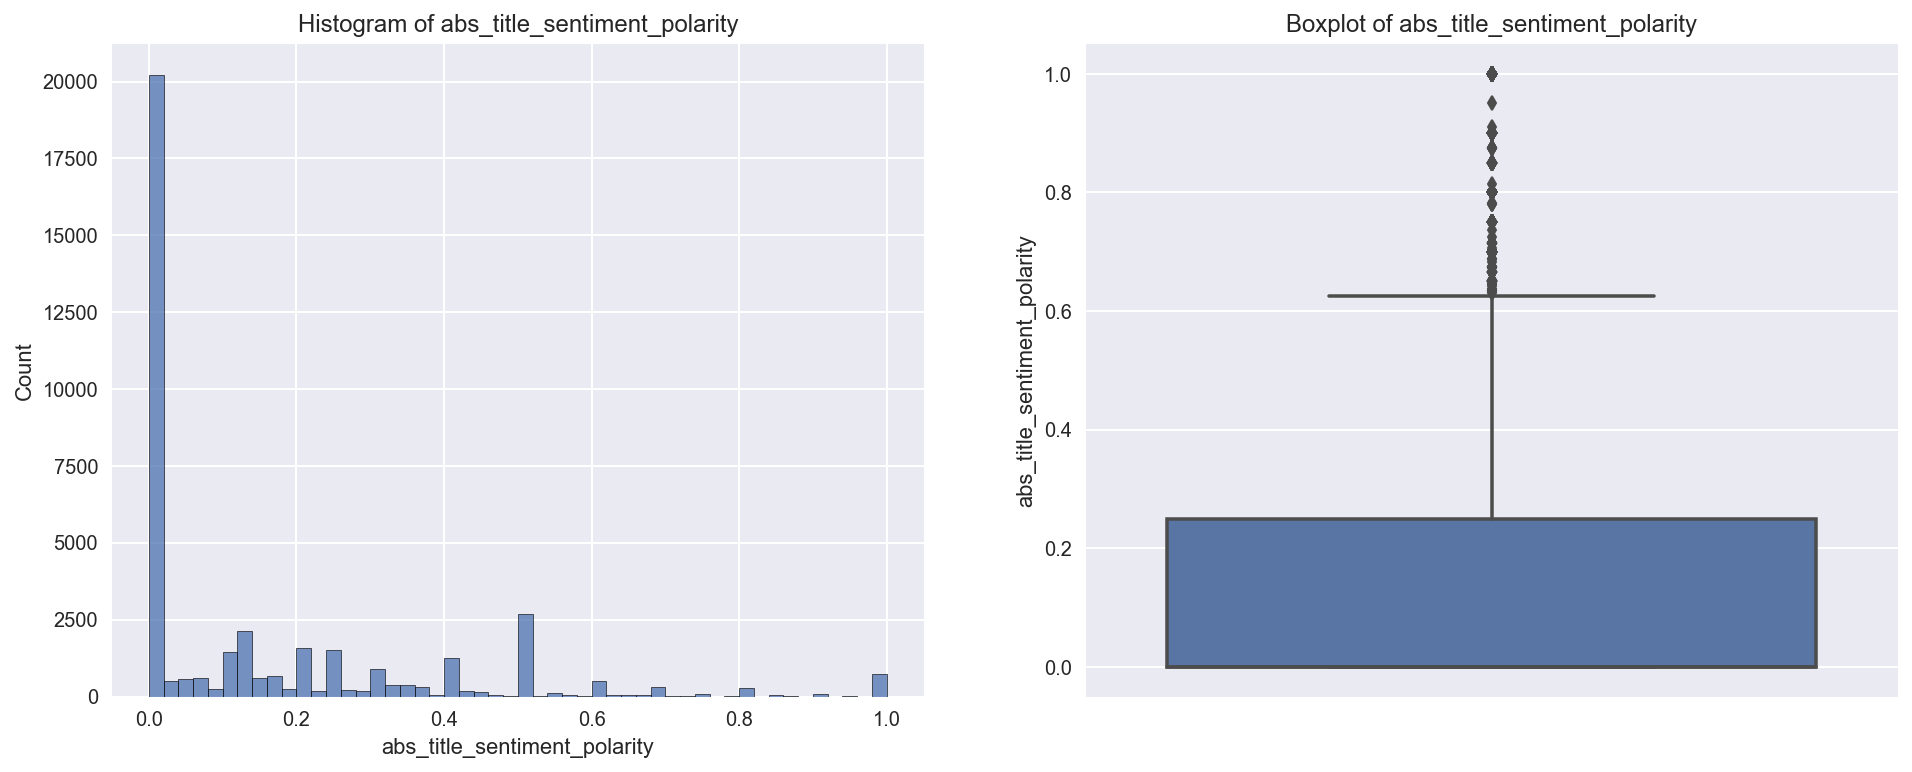

In [73]:
# 59. abs_title_sentiment_polarity: Absolute polarity level
hist_box(df, 'abs_title_sentiment_polarity')
show_statistic(df, 'abs_title_sentiment_polarity')

The abs_title_sentiment_polarity shows that many data concentrate near 0.0. Outliers account for 2.1971 %.

### Summary of DEA

- 1) There are 3 groups of dummy variables as followed:
  - Dummy Group 1:
  
      'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world'

  - Dummy Group 2:
      
      'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
      
  - Dummy Group 3:
      'is_weekend'


- 2) Some variables have noises

  'n_non_stop_words', 'n_unique_tokens', and 'n_non_stop_unique_tokens' have a very large outlier respectively.
  

- 3) All variables have different scales

  
- 4) Many variables have outliers

  Almost every variable has outliers. Outliers account for blow 3% of each variable.
  
  
- 5) Skewed distribution
  
  - right skewed

        shares, n_tokens_content, num_hrefs, num_self_hrefs, num_imgs
        num_videos, kw_min_min, kw_max_min, kw_avg_min ,kw_min_max
        kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares
        self_reference_avg_sharess, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04
        global_rate_negative_words, rate_negative_words, min_positive_polarity

  - left skewed
  
          average_token_length, kw_max_max, rate_positive_words, avg_negative_polarity, max_negative_polarity


# 4. Data Prepartion
- Define dummy and numeric variables
- Drop outliers

In [74]:
# copy a new data set
news_df = df.copy()
news_df.shape

(39644, 59)

## Define dummy and numeric variables

In [75]:
dummy_cols = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
              'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',
             'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 
              'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

new_numeric_cols = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

response_col = "shares"

#### convert data type of dummy columns from float to int

In [76]:
news_df[dummy_cols] = news_df[dummy_cols].astype("int")

In [77]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  int32  
 12  data_channel_is_entertainment  39644 non-null 

### Drop outliers

- Drop outliers for 'n_non_stop_words', 'n_unique_tokens', and 'n_non_stop_unique_tokens'
- Analyze other variables having outliers

#### Drop outliers for 'n_non_stop_words', 'n_unique_tokens', and 'n_non_stop_unique_tokens'

Drop the outliers with max value

In [78]:
def two_box_compare(ori_df, now_df, col):

    fig,axes = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(16, 6)
    axes[0].set_title("Original data ")
    sns.boxplot(y=ori_df[col], orient="v",ax=axes[0])
    
    axes[1].set_title("New data ")
    sns.boxplot(y=now_df[col], orient="v",ax=axes[1])

def statistic_compare(data_1, data_2, cols):
    for col in cols:
        mean1 = data_1[col].mean()
        std1 = data_1[col].std()
        
        mean2 = data_2[col].mean()
        std2 = data_2[col].std()
        
        des_mean = (1 - mean2/ mean1) * 100
        des_std = (1 - std2/ std1) * 100
        
        print("%s :\n the mean decreased from %.2f to %.2f , the mean value has decreased by more than %.2f %% .\n the standard deviation decreased from %.2f to %.2f the standard deviation value has decreased by more than %.2f %%.\n"
             %(col, mean1, mean2, des_mean, std1, std2, des_std))

In [79]:
# find the row with max value
max_outlier = news_df[(news_df['n_non_stop_words'] == news_df['n_non_stop_words'].max()) | 
                     (news_df['n_unique_tokens'] == news_df['n_unique_tokens'].max()) | 
                     (news_df['n_non_stop_unique_tokens'] == news_df['n_non_stop_unique_tokens'].max())]
max_outlier

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                          0                              1   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                    0                       0                     0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                      0        -1.0       778.0  143.714286     23100.0   

       kw_max_max     kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
31037    843300.0  330442.857143  2420.579189  3490.598812  2912.105124   

       self_reference_min_shares  self_reference_max_shares  \
31037                      795.0                        0.0   

       self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
31037                    6924.375                  0                   1   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
31037                     0                    0                  0   

       weekday_is_saturday  weekday_is_sunday  is_weekend  LDA_00  LDA_01  \
31037                    0                  0           0     0.0     0.0   

       LDA_02  LDA_03  LDA_04  global_subjectivity  global_sentiment_polarity  \
31037     0.0     0.0     0.0                  0.0                        0.0   

       global_rate_positive_words  global_rate_negative_words  \
31037                         0.0                         0.0   

       rate_positive_words  rate_negative_words  avg_positive_polarity  \
31037                  0.0                  0.0                    0.0   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
31037                    0.0                    0.0                 0.0   

       title_sentiment_polarity  abs_title_subjectivity  \
31037                       0.0                     0.0   

       abs_title_sentiment_polarity  shares  
31037                           0.0    5900

The 3 variables have the same noise data. I will delete it.

In [80]:
# drop the row with max value
news_df.drop(max_outlier.index.values, inplace=True)

In [81]:
# compare their statistic
statistic_compare(df, news_df, ['n_non_stop_words', 'n_unique_tokens', 'n_non_stop_unique_tokens'])

n_non_stop_words :
 the mean decreased from 1.00 to 0.97 , the mean value has decreased by more than 2.64 % .
 the standard deviation decreased from 5.23 to 0.17 the standard deviation value has decreased by more than 96.75 %.

n_unique_tokens :
 the mean decreased from 0.55 to 0.53 , the mean value has decreased by more than 3.22 % .
 the standard deviation decreased from 3.52 to 0.14 the standard deviation value has decreased by more than 96.11 %.

n_non_stop_unique_tokens :
 the mean decreased from 0.69 to 0.67 , the mean value has decreased by more than 2.38 % .
 the standard deviation decreased from 3.26 to 0.15 the standard deviation value has decreased by more than 95.28 %.



After dropping the noise of 'n_non_stop_words', 'n_unique_tokens' and 'n_non_stop_unique_tokens', the statistic descriptions show that the 3 variable become having samller standard deviation. They are more concentrated.

#### Analyze other variables having outliers

The DEA part shows that almost all explanatory variables have outliers (larger than (mean + 3 * std)). These outliers account for blow 3% of all data. I will drop them because outliers can affect the accuracy of linear regression models.

In [82]:
def drop_outliers(data_df, cols, sigema = 3.0):
    del_arr = []
    for col in cols:
        del_outliers = data_df[np.abs(data_df[col] - data_df[col].mean() ) > (sigema * data_df[col].std() )]
        
        #Q1 = data_df[col].quantile(0.25)
        #Q3 = data_df[col].quantile(0.75)
        #IQR = Q3 - Q1

        # Creating notinvalidarea dataframe with boolean values:
        # False means these values are into the valid area 
        # True indicates presence of an outlier
        #notinvalidarea = (onlinenews < (Q1 - 1.5 * IQR)) | (onlinenews > (Q3 + 1.5 * IQR))
        
        #del_outliers = data_df[(data_df[col] < (Q1 - sigema * IQR)) | (data_df[col] > (Q3 + sigema * IQR)) ]

        del_arr.append(del_outliers)
        
        
    del_df = pd.concat(del_arr)
    
    del_df.drop_duplicates(keep='first', inplace=True)
    print("There are %d outliers that account for %.2f %%. They all large than (%.1f * std + mean) of column." 
          %(del_df.shape[0], (del_df.shape[0] / data_df.shape[0]) * 100, sigema))
    
    return del_df


from IPython.display import HTML, display
def display_html_statistic_table(ori, now, title1="1st", title2="2nd",col=""):
    

        
    html = "<table>"
    html += "<tr><td>%s</td><td>%s</td><td>%s</td></tr>" %(col, title1, title2)
    html += "<tr><td>%s</td><td>%d</td><td>%d</td></tr>" %('count', ori[col].shape[0], now[col].shape[0])
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('mean', ori[col].mean(), now[col].mean())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('std', ori[col].std(), now[col].std())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('min', ori[col].min(), now[col].min())
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('25%', ori[col].quantile(0.25), now[col].quantile(0.25))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('50%', ori[col].quantile(0.50), now[col].quantile(0.50))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('75%', ori[col].quantile(0.75), now[col].quantile(0.75))
    html += "<tr><td>%s</td><td>%.4f</td><td>%.4f</td></tr>" %('max', ori[col].max(), now[col].max())

    html += "</table>"
    display(HTML(html))

#### check all outliers of numeric variables

In [83]:
# Getting outliers that larger than (mean + 3 * std).
del_outliers_df = drop_outliers(news_df, new_numeric_cols, 3.0)

There are 12408 outliers that account for 31.30 %. They all large than (3.0 * std + mean) of column.


All numerical outliers account for 31.30% of all data. I can not drop them all.

Next, I will drop outliers of response variable.

#### check outliers of response variable

In [84]:
# find outliers of response variable.
del_3_sigema_outliers_df = drop_outliers(news_df, ["shares"], 3.0)

There are 308 outliers that account for 0.78 %. They all large than (3.0 * std + mean) of column.


In [85]:
# copy a data set to test
del_test_df_3_sigema = news_df.copy()

In [86]:
# drop outliers
del_test_df_3_sigema.drop(del_3_sigema_outliers_df.index.values, inplace=True)

In [87]:
corr_matrix_3_sigema = del_test_df_3_sigema[['shares'] + numeric_cols].corr()
corr_matrix_3_sigema.loc[corr_matrix_3_sigema['shares'] > 0.06]['shares'].sort_values(ascending = False)

shares                        1.000000
kw_avg_avg                    0.185032
LDA_03                        0.129573
kw_max_avg                    0.099336
kw_min_avg                    0.079701
num_imgs                      0.078856
num_hrefs                     0.077703
self_reference_avg_sharess    0.066709
is_weekend                    0.063802
Name: shares, dtype: float64

In [88]:
display_html_statistic_table(news_df, del_test_df_3_sigema, title1="with outliers",
                             title2 = "droped outliers", col="shares")

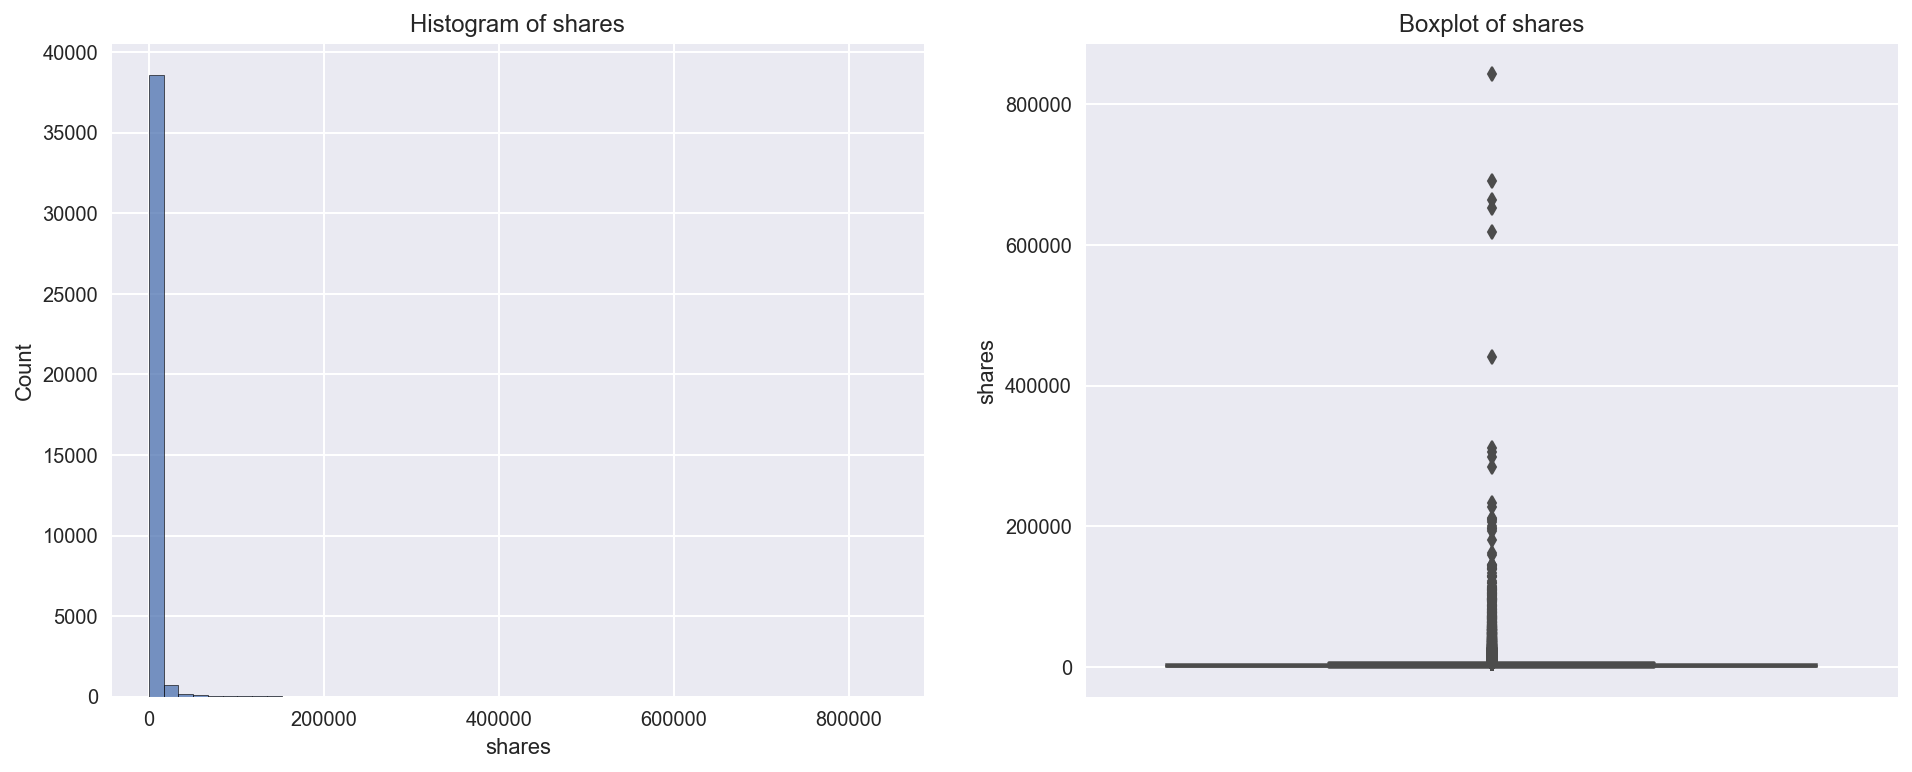

In [89]:
# Original data set with outliers
hist_box(news_df, 'shares')

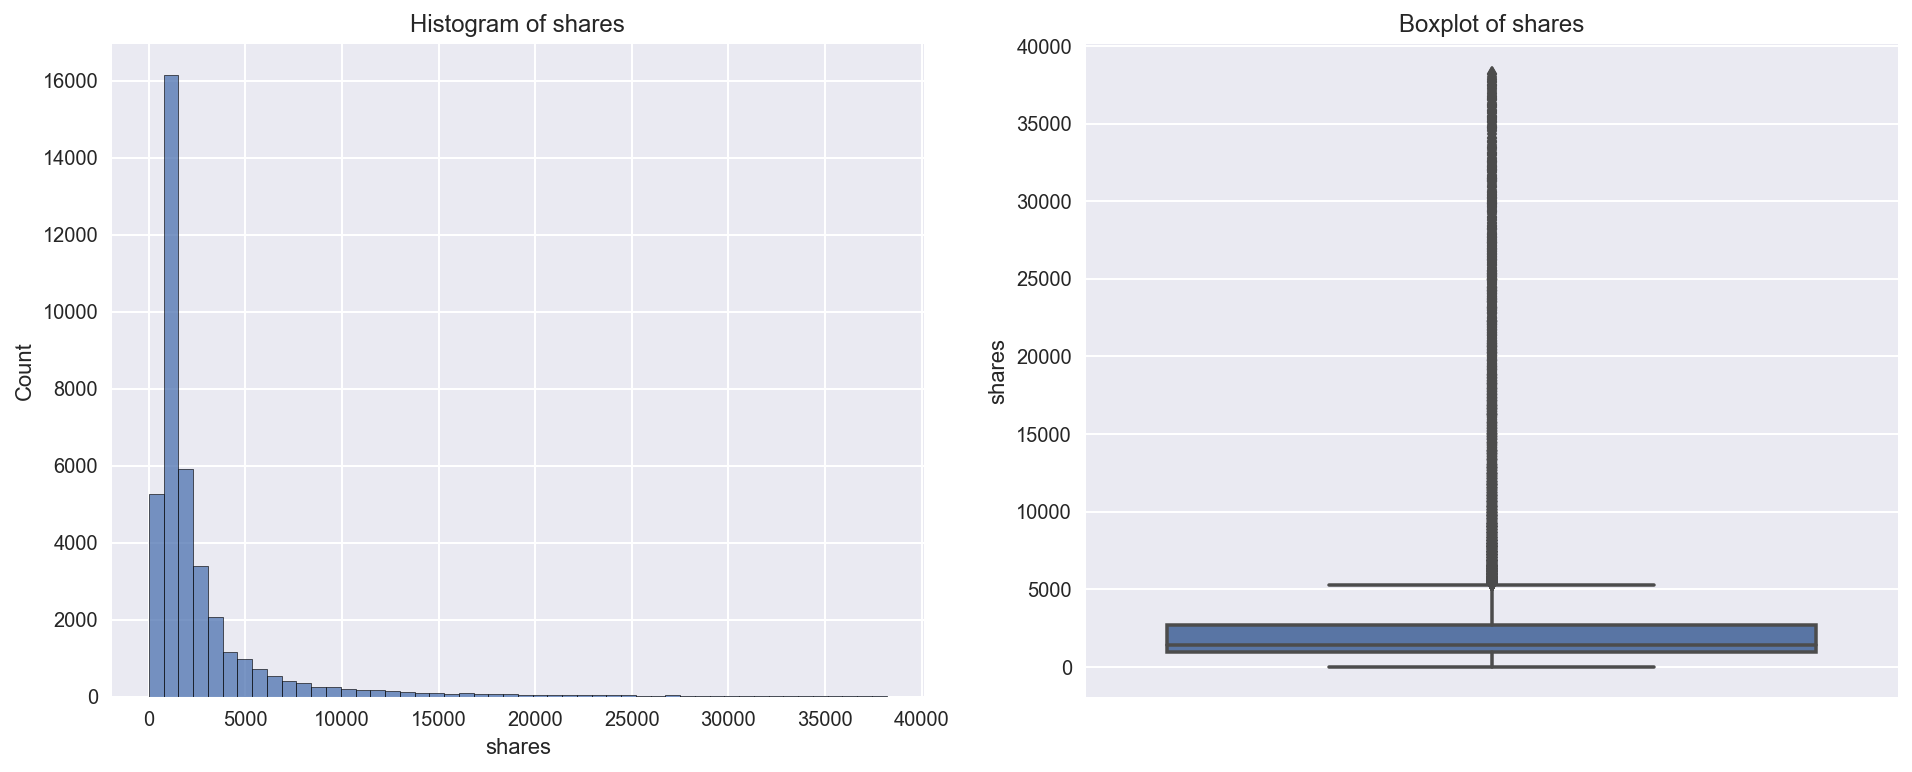

In [90]:
# now data set without outliers
hist_box(del_test_df_3_sigema, 'shares')

From above description, histogram and bar plot, we can see as followed:

The response variable dropped outliers (308 outliers) has std (3949.6702) lower than  std (11627.0906) of original response variable. It means the shares become more concentrate.

#### I will drop outliers with (mean + 3 * std)

In [91]:
news_df = del_test_df_3_sigema.copy()

In [92]:
news_df.shape

(39335, 59)

# 5. Re-run DEA

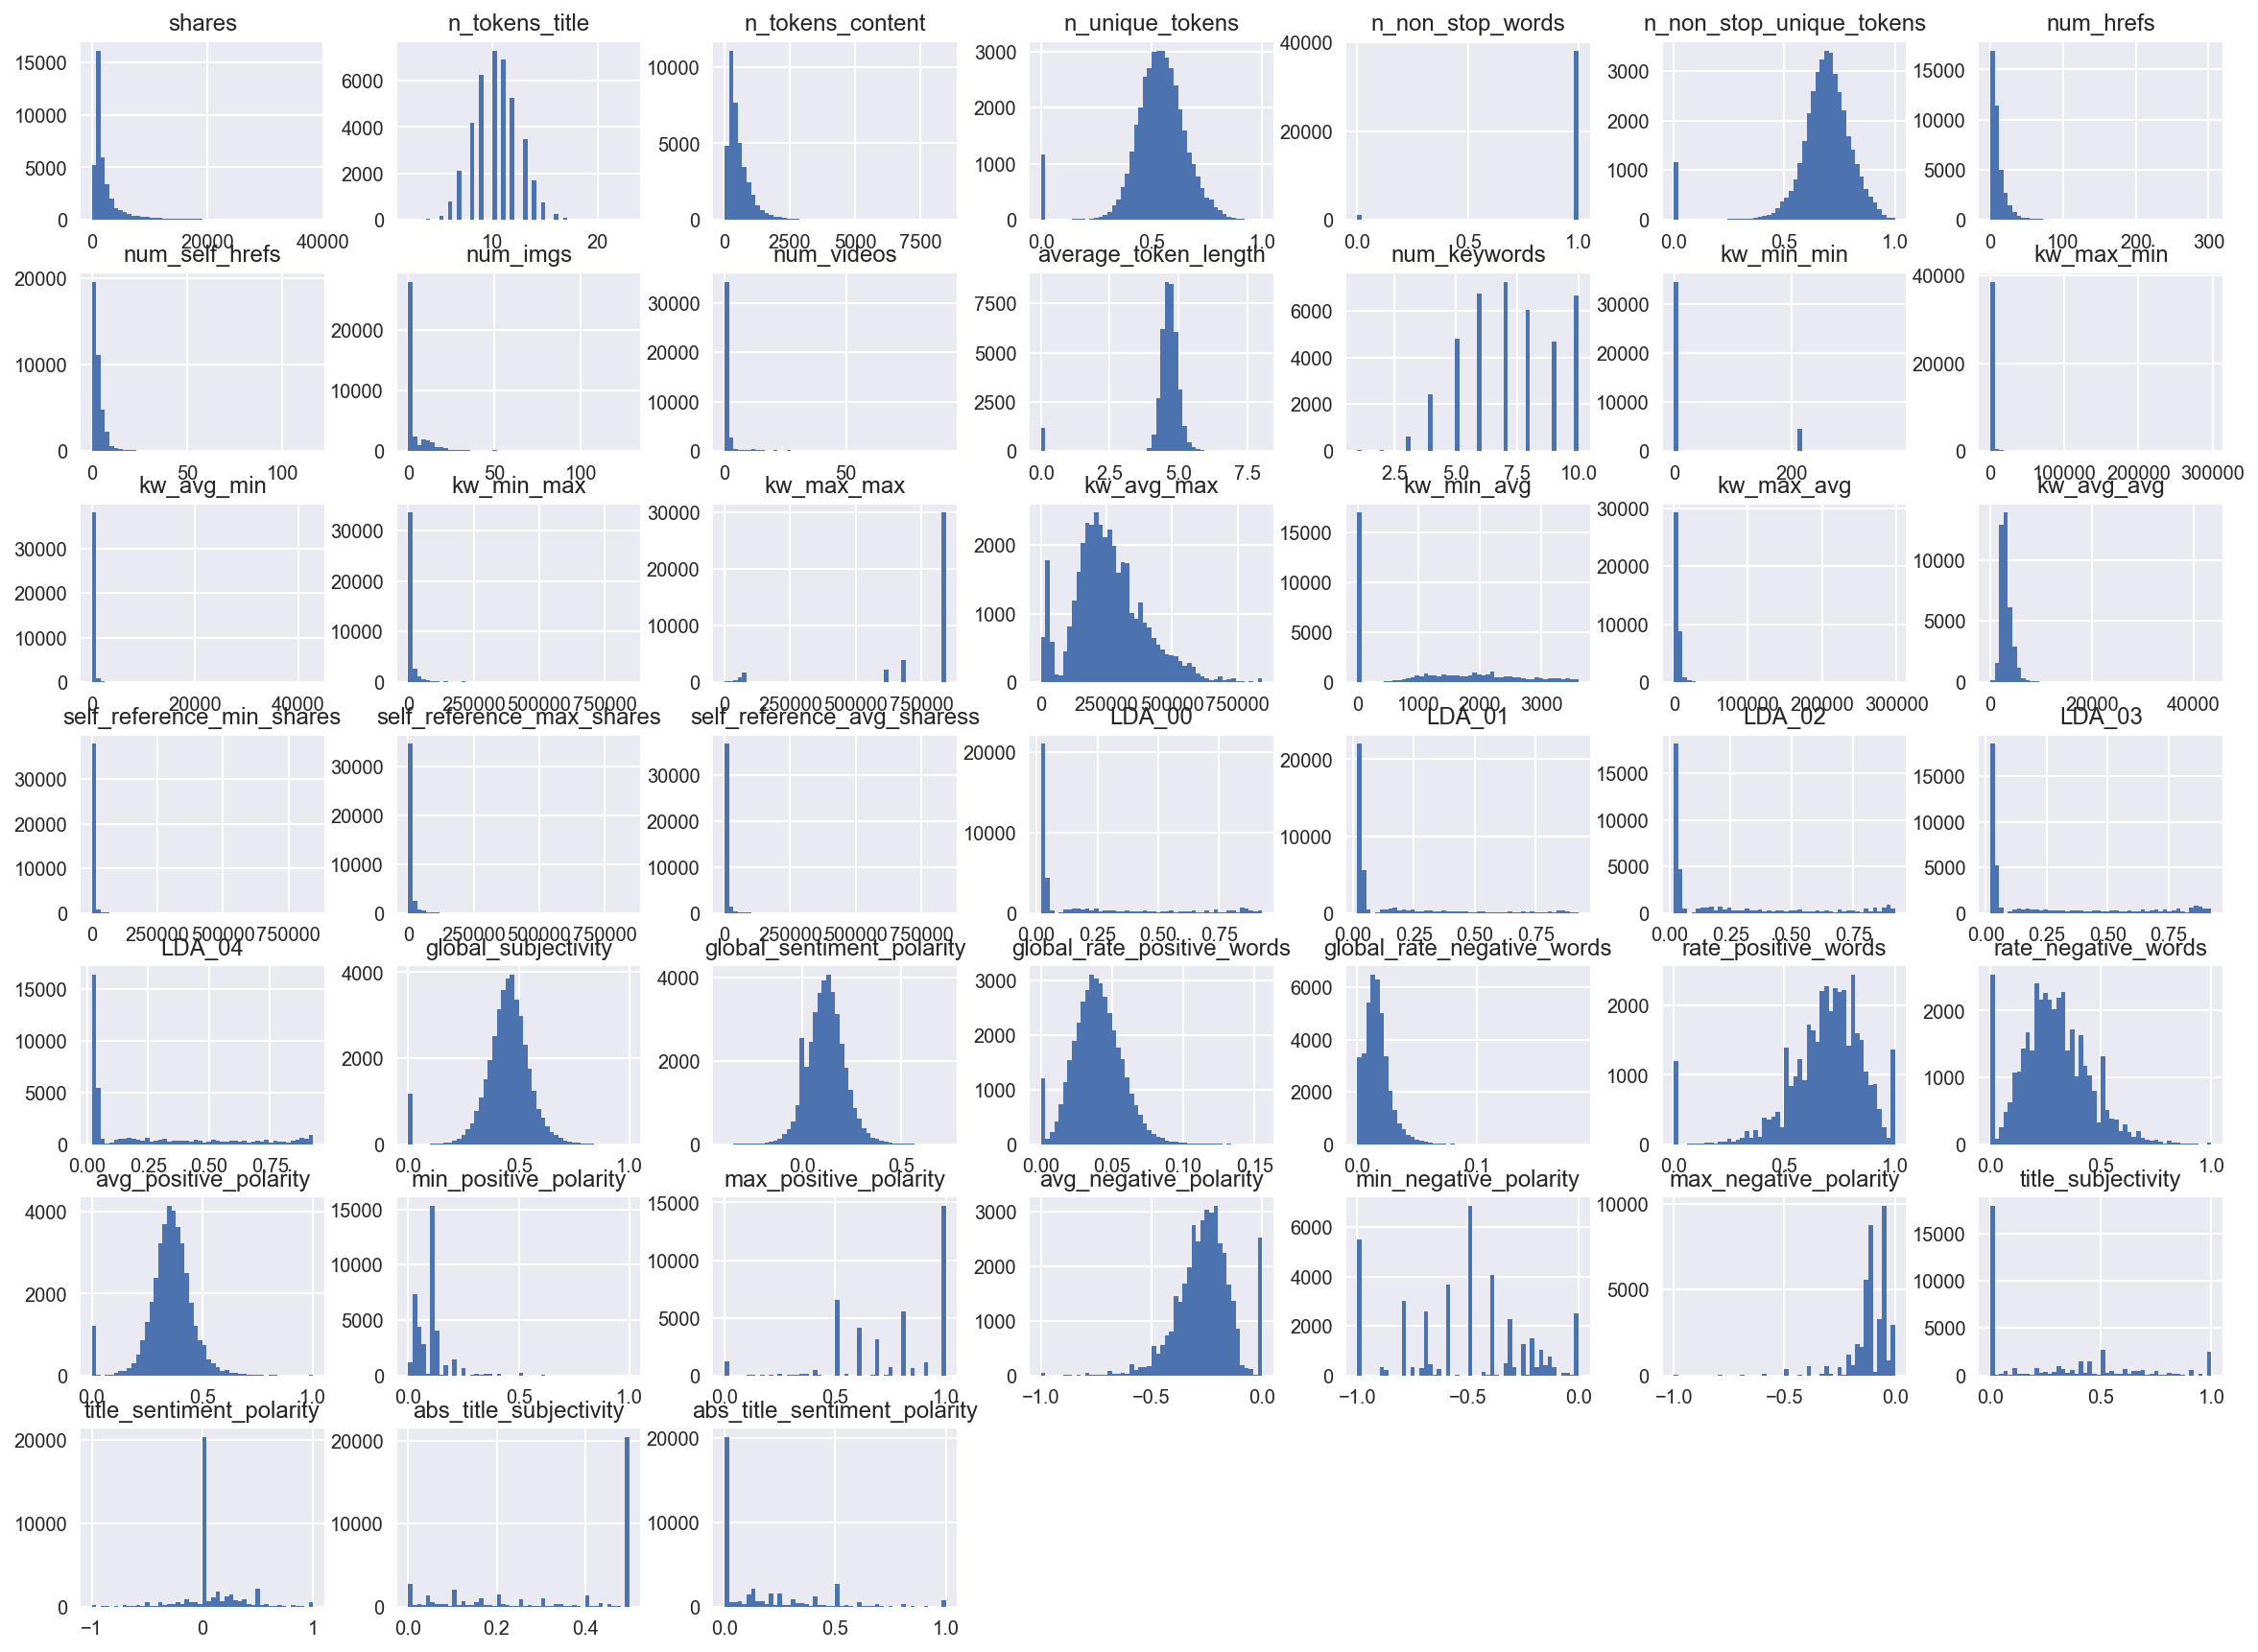

In [93]:
# draw the histogram
news_df[["shares"] + new_numeric_cols].hist(bins=50, figsize=(20,15))
plt.show()

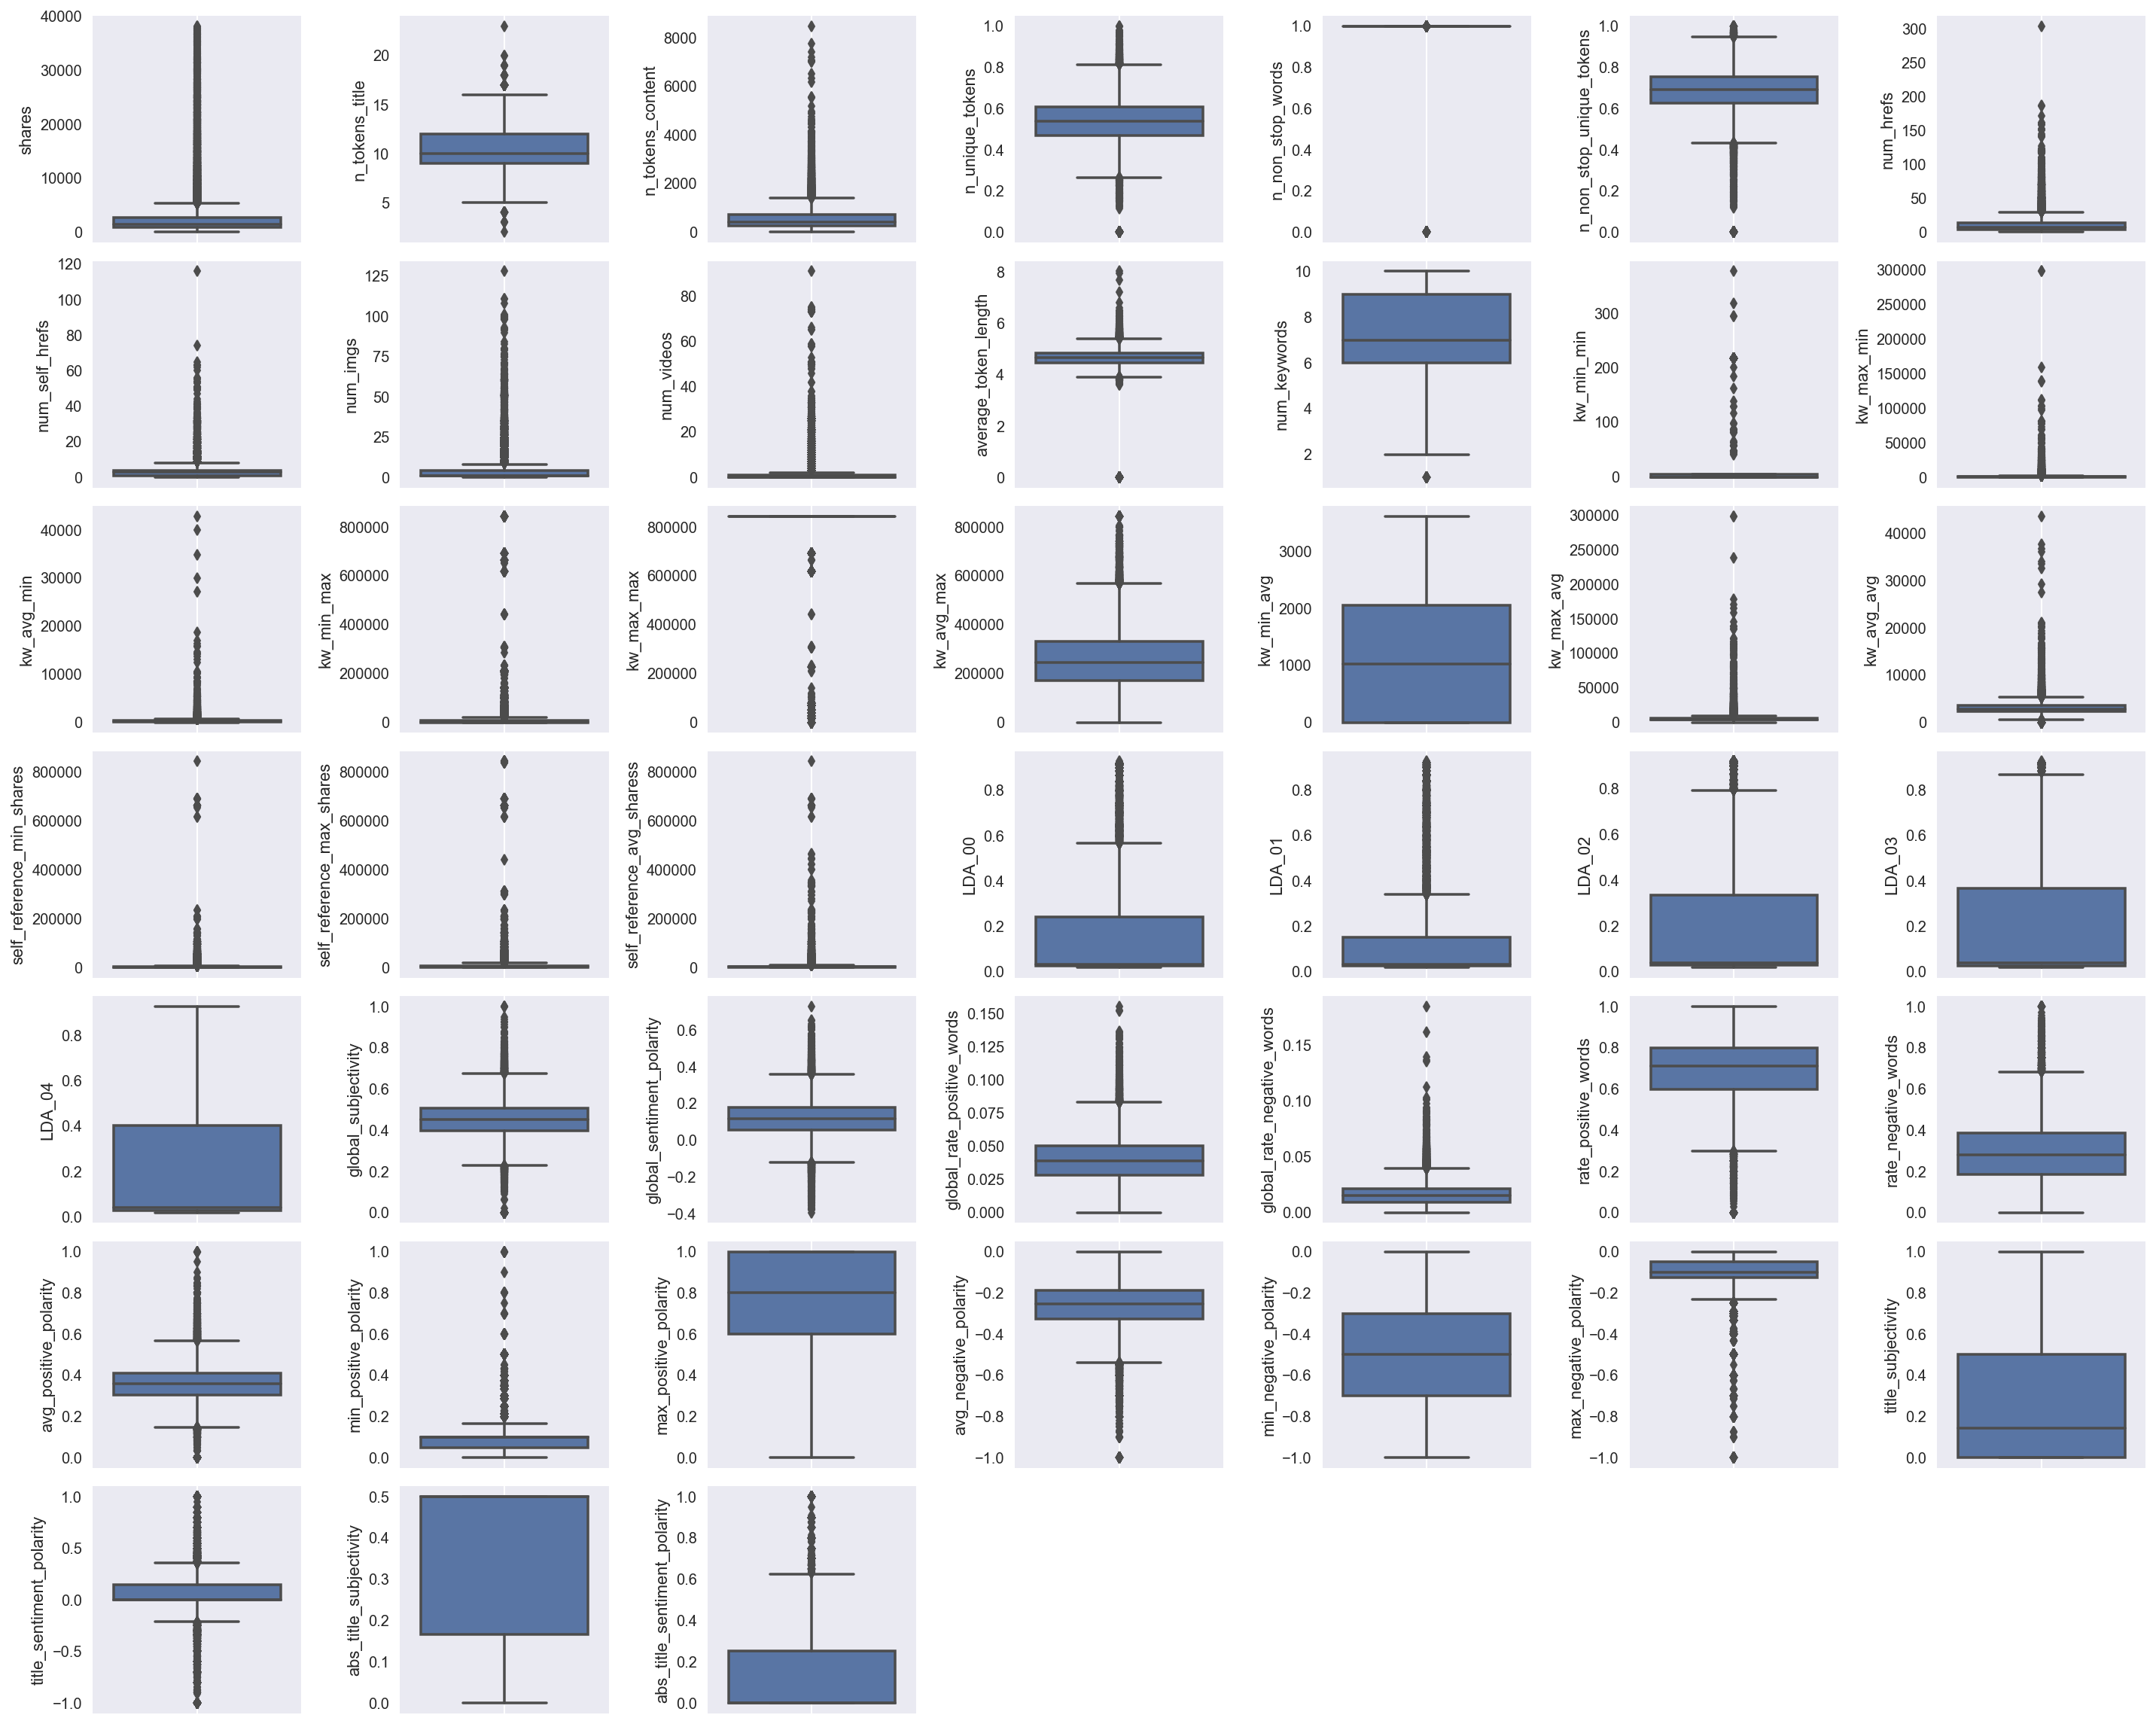

In [94]:
# Draw the box plots
plt.figure(figsize = (20, 16))
for i, col in enumerate(["shares"] + new_numeric_cols):
    plt.subplot(7,7, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=news_df,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

In [95]:
corr_matrix_3_sigema = news_df[['shares'] + numeric_cols].corr()
corr_matrix_3_sigema.loc[corr_matrix_3_sigema['shares'] > 0.06]['shares'].sort_values(ascending = False)

shares                        1.000000
kw_avg_avg                    0.185032
LDA_03                        0.129573
kw_max_avg                    0.099336
kw_min_avg                    0.079701
num_imgs                      0.078856
num_hrefs                     0.077703
self_reference_avg_sharess    0.066709
is_weekend                    0.063802
Name: shares, dtype: float64

We can see that the correlation values between response (shares) and other variables have increased. Also, other variables become more concentrate too.

# 6. Feature selecting
- Split data set
- normalization & standardization
- Create a baseline
- Using different methods to select features
  - PCA

  - filter
    - VarianceThreshold
	- r_regression
	- mutual_info_regression

  - Wrapper
	- RFE + LogisticRegression (Spend too much time. Can not get result.)

  - Embedded
	- LinearSVC
	- **LassoLarsCV (The fastest and the most accurate)**
    - RandomForestClassifier

- Compare each methods

### Split data set & normalization & standardization

Usually, I use StandardScaler to convert data from different scales to the same scales. Variables with same scales can get a good accurate when training a model.

If variables of data have many outliers, RobustScaler can solve outliers better than StandardScaler.

In [96]:
def get_train_test_X_y(data_df, y_col, size=0.3, std_cols=None):
    y = data_df[y_col]
    X = data_df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    
    cols = X.columns
    
    if std_cols:
        # std = preprocessing.StandardScaler()
        
        # RobustScaler can solve outliers better than StandardScaler
        std = preprocessing.RobustScaler()
        
        fitted = std.fit_transform(X_train[std_cols])
        
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        
        test_fit = std.transform(X_test[std_cols])
        
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

Create train and test set

In [97]:
X_train, X_test, y_train, y_test = get_train_test_X_y(news_df, "shares", std_cols=new_numeric_cols)

In [98]:
# check X_train
X_train.shape

(27534, 58)

Define a function. It uses k-fold and LinearRegression to calculate R^2.

In [99]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression
# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# using k-fold to validate. Return avg of r^2
def linear_regression_cross_r2(X, y, name, show = True):
    # Assing the model function you want to use to a variable
    model = LinearRegression()

    # fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
    # cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
    # parameter
    model_scores = cross_val_score(model, X, y, cv=5)

    if show == True:
        # calculate the average R^2 across all 10 folds
        print('The average R^2 of %s model is %.4f' %(name, np.mean(model_scores)))

        # print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
        print('The R^2 metrics derived from the K-fold cross validation as followed:')
        print(model_scores)
    
    return np.mean(model_scores)

Using a list to store results of different feature selection models

In [100]:
# create a list to story feature seletion result of different method
# {name = 'VarianceThreshold', avg_r2 = 0.1, selected_features = ['a1','a2']}
features_selection_list = []

def set_info(name, avg_r2, cols):
    a = {"name" : name, "avg_r2" : avg_r2, "selected_features" : cols}
    
    features_selection_list.append(a)

### Create a baseline

Before I use seletion models to select features, I used all variables to train a Linear Regression then I got an Avg. R^2. It's my Baseline.

Using all variables as X_train to train a Linear Regression model.

In [101]:
# Baseline Model
baseline_avg_score = linear_regression_cross_r2(X_train, y_train, "Baseline")

# set info into features_selection_list
set_info('Baseline', baseline_avg_score, X_train.columns)

The average R^2 of Baseline model is 0.0628
The R^2 metrics derived from the K-fold cross validation as followed:
[0.07256934 0.07221718 0.057677   0.05112673 0.06065394]


### Using different methods to select features

### PCA

PCA is NOT appropriate to use PCA on categorical features, even when they have been converted to binary "one-hot" dummy variables. 

Pros:
- (1) Make the data set easier to use;
- (2) Reduce the computational overhead of the algorithm;
- (3) Noise removal;
- (4) Make the results easy to understand;
- (5) There is no parameter limitation.

Cons:
- May not get the optimal features

How to use PCA in this assignment
- a) get two sub sets: numerical variables set and categorical variables set.
- b) Using PCA to select numerical variables
- c) Concat pca data (having 2 PCs) and other categorical variables.
- d) Using a linear regression model to do cross validate and show R^2

In [183]:
from sklearn.decomposition import PCA

# select 2 PCs
# pca = PCA(n_components=0.95, svd_solver = 'full')
pca = PCA(n_components=2)

a) get two sub sets: numerical variables set and categorical variables set.

In [184]:
# a) get two sub sets: numerical variables set and categorical variables set.
X_train_numeric = X_train[new_numeric_cols].copy()
X_train_dummy = X_train[dummy_cols].copy()

# see shape
X_train_numeric.shape

(27534, 44)

In [185]:
X_train_numeric.head(1)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
10686       -0.333333          -0.63113         1.537213         -2.141721   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
10686                  1.077964       -0.2        0.666667       0.0   

       num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  \
10686         0.0              0.086444      0.333333         1.0   -0.637838   

       kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
10686   -0.423497   -0.179487         0.0    0.029986   -0.495353   -0.433687   

       kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
10686   -0.467626                   0.255265                  -0.044118   

       self_reference_avg_sharess    LDA_00    LDA_01    LDA_02    LDA_03  \
10686                   -0.024265  0.724507 -0.066032 -0.048357 -0.044757   

         LDA_04  global_subjectivity  global_sentiment_polarity  \
10686  1.827274             -1.74559                  -1.372949   

       global_rate_positive_words  global_rate_negative_words  \
10686                   -1.389655                    1.588667   

       rate_positive_words  rate_negative_words  avg_positive_polarity  \
10686            -2.554217             2.638049               1.350738   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
10686                    8.0                  -0.75                0.27344   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
10686                   0.25              -0.333333                -0.3   

       title_sentiment_polarity  abs_title_subjectivity  \
10686                       0.0                     0.0   

       abs_title_sentiment_polarity  
10686                           0.0

In [186]:
X_train_dummy.head(1)

data_channel_is_lifestyle  data_channel_is_entertainment  \
10686                          0                              0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
10686                    1                       0                     0   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
10686                      0                  0                   1   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
10686                     0                    0                  0   

       weekday_is_saturday  weekday_is_sunday  is_weekend  
10686                    0                  0           0

In [187]:
# reset the index of dummy data set
X_train_dummy = X_train_dummy.reset_index(drop=True)

b) Using PCA to select numerical variables

In [188]:
# Fit and get pca result
X_train_numeric_pca = pca.fit_transform(X_train_numeric)

In [189]:
# convert pca array to DataFrame with pc names
X_train_numeric_pca_df = pd.DataFrame(data = X_train_numeric_pca , columns = ['principal component 1', 'principal component 2'])
X_train_numeric_pca_df.shape

(27534, 2)

In [190]:
# check data
X_train_numeric_pca_df.head(3)

principal component 1  principal component 2
0          -6.811857e+06          -92074.705775
1          -6.811925e+06          133325.286075
2          -6.811858e+06          -92074.706094

In [191]:
pca.explained_variance_ratio_

array([9.99970634e-01, 2.93661557e-05])

The 1st PC can express 99.99% of data.

Next, using scatter to see data.

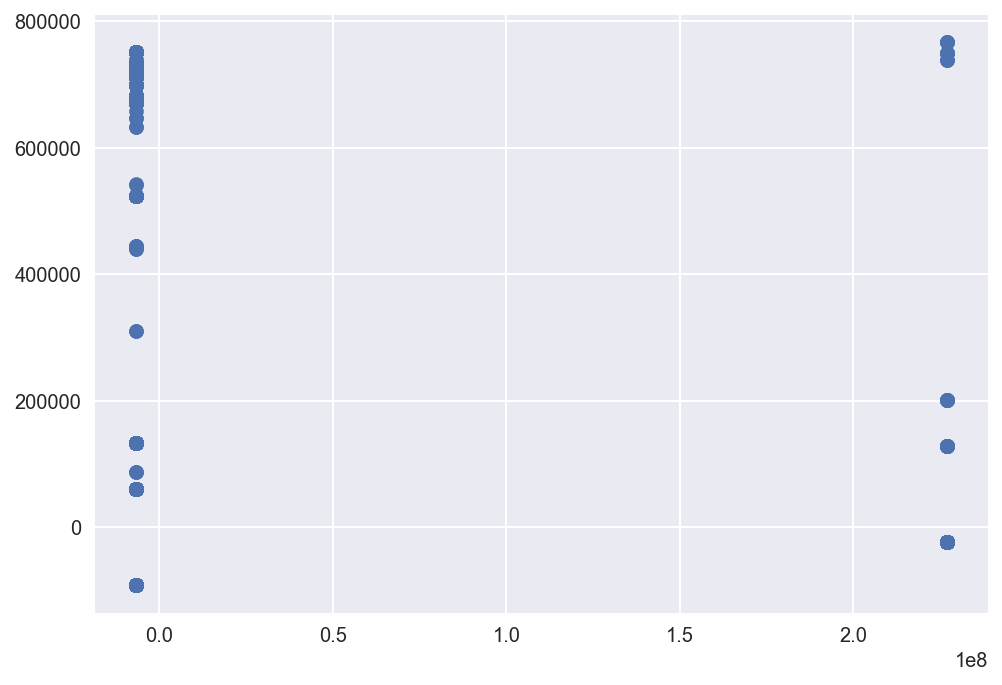

In [193]:
plt.scatter(X_train_numeric_pca[:, 0], X_train_numeric_pca[:, 1],marker='o')
plt.show()

c) Concat pca data (having 2 PCs) and other categorical variables.

In [110]:
# concat pca dataframe and dummy dataframe
X_train_final_pca_df =pd.concat([X_train_numeric_pca_df, X_train_dummy], axis = 1)
X_train_final_pca_df.shape

(27534, 16)

d) Using a linear regression model to do cross validate and show R^2

In [111]:
# get R^2
pca_avg_score = linear_regression_cross_r2(X_train_final_pca_df, y_train, "pca 2 components")

# set info into features_selection_list
set_info('pca 2 components', pca_avg_score, X_train_final_pca_df.columns)

The average R^2 of pca 2 components model is 0.0331
The R^2 metrics derived from the K-fold cross validation as followed:
[0.03625064 0.03909425 0.03094592 0.02859842 0.0304614 ]


In [112]:
print("The Avg. of PCA lower than Baseline %.4f %%" %( ( baseline_avg_score - pca_avg_score ) / baseline_avg_score * 100))

The Avg. of PCA lower than Baseline 47.3815 %


###  Using filter method to select features

f_regression: Univariate linear regression tests returning f-statistic and p-values

r_regression: Pearson (sk-learn 1.0)

mutual_info_regression : Mutual information for a continuous target.

mutual_info_classif : Estimate mutual information for a discrete (category) target variable.

f_classif : ANOVA F-value between label/feature for classification tasks.

chi2 : Chi-squared stats of non-negative features for classification tasks.

- VarianceThreshold
- r_regression

https://scikit-learn.org/0.24/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest

https://scikit-learn.org/stable/modules/feature_selection.html#
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

#### Filter method - VarianceThreshold
Pros:
Easy to use.

Cons:
It's not accurate.

In [113]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

# VarianceThreshold returns the dataframe with selected features
# threshold = 1 will drop all features with variances less than 1
vt = VarianceThreshold(threshold=1).fit(X_train)
#X_train_new = VarianceThreshold(threshold=1).fit_transform(X_train)

#to get names of the selected features
mask = vt.get_support()

new_features = X_train.columns[mask]
#print(new_features)

X_train_new = X_train[new_features].copy()
X_train_new.shape

# VarianceThreshold Model
VarianceThreshold_avg_score = linear_regression_cross_r2(X_train_new, y_train, "VarianceThreshold")

# set info into features_selection_list
set_info('Filter - VarianceThreshold', VarianceThreshold_avg_score, new_features)

The average R^2 of VarianceThreshold model is 0.0537
The R^2 metrics derived from the K-fold cross validation as followed:
[0.06439603 0.06147546 0.04943281 0.04000298 0.05295835]


In [114]:
print("The Avg. of VarianceThreshold lower than Baseline %.4f %%" 
      %( ( baseline_avg_score - VarianceThreshold_avg_score ) / baseline_avg_score * 100))

The Avg. of VarianceThreshold lower than Baseline 14.6315 %


#### Filter method - r_regression

It use Pearson correlation coefficient to select featurs.

Pearson correlation coefficient applies to:
- There is a linear relationship between the two variables, both are continuous data.
- The population of the two variables is normally distributed, or a near-normal unimodal distribution.
- The observations of the two variables are paired, and each pair of observations is independent of each other.

In [115]:
from sklearn.feature_selection import r_regression

selector = SelectKBest(r_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set

#to get names of the selected features
mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

#print(selector.scores_)     #Output array([0.16978127, 0.01829886, 0.45461366, 0.55126343, 0.66081217, 0.27715287 ....])

new_features = X_train.columns[mask]
# print(new_features)   #Output Index(['name1', 'name2'],dtype='object')
print(X_train_new.shape)

# avg score
r_regression_avg_score = linear_regression_cross_r2(X_train_new, y_train, "r_regression")

# set info into features_selection_list
set_info('Filter - r_regression', r_regression_avg_score, new_features)

(27534, 10)
The average R^2 of r_regression model is 0.0523
The R^2 metrics derived from the K-fold cross validation as followed:
[0.06270642 0.05876461 0.04958855 0.04219043 0.04846114]


In [116]:
print("The Avg. of VarianceThreshold lower than Baseline %.4f %%" 
      %( ( baseline_avg_score - r_regression_avg_score ) / baseline_avg_score * 100))

The Avg. of VarianceThreshold lower than Baseline 16.7173 %


#### Filter method - mutual_info_regression

Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [117]:
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=10)
X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set

#to get names of the selected features
mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

#print(selector.scores_)     #Output array([0.16978127, 0.01829886, 0.45461366, 0.55126343, 0.66081217, 0.27715287 ....])

new_features = X_train.columns[mask]

# print(new_features)   #Output Index(['name1', 'name2'],dtype='object')
print(X_train_new.shape)

# avg score
mutual_info_regression_avg_score = linear_regression_cross_r2(X_train_new, y_train, "mutual_info_regression")

# set info into features_selection_list
set_info('Filter - mutual_info_regression', mutual_info_regression_avg_score, new_features)

(27534, 10)
The average R^2 of mutual_info_regression model is 0.0494
The R^2 metrics derived from the K-fold cross validation as followed:
[0.05983295 0.05716375 0.0484178  0.037982   0.04367523]


In [118]:
print("The Avg. of mutual_info_regression lower than Baseline %.4f %%" 
      %( ( baseline_avg_score - mutual_info_regression_avg_score ) / baseline_avg_score * 100))

The Avg. of mutual_info_regression lower than Baseline 21.3759 %


### Using Wrapper method to select features

- RFE (Spend too much time. Can not get result.)

#### RFE (Spend too much time. Can not get result.)

In [119]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression(solver='lbfgs', max_iter=1000)
#rfe = RFE(estimator=lr, n_features_to_select=2)
#rfe.fit(X_train[['kw_max_max', 'kw_max_avg', 'kw_avg_avg']], y_train)
#print(rfe.n_features_)
#print(rfe.ranking_)

### Using Embedded method to select features
- LinearSVC (appears to classification, it can not get result.)
- LassoLarsCV
- RandomForestClassifier

#### Embedded - LinearSVC

The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples.


In [120]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty = "l1", dual=False).fit(X_train, y_train)
model_lsvc = SelectFromModel(lsvc, prefit=True)
X_train_new = model_lsvc.transform(X_train)

mask = model_lsvc.get_support()
new_features = X_train.columns[mask] #Output Index(['name1', 'name2'],dtype='object')

print(X_train_new.shape)

# Embedded - LinearSVC Model
LinearSVC_avg_score = linear_regression_cross_r2(X_train_new, y_train, "LinearSVC")

# set info into features_selection_list
set_info('Embedded - LinearSVC', LinearSVC_avg_score, new_features)

(27534, 54)
The average R^2 of LinearSVC model is 0.0628
The R^2 metrics derived from the K-fold cross validation as followed:
[0.07266692 0.07215564 0.0572179  0.05162689 0.06018317]


D:\dev\anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\dev\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [121]:
print("The Avg. of LinearSVC lower than Baseline %.4f %%" 
      %( ( baseline_avg_score - LinearSVC_avg_score  ) / baseline_avg_score * 100))

The Avg. of LinearSVC lower than Baseline 0.1253 %


It applies to perform classification, it spent a very long time because "shares" is not a categorical respones.

#### Embedded - LassoLarsCV

Cross-validated Lasso, using the LARS algorithm

Lasso model fit with Least Angle Regression a.k.a. Lars.

It is a Linear Model trained with an L1 prior as regularizer.

In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
lasso_lars_cv = linear_model.LassoLarsCV( cv=10, max_n_alphas=10 ).fit(X_train, y_train)

model_lasso = SelectFromModel(lasso_lars_cv, prefit=True)
X_train_new = model_lasso.transform(X_train)

mask = model_lasso.get_support()
new_features = X_train.columns[mask] #Output Index(['name1', 'name2'],dtype='object')

print(X_train_new.shape)

# Embedded - LinearSVC Model
LassoLarsCV_avg_score = linear_regression_cross_r2(X_train_new, y_train, "LassoLarsCV")

# set info into features_selection_list
set_info('Embedded - LassoLarsCV', LassoLarsCV_avg_score, new_features)

D:\dev\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


(27534, 45)
The average R^2 of LassoLarsCV model is 0.0640
The R^2 metrics derived from the K-fold cross validation as followed:
[0.07272432 0.07237083 0.06094428 0.05169504 0.06231468]


D:\dev\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [123]:
print("The Avg. of LassoLarsCV higher than Baseline %.4f %%" 
      %( ( LassoLarsCV_avg_score - baseline_avg_score ) / baseline_avg_score * 100))

The Avg. of LassoLarsCV higher than Baseline 1.8473 %


It has the fastest speed to select features. I will used it to envaluate models

### Embedded - RandomForestClassifier

In [124]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier()).fit(X_train, y_train)

# selector.threshold_
new_features = X_train.columns[selector.get_support()]

X_train_new = selector.transform(X_train)

print(X_train_new.shape)

# X_train_new
forest_avg_score = linear_regression_cross_r2(X_train_new, y_train, "RandomForestClassifier")

# set info into features_selection_list
set_info('Embedded - RandomForestClassifier', forest_avg_score, new_features)

(27534, 32)
The average R^2 of RandomForestClassifier model is 0.0567
The R^2 metrics derived from the K-fold cross validation as followed:
[0.06545663 0.06243637 0.05260003 0.04484025 0.05814531]


In [125]:
print("The Avg. of RandomForestClassifier lower than Baseline %.4f %%" 
      %( ( baseline_avg_score - forest_avg_score  ) / baseline_avg_score * 100))

The Avg. of RandomForestClassifier lower than Baseline 9.7903 %


### Compare each methods

In [126]:
for f in features_selection_list:
    print("R^2 = %.4f, features = %d, Methods Name : %s " %(f['avg_r2'], len(f['selected_features']), f['name']))

R^2 = 0.0628, features = 58, Methods Name : Baseline 
R^2 = 0.0331, features = 16, Methods Name : pca 2 components 
R^2 = 0.0537, features = 24, Methods Name : Filter - VarianceThreshold 
R^2 = 0.0523, features = 10, Methods Name : Filter - r_regression 
R^2 = 0.0494, features = 10, Methods Name : Filter - mutual_info_regression 
R^2 = 0.0628, features = 54, Methods Name : Embedded - LinearSVC 
R^2 = 0.0640, features = 45, Methods Name : Embedded - LassoLarsCV 
R^2 = 0.0567, features = 32, Methods Name : Embedded - RandomForestClassifier 


### Summary

LassoLarsCV reduced 13 features and these features get a higher R^2 than Baseline with all variables.

# Regression Model Evaluation
- Using r_regression to find out the best accuracy and the least variables.
- Using Lasso to find out the best accuracy and the least variables.
- Evaluating Linear Regression

### Using r_regression to find out the best accuracy and the least variables.

The data set has 59 variables. I will reduce 1 variable each time to find out the best accuracy and the least variables.

The best accuracy = 90% * (R^2 of baseline)

In [127]:
# define the baseline value
print("The avg R^2 of baseline is %.4f " %baseline_avg_score)

pct_90_baseline = baseline_avg_score * 0.90

print("The 90%% of avg R^2 of baseline is %.4f " %pct_90_baseline)

The avg R^2 of baseline is 0.0628 
The 90% of avg R^2 of baseline is 0.0566 


In [128]:
def set_loop_info(loop_list, name, avg_r2, less_base, cols):
    
    a = {"features" : name, "avg_r2" : avg_r2, "less_base" : less_base, "selected_features" : cols}
    
    loop_list.append(a)

def loop_r_regression_info(loop_list = [], number_of_features = 10, stop_threhold = 0.1):
    
    selector = SelectKBest(r_regression, k=number_of_features)
    
    X_train_new = selector.fit_transform(X_train, y_train)  #Applying transformation to the training set

    #to get names of the selected features
    mask = selector.get_support()     # Output   array([False, False,  True,  True,  True, False ....])

    new_features = X_train.columns[mask]
    
    name = "f_" + str(number_of_features)
    
    avg_score = linear_regression_cross_r2(X_train_new, y_train, name, False)
    
    less_base = False
    if avg_score <= stop_threhold:
        less_base = True

    set_loop_info(loop_list, number_of_features, avg_score, less_base, new_features)


In [129]:
features_selection_loop_list = []

# reduce 1 variable each time to find out the best accuracy and the least variables.
for size in range(len(X_train.columns) - 1, 0, -1):
    
    loop_r_regression_info(features_selection_loop_list, size, pct_90_baseline)

In [130]:
# create a data frame for draw plots.
r2_df = pd.DataFrame(features_selection_loop_list, columns =['features', 'avg_r2', 'less_base', 'selected_features'])
r2_df.head(3)

features    avg_r2  less_base  \
0        57  0.062849      False   
1        56  0.062861      False   
2        55  0.062917      False   

                                   selected_features  
0  Index(['n_tokens_title', 'n_tokens_content', '...  
1  Index(['n_tokens_title', 'n_tokens_content', '...  
2  Index(['n_tokens_title', 'n_tokens_content', '...

Text(0.5, 1.0, 'r_regression')

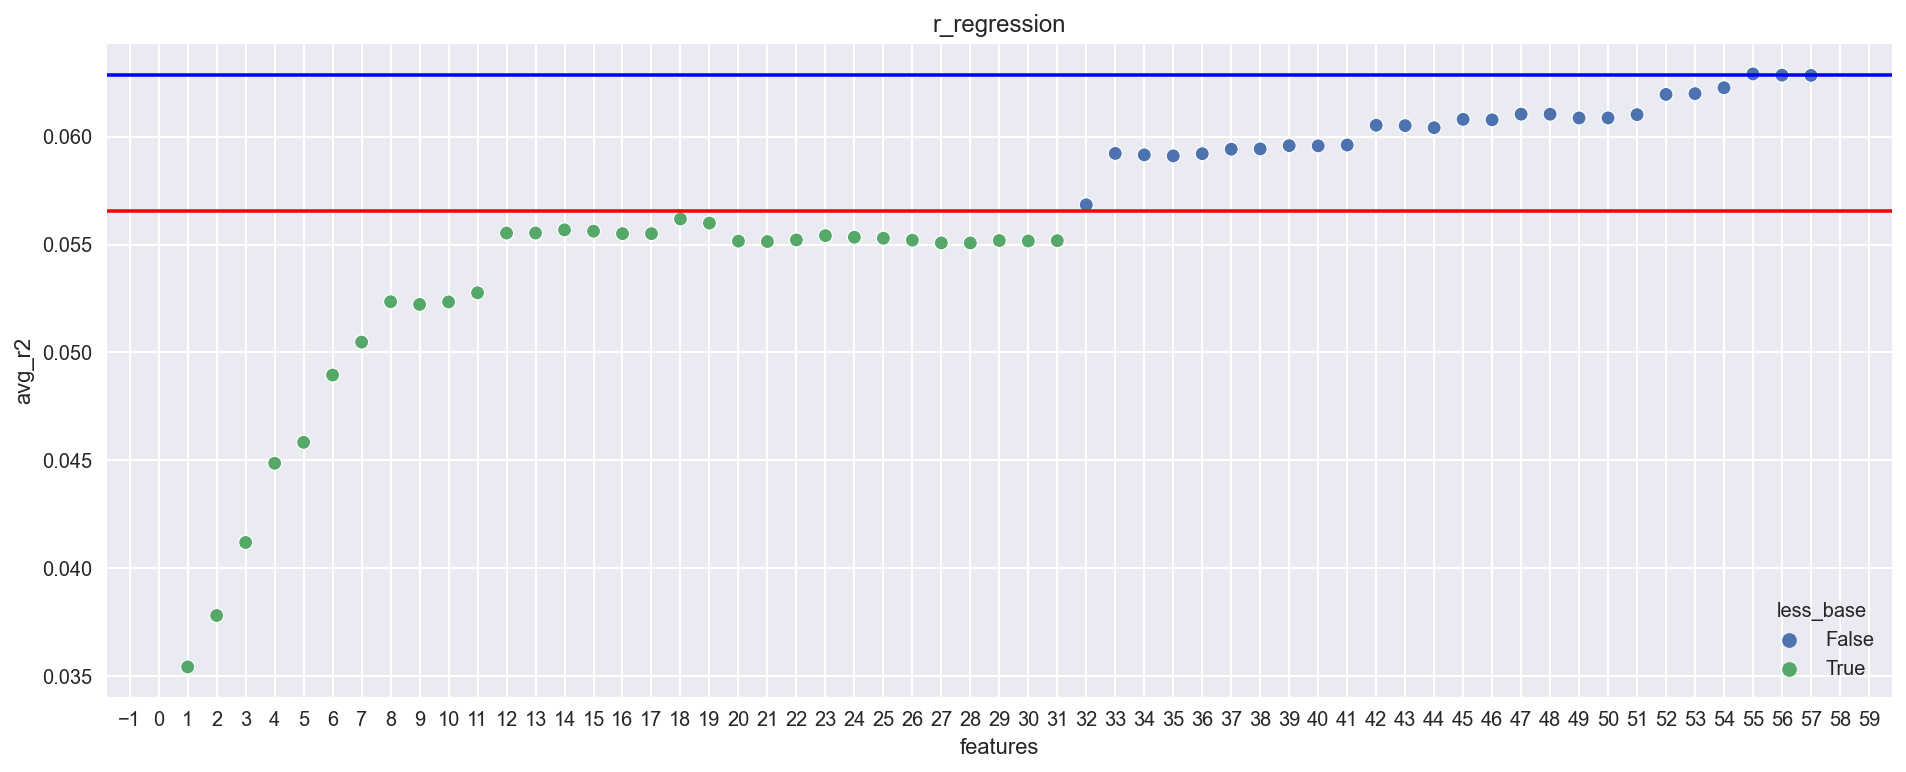

In [131]:
# Draw plots
from matplotlib.ticker import MultipleLocator
# Draw plot to see
f, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x="features", y="avg_r2", hue="less_base", data=r2_df, ax = ax)

ax.axhline(y = baseline_avg_score, color = "blue")
ax.axhline(y = pct_90_baseline, color = "red")

x_major_locator = MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_title("r_regression")

#### Summary

When using r_regression select 32 features, the average of R^2 is below 90% of the baseline.

The blue line is avg R^2 of Baseline. The red line is 90% avg R^2 of Baseline. r_regression can only select 2 or 3 groups of features that get higher R^2 than Baseline.

Using r_regression (Person) to select features is easy and fast, but the accurate is not good.

### Using Lasso to find out the best accuracy and the least variables.

The data set has 59 variables. I will reduce 1 variable each time to find out the best accuracy and the least variables.

The best accuracy = 90% * (R^2 of baseline)

In [132]:
lasso_lars_cv = linear_model.LassoLarsCV( cv=10, max_n_alphas=10 ).fit(X_train.values, y_train.values)

def loop_lasso_info(loop_list = [], number_of_features = 10, stop_threhold = 0.1):

    model_lasso = SelectFromModel(lasso_lars_cv, prefit=True, max_features = number_of_features)
    X_train_new = model_lasso.transform(X_train.values)

    mask = model_lasso.get_support()
    new_features = X_train.columns[mask] #Output Index(['name1', 'name2'],dtype='object')
    
    name = "Lasso_" + str(number_of_features)
    
    avg_score = linear_regression_cross_r2(X_train_new, y_train, name, False)
    
    less_base = False
    if avg_score <= stop_threhold:
        less_base = True
    
    set_loop_info(loop_list, number_of_features, avg_score, less_base, new_features)

# start to find the least variables
features_selection_lasso_loop_list = []

# reduce 1 variable each time to find out the best accuracy and the least variables.
for size in range(len(X_train.columns) - 1, 0, -1):
    
    loop_lasso_info(features_selection_lasso_loop_list, size, pct_90_baseline)

# create a data frame for draw plots.
lasso_df = pd.DataFrame(features_selection_lasso_loop_list, columns =['features', 'avg_r2', 'less_base', 'selected_features'])
lasso_df.head(3)

D:\dev\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


features   avg_r2  less_base  \
0        57  0.06401      False   
1        56  0.06401      False   
2        55  0.06401      False   

                                   selected_features  
0  Index(['n_tokens_title', 'n_tokens_content', '...  
1  Index(['n_tokens_title', 'n_tokens_content', '...  
2  Index(['n_tokens_title', 'n_tokens_content', '...

Text(0.5, 1.0, 'Lasso')

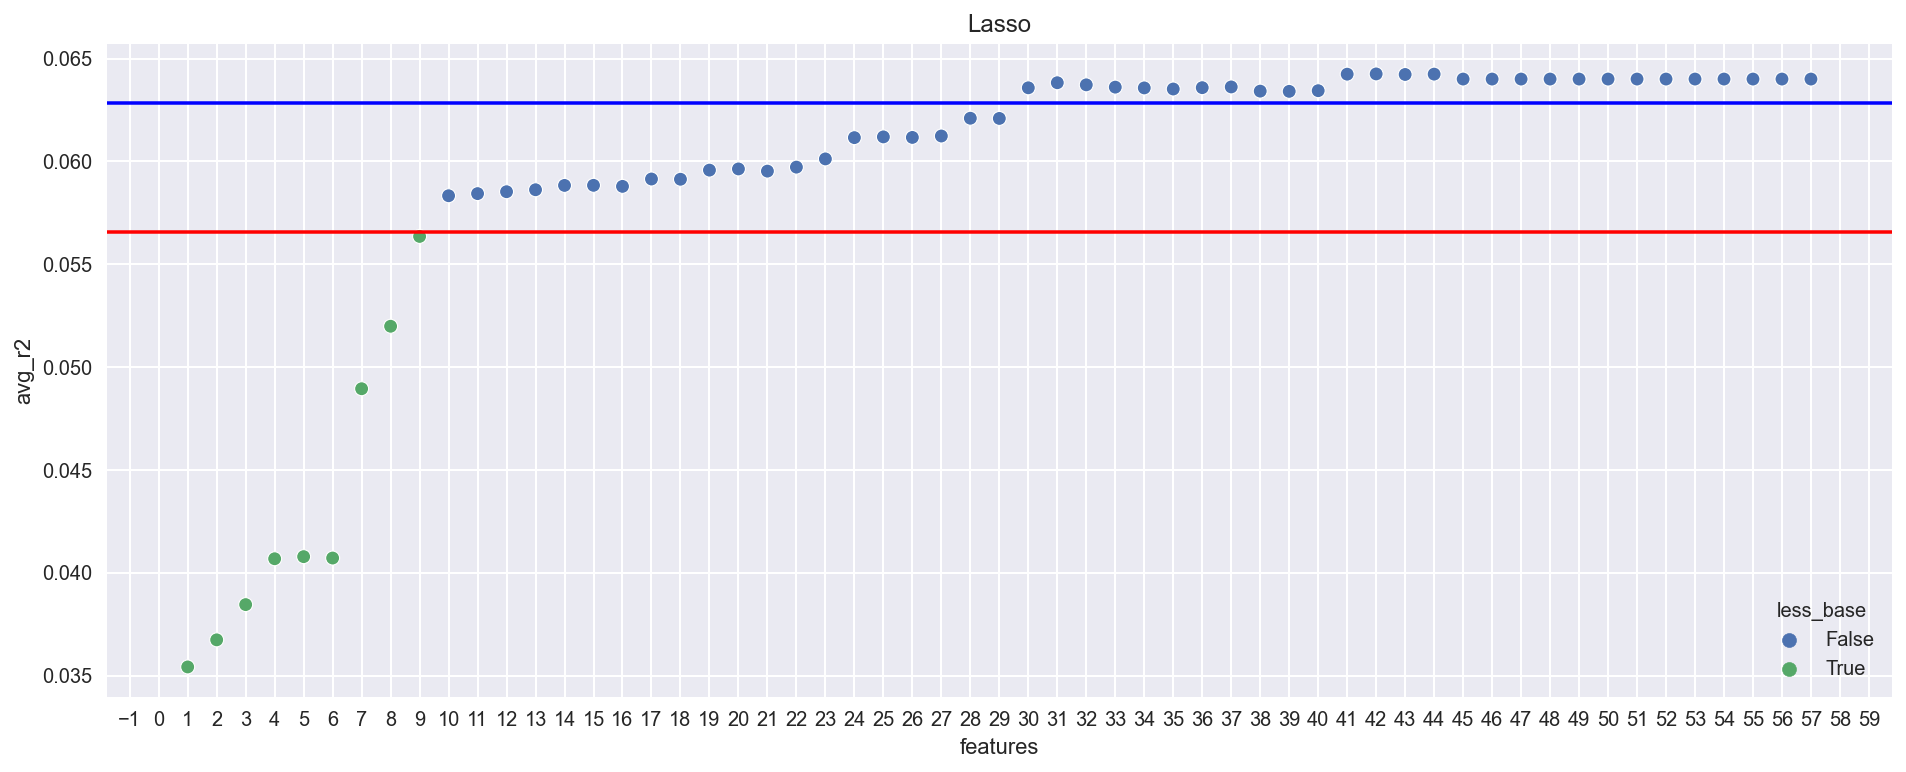

In [133]:
# Draw plots
from matplotlib.ticker import MultipleLocator
# Draw plot to see
f, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x="features", y="avg_r2", hue="less_base", data=lasso_df, ax = ax)

ax.axhline(y = baseline_avg_score, color = "blue")
ax.axhline(y = pct_90_baseline, color = "red")

x_major_locator = MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_title("Lasso")

#### Summary

When using Lasoo select 11 features, the average of R^2 is below 90% of the baseline.

The blue line is avg R^2 of Baseline. The red line is 90% avg R^2 of Baseline. Lasso can select many groups of features that get higher R^2 than Baseline.

### Explore the selected variables by LassoLarsCV before evaluating Linear Regression Models

In [134]:
# Get the selected features
lasso_selected_features = []
for la in features_selection_lasso_loop_list:
    if la['features'] == 11:
        lasso_selected_features = la['selected_features']
        print(la['selected_features'])
        break

Index(['num_hrefs', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'is_weekend', 'LDA_02'],
      dtype='object')


There are 4 binary(dummy) variables and 7 numerical variables. Let us explore them.

In [135]:
lasso_selected_numeric_cols = ['num_hrefs', 'average_token_length', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_avg_sharess', 'LDA_02']

lasso_selected_dummy_cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus','is_weekend']

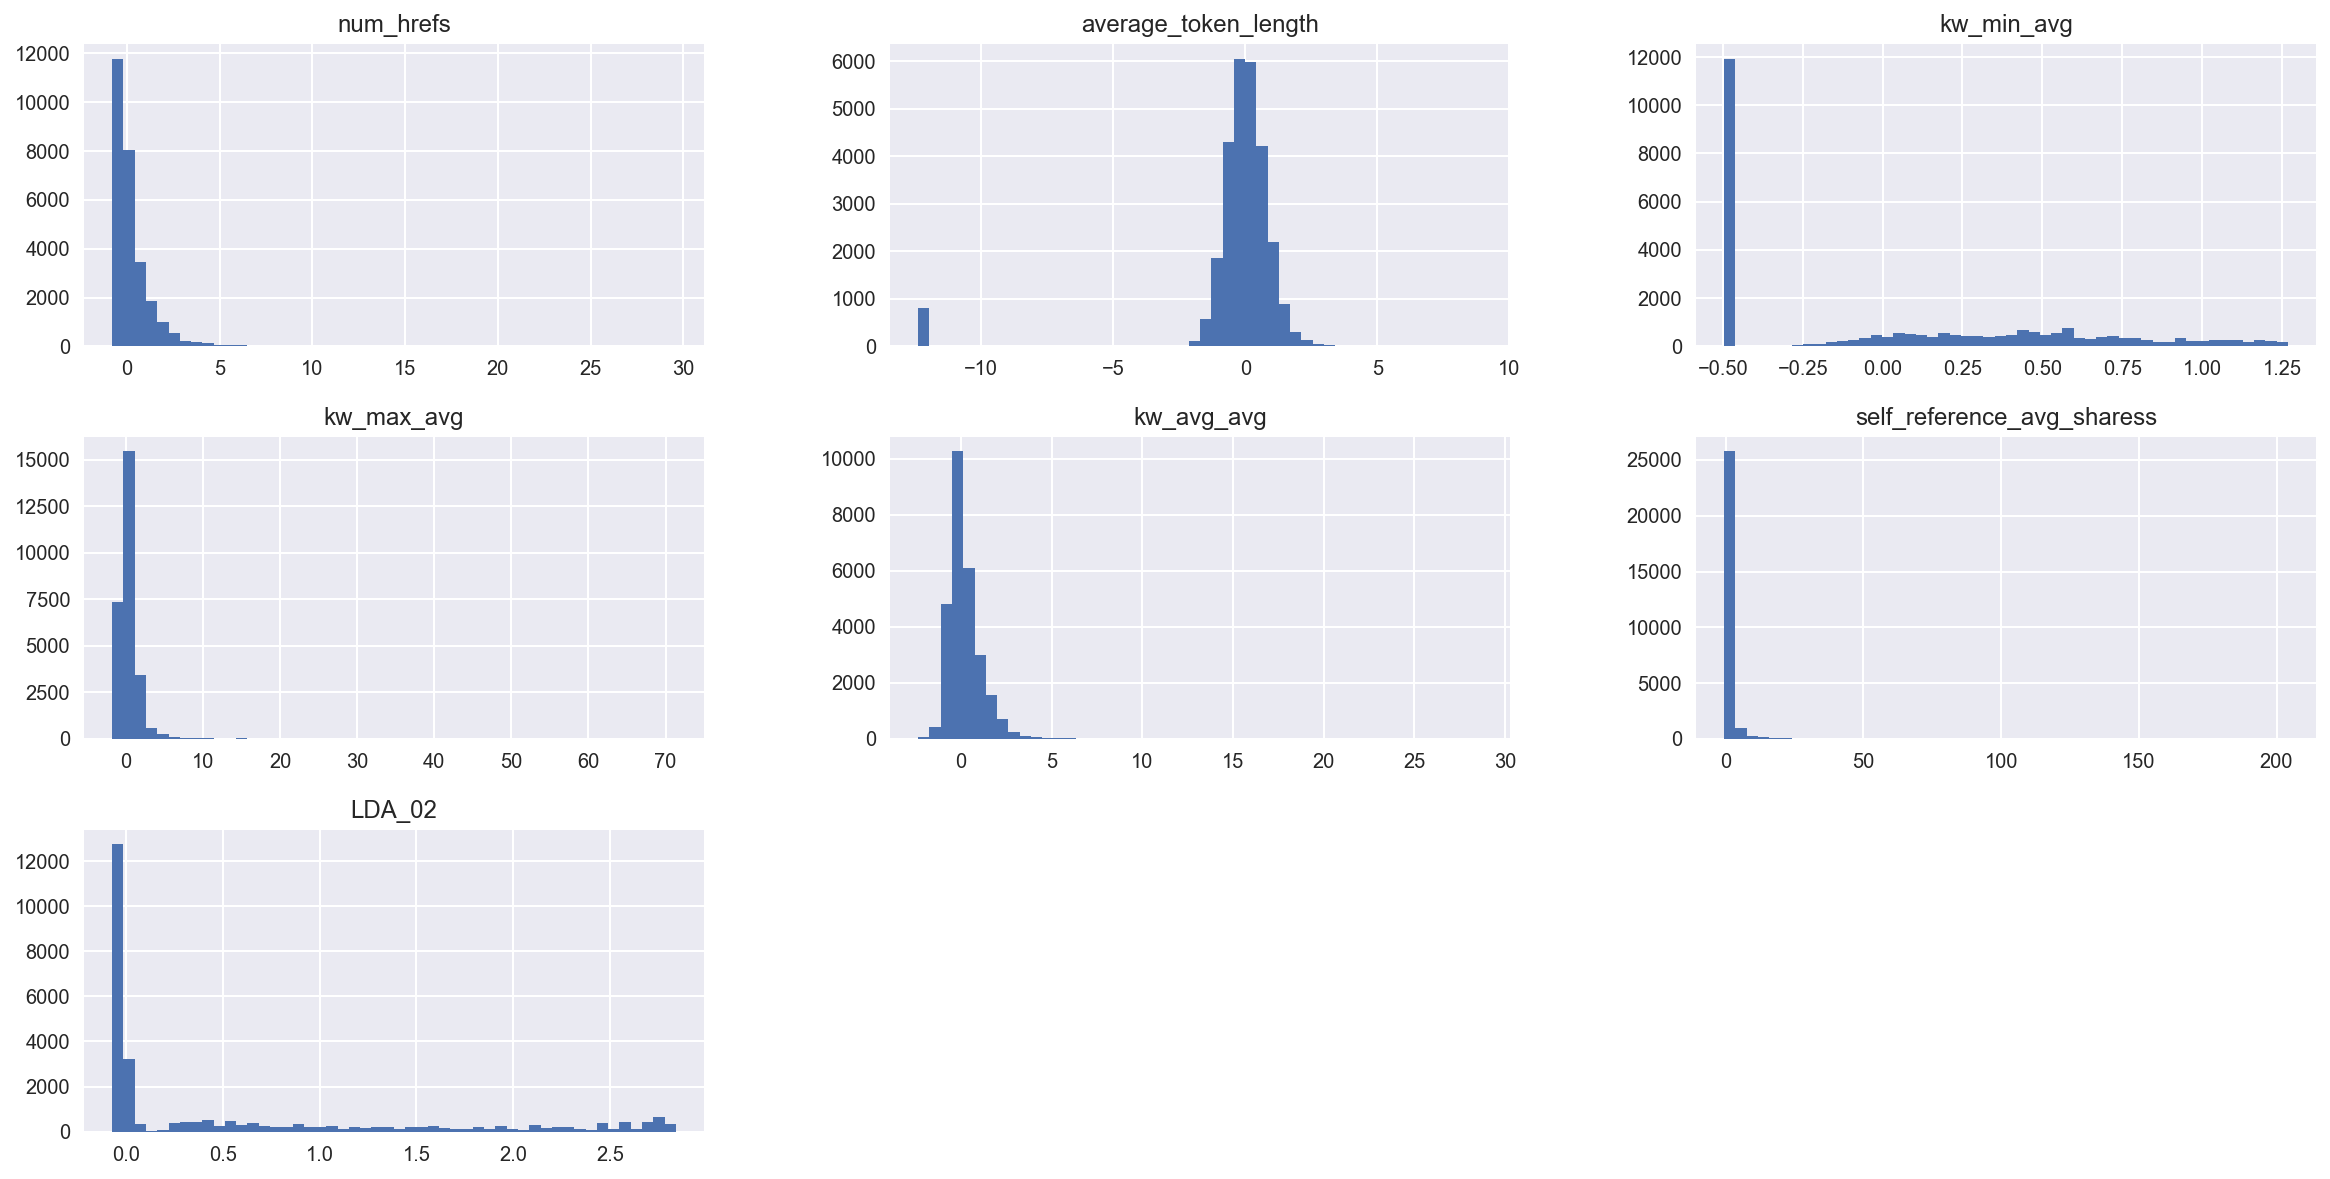

In [136]:
# draw the histogram
X_train[lasso_selected_numeric_cols].hist(bins=50, figsize=(20,10))
plt.show()

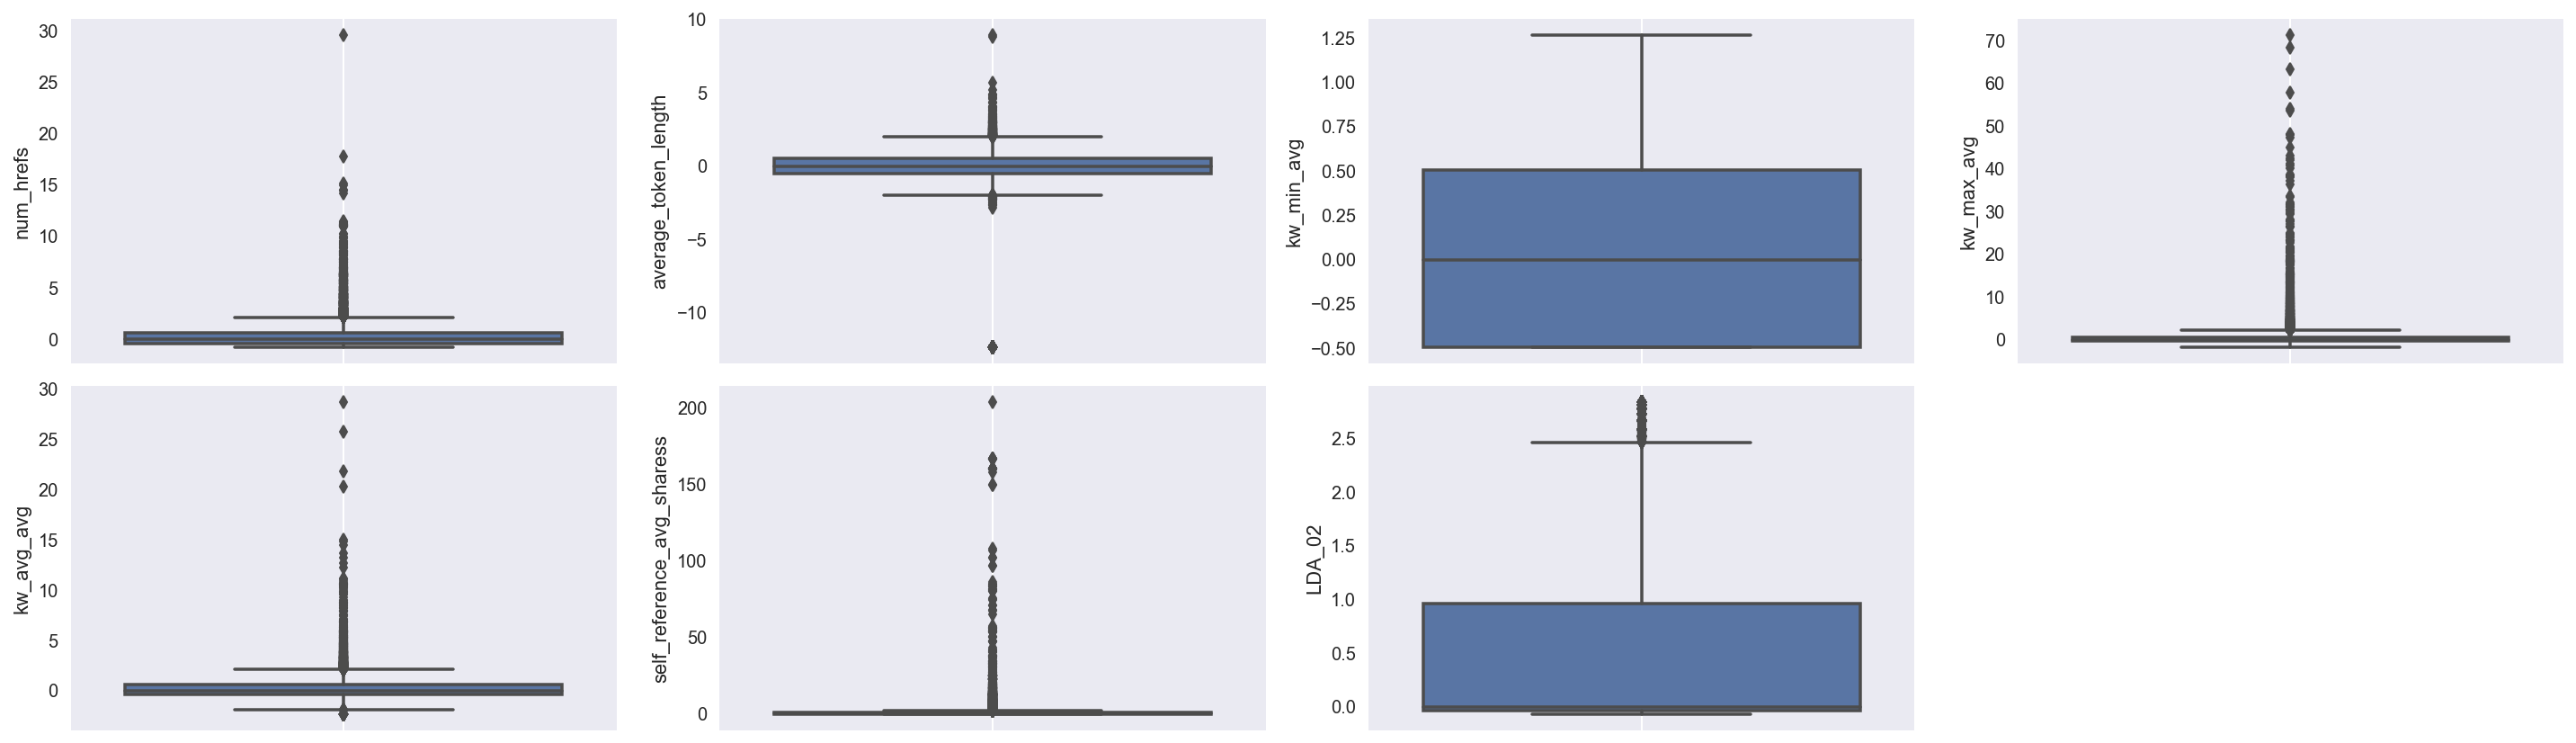

In [137]:
# Draw the box plots
plt.figure(figsize = (20, 20))
for i, col in enumerate(lasso_selected_numeric_cols):
    plt.subplot(7,4, i + 1)
    #sns.distplot(df[col], color = 'r', kde = True)
    sns.boxplot(data=X_train,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

In [138]:
# show the correlation value
corr_matrix = X_train[lasso_selected_numeric_cols].corr()
corr_matrix['num_hrefs'].sort_values(ascending = False)

num_hrefs                     1.000000
average_token_length          0.223496
kw_avg_avg                    0.127065
kw_max_avg                    0.078412
kw_min_avg                    0.059194
self_reference_avg_sharess    0.024995
LDA_02                       -0.015701
Name: num_hrefs, dtype: float64

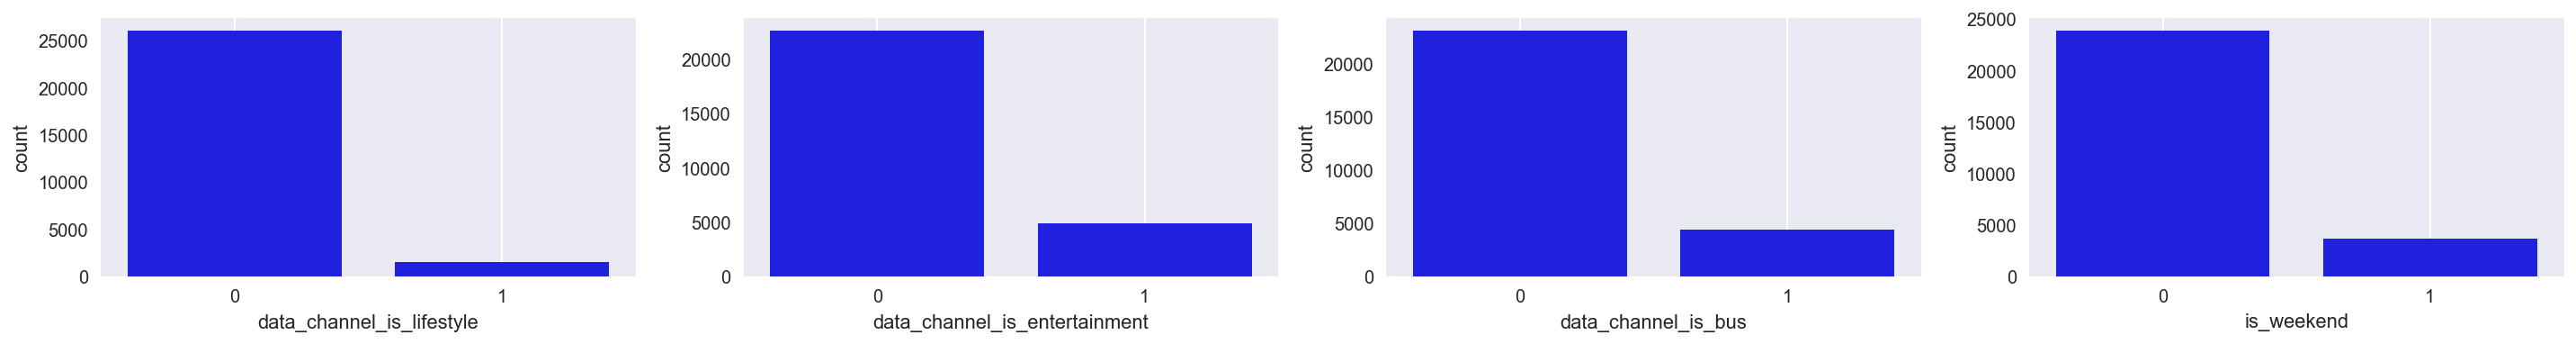

In [139]:
# see the bar chart
plt.figure(figsize = (20, 10))
for i, col in enumerate(list(lasso_selected_dummy_cols)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=X_train, color='blue')
    plt.grid()
    plt.tight_layout()

In [140]:
X_train.shape

(27534, 58)

From above histograms, boxplots and bar charts, we can see distributions, correlation values and dummy variables' ratio of 0 and 1.

Next, I will train a Linear Regression model by features selected by Lasso.

### Model - Linear Regression

- I will select 5-fold cross validation to train models.

The 5-fold cross validation means that 20% of the data is used for testing. The X_train has 27534 observations, so 20% of 27534 is 5506. They are enough to test models and to get pretty accurate.

In [141]:
# Assing the model function you want to use to a variable
final_lr_model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
model_scores = cross_val_score(final_lr_model, X_train[lasso_selected_features], y_train, cv=5)

# calculate the average R^2 across all 5 folds
lasoo_avg_scores = np.mean(model_scores)
print('The average R^2 of model is %.4f' %(lasoo_avg_scores))

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print('The R^2 metrics derived from the K-fold cross validation as followed:')
print(model_scores)

The average R^2 of model is 0.0584
The R^2 metrics derived from the K-fold cross validation as followed:
[0.06720925 0.06302715 0.05359861 0.0484106  0.05994579]


In [142]:
print('The baseline model (with 59 variables) has avg R^2 %.4f ' %(baseline_avg_score))
print('The Lasso (selected %d variables) has avg R^2 %.4f ' %(len(lasso_selected_features), lasoo_avg_scores))
print('The variable reduced %.4f%% ' %( (1 - len(lasso_selected_features)/len(X_train.columns)) * 100))
print('The R^2 reduced %.4f%% ' %( (1 - lasoo_avg_scores/baseline_avg_score) * 100))

The baseline model (with 59 variables) has avg R^2 0.0628 
The Lasso (selected 11 variables) has avg R^2 0.0584 
The variable reduced 81.0345% 
The R^2 reduced 7.0177% 


# 8. Conclustion

- If variables of data set have very low correlation values, we can drop outliers to increase correlation values.

- If variables of data set have very low correlation values, we can use RobustScaler to standardizate variables.

- If there are too many variables in a data set, we can pick out key variables that they can affect accurate of models than other variables.


- Feature selection

  - There are many selection methods. Before we choose a method to select feature, we must understand the scenarios for this model. If we pick up a wrong model, we will not only waste time but also get inaccurate results. For example, I used LinearSVC to select features. LinearSVC deals with muti-classification.


  - PCA
  
  It is easy to use but it is difficult to understand, because all variables has been transfered as new set.


  - filter

    - VarianceThreshold
      - It is easy to use but it is difficult to get a good accurate.
      
    - r_regression (Pearson)
      - It is easy to use.
      
    
    - mutual_info_regression
      - It will run a long time. Estimate mutual information for a continuous target variable.
    
    
  - Wrapper

    - RFE + LogisticRegression
    
      - It spends too much time. In this study, it can not get result.
  
  
  - Embedded

    - LinearSVC
    
      - It will spend more time than LassoLarsCV. It's very slow, because it deals with muti-classification.
      
    - LassoLarsCV **(The fastest and the most accurate)**
    
      - It is good for handing data that does not have correlation.
      
    - RandomForestClassifier
      - It is good for handing data that does not have correlation.
      - It will spend much time.
  

- Model evalution

  - I use 5-fold cross validation to train models. The 5-fold cross validation means that 20% of the data is used for testing. It can get pretty accurate.

# 9. Reference

machinelearningmastery.com. Feature selection. [online] Available at https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ [Accessed 27 September 2021].


scikit-learn.org. scikit-learn document. [online] Available at https://scikit-learn.org/stable/ [Accessed 27 September 2021].

towardsdatascience.com. scikit-learn PCA. [online] Available at https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 [Accessed 6 October 2021].

mikulskibartosz.name. PCA how to choose the number of components [online] Available at https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/ [Accessed 6 October 2021].

